In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np, pandas as pd, seaborn as sns, tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Loading Input Data

In [2]:
inputdata=pd.read_excel('input_data.xlsx') # if google colab: '/content/input_data.xlsx'
inputdata

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


# Exploratory Data Analysis
## Observations:
1.   Short Description is repeated in Description in many records - Redundant, will be dropped
2.   Caller Name is repeated in Description in many places (not required for our analysis) - Caller column will be dropped
3.   There are tickets in Spanish as well as German apart from English. But English language is dominant.

### The redundant and unwanted features will be removed during the pre-processing of the data

In [3]:
# Total number of records
inputdata.shape
# There are 8500 records and 4 features

(8500, 4)

In [4]:
# Checking for null values
inputdata.isnull().sum()
# There are 8 null values in Short Description and 1 null value in Description

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

Short Description, considered redundant. So only null values of Description column will be dropped. 

## Distribution of tickets based on Assignment Group

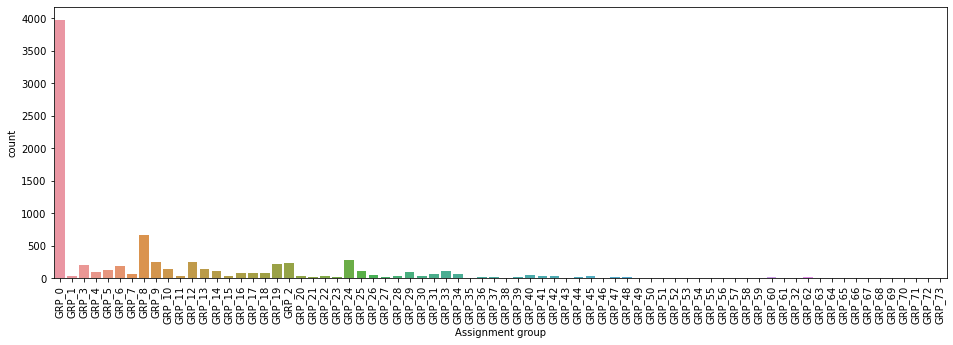

In [5]:
plt.gcf().set_size_inches(16,5)
plt.xticks(rotation=90)
sns.countplot(inputdata['Assignment group'])

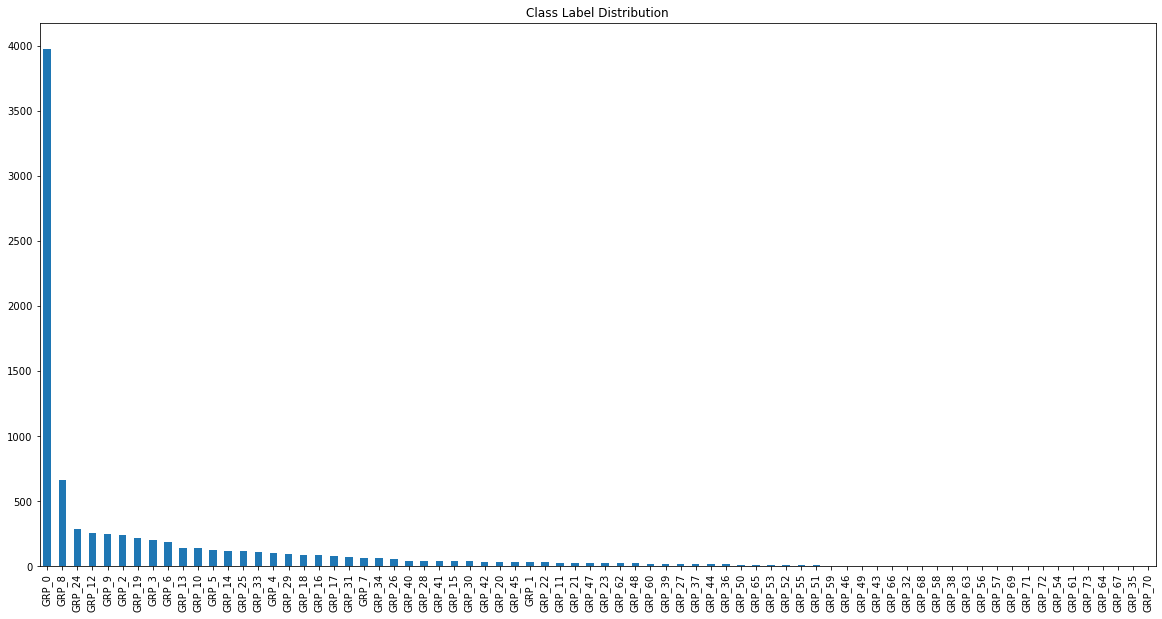

In [6]:
inputdata['Assignment group'].value_counts().plot(kind='bar', figsize=(20,10), title='Class Label Distribution')

In [7]:
# Checking for those assignment groups that have too few tickets (records)
# Defining those assignment groups as low frequency, which have less than 5 tickets assigned to them
freq=pd.DataFrame(inputdata['Assignment group'].value_counts())
freq.reset_index(inplace=True)
freq.rename(columns={0:'Assignment_group',1:'Number of tickets'})
freq[freq['Assignment group']<5]

,index,Assignment group
56,GRP_66,4
57,GRP_32,4
58,GRP_68,3
59,GRP_58,3
60,GRP_38,3
61,GRP_63,3
62,GRP_56,3
63,GRP_57,2
64,GRP_69,2
65,GRP_71,2


In [8]:
freq[freq['Assignment group']<5].count()
#There are 18 low frequency assignment groups. The classification accuracy of these classes might be low.

index               18
Assignment group    18
dtype: int64

## Observations:
1.   The classes are imbalanced. Accuracy score may not be the best performance metric.
2.   Class 0 has the maximum number of tickets assigned, followed by 8, 24, 12, 9, 2 and 19 in that order.



# Data Cleaning and Processing Pipeline

In [9]:
import nltk
from nltk import *
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
#from nltk.corpora import stopwords
print (stopwords.fileids())

[nltk_data] Downloading package stopwords to C:\Users\Kavitha
[nltk_data]     Chetana\AppData\Roaming\nltk_data...


['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data]   Unzipping corpora\stopwords.zip.


Data Processing

In [10]:
for i in range(len(inputdata['Description'])):
    # Removing new line (\n) and carriage return (\r)
    inputdata.iloc[i]['Description']=re.sub('\n',' ',str(inputdata.iloc[i]['Description']))
    inputdata.iloc[i]['Description']=re.sub('\r',' ',str(inputdata.iloc[i]['Description']))
    #inputdata.iloc[i]['Description']=str(inputdata.iloc[i]['Description']).replace(str(inputdata.iloc[i]['Caller']),'')
    # Removing email tails from Description
    inputdata.iloc[i]['Description']=re.sub('@gmail.com',' ',inputdata.iloc[i]['Description'])
    # Removing numbers and special characters from Description
    inputdata.iloc[i]['Description']=re.sub('[^a-zA-Z]',' ',inputdata.iloc[i]['Description'])#0-9
    # Removing 'received from' from the beginning of Description
    inputdata.iloc[i]['Description']=re.sub('received from',' ',inputdata.iloc[i]['Description'])
    #inputdata.iloc[i]['Description']=inputdata.iloc[i]['Description'].lower().lstrip(' ')  
 
inputdata

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,hmjdrvpb komuaywn hello team my...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,eylqgodm ybqkwiam hi i cannot lo...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,avglmrts vhqmtiua good afternoon ...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [11]:
for i in range(len(inputdata['Description'])):
    #inputdata.iloc[i]['Description']=re.sub('\n',' ',str(inputdata.iloc[i]['Description']))
    #inputdata.iloc[i]['Description']=re.sub('\r',' ',str(inputdata.iloc[i]['Description']))
    # Removing Caller name from Description
    inputdata.iloc[i]['Description']=inputdata.iloc[i]['Description'].replace(inputdata.iloc[i]['Caller'],'')
inputdata   

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,hello team my meetings skype m...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,hi i cannot log on to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,good afternoon i am not receivin...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [12]:
# Dropping Caller and Short description columns
intermediate=inputdata.drop(['Caller','Short description'],axis=1)
intermediate

,Description,Assignment group
0,verified user details employee manager na...,GRP_0
1,hello team my meetings skype m...,GRP_0
2,hi i cannot log on to vpn best,GRP_0
3,unable to access hr tool page,GRP_0
4,skype error,GRP_0
...,...,...
8495,good afternoon i am not receivin...,GRP_29
8496,telephony software issue,GRP_0
8497,vip windows password reset for tifpdchb pedx...,GRP_0
8498,i am unable to access the machine utilities to...,GRP_62


In [13]:
# Processing Assignment group
# Remove 'GRP_' from Assignment group name and convert the remaining string to integer
for i in range(len(intermediate['Description'])):
    intermediate.iloc[i]['Assignment group']=intermediate.iloc[i]['Assignment group'].replace('GRP_','')
intermediate['Assignment group']=intermediate['Assignment group'].astype(np.int32)
intermediate

,Description,Assignment group
0,verified user details employee manager na...,0
1,hello team my meetings skype m...,0
2,hi i cannot log on to vpn best,0
3,unable to access hr tool page,0
4,skype error,0
...,...,...
8495,good afternoon i am not receivin...,29
8496,telephony software issue,0
8497,vip windows password reset for tifpdchb pedx...,0
8498,i am unable to access the machine utilities to...,62


In [14]:
# Removing double spaces and spaces in the beginning of the Description
# Converting string to tokens
for i in range(len(intermediate['Description'])):
    #if isinstance(intermediate.iloc[i]['Description'],str):
    intermediate['Description'][i]=intermediate['Description'][i].replace('  ',' ').lstrip(' ').split()
intermediate['Description']

C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0       [verified, user, details, employee, manager, n...
1       [hello, team, my, meetings, skype, meetings, e...
2                 [hi, i, cannot, log, on, to, vpn, best]
3                    [unable, to, access, hr, tool, page]
4                                          [skype, error]
                              ...                        
8495    [good, afternoon, i, am, not, receiving, the, ...
8496                         [telephony, software, issue]
8497    [vip, windows, password, reset, for, tifpdchb,...
8498    [i, am, unable, to, access, the, machine, util...
8499    [an, mehreren, pc, s, lassen, sich, verschiede...
Name: Description, Length: 8500, dtype: object

In [15]:
nltk.download('words')
from nltk.corpus import words
dictionary=words.words()

[nltk_data] Downloading package words to C:\Users\Kavitha
[nltk_data]     Chetana\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [16]:
# Removing words that do not make sense using nltk's words
for i in range(len(intermediate['Description'])):
    intermediate['Description'][i]=[x for x in intermediate['Description'][i] if x in dictionary]
    print(intermediate['Description'][i])
intermediate

C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['user', 'employee', 'manager', 'name', 'checked', 'the', 'user', 'name', 'in', 'ad', 'and', 'reset', 'the', 'password', 'advised', 'the', 'user', 'to', 'login', 'and', 'check', 'caller', 'confirmed', 'that', 'he', 'was', 'able', 'to', 'login', 'issue', 'resolved']
['hello', 'team', 'my', 'are', 'not', 'in', 'my', 'outlook', 'calendar', 'can', 'somebody', 'please', 'advise', 'how', 'to', 'correct', 'this', 'kind']
['hi', 'i', 'cannot', 'log', 'on', 'to', 'best']
['unable', 'to', 'access', 'tool', 'page']
['error']
['unable', 'to', 'log', 'in', 'to', 'engineering', 'tool', 'and']
['event', 'critical', 'company', 'the', 'value', 'of', 'threshold', 'for', 'oracle', 'd', 'd', 'data', 'd', 'is']
['ticket', 'no', 'employment', 'status', 'new', 'non', 'employee', 'enter', 'user', 's', 'name']
['unable', 'to', 'disable', 'add', 'on', 'outlook']
['ticket', 'update', 'on']
['engineering', 'tool', 'not', 'connected', 'and', 'unable', 'to', 'submit']
['tool', 'site', 'not', 'loading', 'page', 'cor

['what', 'type', 'of', 'outage', 'x', 'network', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'no', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'no', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'no', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'no', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'yes', 'no', 'na', 'equipment', 'reset', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified', 'yes', 'no', 'na', 'yes', 'no', 'na', 'additional', 'diagnostics']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['account', 'locked']
['user', 'logging', 'to', 'outlook', 'will', 'be', 'av

['ess', 'login', 'issue', 'user', 'employee', 'manager', 'name', 'checked', 'the', 'user', 'name', 'in', 'ad', 'and', 'reset', 'the', 'password', 'advised', 'the', 'user', 'to', 'login', 'and', 'check', 'caller', 'confirmed', 'that', 'he', 'was', 'able', 'to', 'login', 'issue', 'resolved']
['is', 'unable', 'to', 'start', 'his', 'dell', 'in', 'tablet', 'device']
['print', 'tool', 'install']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'summary', 'good', 'morning', 'i', 'am', 'trouble', 'getting', 'into', 'my', 'can', 'you', 'assist']
['install', 'acrobat', 'standard']
['password', 'reset', 'from', 'ad']
['please', 'reset', 'my', 'password', 'to', 'it', 's', 'blocked', 'login']
['image', 'd', 'f', 'e', 'regional', 'controller']
['add', 'in', 'is', 'getting', 'disabled', 'from', 'outlook']
['outlook']
['not', 'working']
['employee', 'is', 'getting', 'an', 'error', 'user', 'authentication', 'when', 'trying', 'to', 'log', 'into', 'the', 'ess', 'portal', 'she', 'is', 'ab

['what', 'type', 'of', 'outage', 'x', 'network', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'no', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'no', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'no', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'no', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'yes', 'no', 'na', 'equipment', 'reset', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified', 'yes', 'no', 'na', 'yes', 'no', 'na', 'additional', 'diagnostics']
['hi', 'i', 'have', 'in', 'and', 'it', 'works', 'now', 'correctly', 'the', 'accounting', 'were', 'automatically', 'without', 'any

['welcome', 'our', 'next', 'available', 'agent', 'will', 'be', 'with', 'you', 'shortly', 'interaction', 'agent', 'visitor', 'the', 'conversation', 'hello', 'hi', 'hello']
['welcome', 'our', 'next', 'available', 'agent', 'will', 'be', 'with', 'you', 'shortly', 'interaction', 'agent', 'visitor', 'the', 'conversation', 'hello']
['welcome', 'our', 'next', 'available', 'agent', 'will', 'be', 'with', 'you', 'shortly', 'interaction', 'agent', 'visitor', 'the', 'conversation', 'hi']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'summary', 'hello', 'problem', 'in', 'to']
['f', 'r', 'e', 'mail', 'manager']
['hello', 'please', 'unlock', 'and', 'reset', 'my', 'password', 'for', 'system']
['client', 'license', 'and', 'client', 'is', 'now', 'in', 'mode']
['outbound', 'not', 'possible', 'via', 'system', 'inbound', 'are', 'working', 'fine', 'please', 'check']
['z']
['also', 'extend', 'to', 'my', 'user', 'account', 'need', 'to', 'create', 'for', 'both']
['dear', 'it', 'would', 'you'

['outlook', 'won', 't', 'open']
['issue', 'is', 'severe', 'especially', 'after', 'everyday', 'to', 'talk', 'to', 'engineering', 'tool', 'administration', 'team', 'to', 'check', 'on', 'account']
['cannot', 'see', 'any', 'of', 'the', 'in', 'outlook', 'in', 'the', 'view']
['password', 'reset']
['cannot', 'access', 'network', 'internal', 'network', 'drive', 'access', 'is', 'working', 'fine', 'a', 'flush', 'reset', 'still', 'multiple', 'affected']
[]
['data', 'back', 'up', 'for']
['server', 'at', 'location', 'is', 'down', 'since', 'am', 'on']
['company', 'trunk', 'card', 'since', 'am', 'on']
[]
['i', 'am', 'not', 'able', 'to', 'sign', 'onto', 'with', 'my', 'user', 'name', 'and', 'password', 'it', 'incorrect', 'password', 'but', 'it', 'is', 'the', 'one', 'i', 'always', 'use']
['source', 'system', 'name', 'user', 'name', 'location', 'status', 'no', 'field', 'user', 'yes', 'no', 'yes', 'event', 'log', 'see', 'below']
['opening', 'multiple']
['dear', 'sir', 'we', 'system', 'for', 'tender', 'in'

['password', 'reset']
['please', 'assist', 'in', 'logging', 'into', 'tool', 'from', 'see', 'attached', 'screen', 'shot', 'he', 'was', 'unable', 'to', 'access', 'his']
['outlook', 'freezing', 'on', 'mobile']
['configure', 'calendar', 'on', 'phone', 'sync', 'with', 'outlook']
['outlook', 'freezing', 'issue']
['unable', 'to', 'find', 'on']
['the', 'tool', 'on', 'the', 'page', 'to', 'a', 'screen', 'when', 'i', 'open', 'the', 'pay', 'and', 'tab', 'and', 'does', 'nothing', 'i', 'can', 'not', 'view', 'any', 'pay']
['i', 'am', 'unable', 'to', 'open', 'outlook', 'i', 'am', 'getting', 'the', 'error', 'message', 'a', 'new', 'guard', 'page', 'for', 'the', 'stack', 'cannot', 'be', 'i', 'have', 'tried', 'the', 'computer', 'i', 'have', 'tried', 'starting', 'outlook', 'in', 'safe', 'mode', 'i', 'have', 'tried', 'the', 'repair', 'function', 'for', 'outlook', 'please', 'advise']
['need', 'access', 'to', 'to', 'enter', 'forecast', 'for', 'it', 'cost', 'i', 'had', 'and', 'received', 'this', 'access', 'at'

['in', 'plant', 'no', 'communication', 'to', 'the', 'server', 'in', 'f', 'they', 'are', 'sending', 'the', 'message']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['ie']
['hello', 'kindly', 'request', 'to', 'give', 'access', 'to', 's', 'drive', 's']
['kindly', 'add', 'user', 'id', 'to', 'business', 'analytics', 'team', 'in', 'ticketing', 'tool', 'tool']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['item', 'missing', 'when', 'save', 'attachment']
['is', 'currently', 'high', 'utilization', 'please', 'investigate']
['mass', 'to', 'condition', 'table', 'a', 'in']
['server', 'active', 'directory', 'in', 'is', 'down', 'since', 'am', 'on']
['is', 'blocked', 'now', 'as', 'the', 'user', 'said']
['please', 'give', 'full', 'access', 'to', 'user', 'for', 'folder', 'in', 'the', 'subject']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'summary', 'the', 'user', 's', 'account', 'is', 'blocked', 'now']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['seit', 'ca

['was', 'out', 'of', 'office', 'for', 'a', 'long', 'time', 'and', 'needs', 'assistance', 'with', 'logging', 'back', 'in', 'to', 'the', 'now', 'he', 'is', 'in', 'office', 'at', 'the', 'moment']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'attendance', 'tool', 'password', 'forgot']
['quote', 'net', 'price', 'and', 'unit', 'price', 'are', 'but', 'all', 'are', 'loaded', 'see', 'in', 'attached', 'need', 'quote', 'to', 'send', 'to', 'customer', 'for']
['error', 'message', 'it', 'was', 'not', 'possible', 'to', 'retrieve', 'the', 'and', 'their', 'can', 't', 'start', 'exploring', 'the', 'information', 'space', 'as', 'it', 't', 'contain', 'any', 'data']
['hi', 'team', 'below', 'is', 'the', 'hub', 'posting', 'to', 'be', 'for', 'us', 'time', 'change', 'revert', 'if', 'you', 'have', 'any', 'service', 'disruption', 'what', 'is', 'the', 'event', 'daylight', 'time', 'in', 'u', 's', 'when', 'does', 'it', 'begin', 'th', 'when', 'does', 'it', 'end', 'followin

['help', 'to', 'change', 'the', 'password', 'password', 'management', 'tool', 'password', 'tool', 'connected', 'to', 'the', 'user', 'system', 'help', 'the', 'user', 'login', 'to', 'the', 'password', 'manager', 'tool', 'password', 'tool', 'and', 'change', 'the', 'help', 'the', 'user', 'to', 'sync', 'the', 'to', 'the', 'company', 'network', 'caller', 'confirmed', 'that', 'he', 'was', 'able', 'to', 'login', 'issue', 'resolved']
['employee', 'mobility', 'agreement']
['please', 'check', 'if', 'this', 'is', 'related', 'to', 'the', 'change', 'in', 'name', 'of', 'the', 'telephony', 'from', 'to', 'please', 'check', 'the', 'attached', 'error', 'chat', 'language', 'chat', 'works', 'normally']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['en', 'best']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['dear', 'sir', 'or', 'madam', 'while', 'my', 'password', 'through', 'the', 'passw

['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['does', 'not', 'come', 'up', 'after', 'weekly', 'note', 'that', 'recently', 'there', 'was', 'a', 'and', 'power', 'supply', 'on', 'this', 'server', 'c', 'ping', 'company', 'company', 'with', 'of', 'data', 'request', 'timed', 'out', 'request', 'timed', 'out', 'request', 'timed', 'out', 'request', 'timed', 'out', 'ping', 'statistics', 'for', 'sent', 'received', 'lost', 'loss', 'c']
['tool', 'company', 'job', 'os', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'cold', 'in', 'job', 'at']
['tool', 'company', 'job', 'tool', 'prod', 'full', 'in', 'job', 'at']
['account', 'locked']
['tool', 'company', 'job', 'in', 'job', 'at']
['switch', 'down', 'company', 's', 'access', 'at', 'is', 'down', 'since']
['inquiry', 'on', 'expense', 'repo

['yesterday', 'i', 'had', 'some', 'with', 'outlook', 'after', 'a', 'password', 'change', 'the', 'problem', 'was', 'a', 'new', 'version', 'was', 'loaded', 'and', 'i', 'thought', 'my', 'were', 'over', 'now', 'my', 'for', 'business', 'is', 'not', 'working', 'and', 'i', 'could', 'not', 'join', 'an', 'important', 'meeting', 'this', 'morning', 'a', 'copy', 'of', 'the', 'screen', 'is', 'below', 'is', 'the', 'sign', 'in', 'address', 'correct', 'if', 'not', 'what', 'should', 'it', 'be', 'have', 'this', 'because', 'the', 'telephone', 'help', 'line', 'up', 'on', 'you', 'as', 'soon', 'as', 'you', 'select', 'a', 'number', 'to', 'direct', 'the', 'call', 'image', 'd', 'b', 'b', 'b', 'senior', 'engineer', 'team']
['please', 'note', 'when', 'dialing', 'into', 'the', 'help', 'line', 'as', 'soon', 'as', 'you', 'make', 'a', 'selection', 'or', 'it', 'up', 'on', 'you', 'the', 'call', 'senior', 'engineer', 'team']
['hello', 'i', 'am', 'trouble', 'i', 'keep', 'getting', 'cut', 'off', 'when', 'i', 'select', 'f

['what', 'type', 'of', 'outage', 'network', 'x', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'yes', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'on', 'maintenance', 'power', 'na', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'na', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'yes', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'na', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'na', 'yes', 'no', 'na', 'equipment', 'reset', 'na', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified', 'na', 'yes', 'no', 'na', 'yes', 'no', 'na', 'additional', 'diagnostics']
['hi', 'plant', 'encounter', 'system', 'down', 'due', 'to', 'this', 'issue', 'we', 'may', 'or',

['can', 'not', 'sign', 'into', 'or', 'single', 'sign', 'on', 'portal', 'on', 'the', 'hub', 'it', 'my', 'password', 'is', 'not', 'correct', 'this', 'is', 'the', 'password', 'i', 'use', 'for', 'all', 'other', 'access', 'in', 'company']
['password', 'reset']
['printer', 'turbo', 'is', 'not', 'working', 'can', 't', 'print', 'calibration', 'label', 'for', 'our']
['unable', 'to', 'change', 'password']
['not', 'able', 'to', 'login', 'to', 'one', 'team', 'it', 'never', 'worked', 'refer', 'ticket', 'ticket', 'no']
['tool', 'company', 'job', 'in', 'job', 'at']
['setup', 'for', 'remote', 'company', 'use', 'cannot', 'be', 'logged', 'in', 'to', 'it', 'the', 'domain', 'membership', 'is', 'broken']
['needs', 'the', 'to', 'save', 'to', 'the', 'folder', 'j', 'toolroom', 'tooling', 'documentation']
['the', 'name', 'of', 'the', 'employee', 'who', 'needs', 'access', 'is', 'employee', 'number', 'the', 'file', 'is', 'on', 'our', 'drive', 'v', 'drive', 'then', 'sub', 'file', 'drafting', 'then', 'sub', 'file'

['hi', 'please', 'access', 'on', 'new', 'device', 'for', 'our', 'indirect', 'channel', 'manager', 'information', 'as', 'follow', 'manager', 's', 'name', 'is', 'this', 'device', 'company', 'yes', 'is', 'this', 'a', 'replacement', 'of', 'your', 'old', 'device', 'yes', 'as', 'the', 'old', 'phone', 'is', 'faulty']
['hello', 'one', 'of', 'the', 'whose', 'user', 'id', 'is', 'is', 'not', 'able', 'to', 'login', 'to', 'ess', 'as', 'his', 'user', 'id', 'locked', 'he', 'is', 'a', 'kiosk', 'user', 'please', 're', 'set', 'his', 'password', 'and', 'confirm']
['volume', 'format']
['setup', 'new', 'in']
['morgen', 'monitor', 'an', 'l', 'ist']
[]
['reinstall', 'from', 'scratch', 'device', 'when', 'entering', 'stand', 'by', 'mode']
['please', 'restore', 'the', 'complete', 'file', 'all', 'under', 'e']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['hi', 'it', 'please', 'help', 'to', 'resolve', 'our', 'printer', 'problem', 'the', 'printer', 'is', 'fine', 'after', 'printer', 'technician', 'check', '

['it', 'been', 'by', 'our', 'temporary', 'service', 'to', 'provide', 'them', 'with', 'a', 'static', 'address', 'for', 'a', 'time', 'clock', 'that', 'will', 'be', 'hard', 'wired', 'in', 'can', 'you', 'provide', 'contact', 'summary', 'do', 'i', 'gear', 'the', 'request', 'for', 'a', 'static', 'address', 'to', 'this', 'box', 'for', 'assistance']
['the', 'collaboration', 'platform', 'system', 'is', 'not', 'working', 'multiple', 'report', 'getting', 'an', 'error', 'trying', 'to', 'open', 'any', 'company', 'collaboration', 'platform', 'this', 'greatly', 'the', 'discount', 'process', 'as', 'we', 'cannot', 'access', 'any', 'request', 'or', 'update', 'the', 'error', 'message', 'which', 'up', 'is', 'attached', 'this', 'and']
['cannot', 'get', 'my', 'adapter', 'to', 'work', 'on', 'my']
['unable', 'to', 'access', 'collaboration', 'platform']
['summary', 'i', 'was', 'thrown', 'off', 'of', 'and', 'tried', 'several', 'times', 'to', 'get', 'back', 'in', 'i', 'am', 'now', 'back', 'into', 'but', 'cannot'

['i', 'my', 'password', 'yesterday', 'ever', 'since', 'i', 'keep', 'getting', 'to', 'enter', 'my', 'and', 'password', 'i', 'do', 'and', 'nothing', 'i', 'again', 'get', 'to', 'enter', 'it', 'my', 'one', 'note', 'is', 'not', 'because', 'of', 'this', 'issue', 'time', 'i', 'work', 'with', 'a', 'file', 'i', 'keep', 'getting', 'the', 'prompt']
['was', 'by', 'before', 'she', 'left', 'the', 'company', 'task', 'list', 'complete', 'before', 'she', 'left', 'the', 'are', 'not', 'i', 're', 'assigned', 'and', 'to', 'me', 'but', 'it', 'wont', 'complete']
['hello', 'per', 'our', 'conversation', 'in', 'two', 'below', 'i', 'am', 'unable', 'to', 'change', 'the', 'because', 'the', 'system', 'are', 'not', 'reset', 'to', 'i', 'do', 'not', 'know', 'who', 'this', 'ticket', 'should', 'be', 'assigned', 'to', 'i', 'the', 'ticket', 'and', 'it', 'was', 'assigned', 'by', 'someone', 'to', 'you', 'if', 'it', 'to', 'go', 'to', 'someone', 'else', 'please', 'reassign', 'it', 'accordingly', 'account', 'locked', 'login', 

['a', 'termination', 'for', 'effective', 'been']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'hoti', 'in', 'job', 'at']
['hi', 'it', 'team', 'kindly', 'please', 'assist', 'as', 'my', 'staff', 'unable', 'to', 'open', 'his', 'computer', 'name', 'user', 'a', 'operation', 'supervisor', 'company', 'distribution', 'of']
['from', 'system', 'tool', 'sent', 'am', 'to', 'subject', 'the', 'terminate', 'action', 'for', 'hello', 'a', 'termination', 'for', 'effective', 'been', 'click', 'the', 'link', 'to', 'view', 'here']
['dear', 'all', 'would', 'you', 'please', 'do', 'me', 'a', 'favor', 'plant', 'is', 'on', 'the', 'customs', 'audit', 'and', 'we', 'are', 'the', 'document', 'to', 'the', 'attached', 'file', 'ship', 'manifest', 'i', 'can', 't', 'extract', 'the', 'based', 'on', 'would', 'you', 'please', 'let', 'me', 'know', 'if', 'there', 'is', 'any', 'way', 'can', 'we', 'not', 'extract', 'the', 'old', 'data']
['from', 'sent', 'to', 'subject', 'ship', 'will', 'not', 

['current', 'file', 'is', 'corrupt', 'and', 'not', 'working', 'server', 'name']
['not', 'working', 'at', 'sao', 'do', 'campo']
['call', 'came', 'and', 'got', 'disconnected', 'private', 'number', 'was', 'unable', 'to', 'call']
['blank', 'call']
['account', 'lockout']
['get', 'the', 'attached', 'error', 'when', 'trying', 'to', 'post', 'delivery']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'i', 'can', 'not', 'add', 'a', 'meeting', 'link', 'to', 'a', 'new', 'meeting', 'notice', 'the', 'button', 'is', 'no', 'longer', 'there', 'please', 'advise', 'how', 'to', 'get', 'it', 'back']
['password', 'reset']
['driver', 'update', 'external']
['unable', 'to', 'open', 'outlook']
['hello', 'please', 'send', 'me', 'a', 'replacement', 'detachable', 'for', 'my', 'venue', 'pro', 'the', 'right', 'hand', 'are', 'not', 'working', 'not', 'working', 'properly', 'it', 'the', 'machine', 'very', 'problematic']
['name', 'telephone', 'summary', 'two', 'employee', 's', '

['received', 'below', 'from', 'tried', 'to', 'ping', 'the', 'server', 'but', 'it', 'is', 'not', 'from', 'sent', 'to', 'subject', 'media', 'server', 'disconnect', 'company', 'the', 'network', 'center', 'received', 'a', 'media', 'server', 'disconnect', 'alert', 'via', 'for', 'the', 'following', 'media', 'server', 's', 'we', 'have', 'an', 'incident', 'to', 'track', 'this', 'alert', 'and', 'will', 'close', 'the', 'incident', 'when', 'connectivity', 'is', 're', 'established', 'to', 'the', 'media', 'server', 'please', 'verify', 'power', 'to', 'all', 'and', 'or', 'follow', 'up', 'with', 'your', 'network', 'provider', 'for', 'further', 'affected', 'infrastructure', 'server', 'den', 'location', 'united', 'location', 'united', 'location', 'united', 'den', 'location', 'united', 'den', 'location', 'united', 'den', 'location', 'united', 'den', 'location', 'united', 'den', 'location', 'united', 'additional', 'information', 'route', 'to', 'over', 'a', 'maximum', 'of', 'request', 'timed', 'out', 'requ

['hello', 'i', 'can', 'not', 'open', 'our', 'site', 'i', 'receive', 'following', 'error', 'message', 'in', 'explorer', 'make', 'sure', 'the', 'web', 'address', 'i', 'am', 'on', 'gruss', 'best']
['can', 'not', 'access', 'the', 'call', 'section', 'of', 'the', 'account', 'record', 'he', 'an', 'error', 'that', 'is', 'the', 'same', 'as', 'the', 'one', 'he', 'for', 'his', 'engineering', 'tool', 'on', 'the', 'it', 'fixed', 'once', 'but', 'when', 'i', 'again', 'same', 'issue']
['hi', 'can', 'some', 'help', 'me', 'with', 'a', 'costing', 'issue', 'this', 'is', 'a', 'part', 'that', 'is', 'made', 'at', 'plant', 'and', 'was', 'extended', 'to', 'plant', 'as', 'you', 'can', 'see', 'the', 'cost', 'at', 'plant', 'is', 'at', 'and', 'i', 'think', 'that', 'the', 'is', 'incorrect', 'when', 'i', 'try', 'to', 'cost', 'this', 'part', 'it', 'is', 'coming', 'in', 'at', 'the', 'on', 'the', 'and', 'on', 'the', 'with', 'an', 'warning', 'message', 'of', 'mat', 'in', 'plant', 'plant', 'itemization', 'does', 'not', '

['dear', 'it', 'team', 'i', 'just', 'complete', 'for', 'but', 'there', 'is', 'not', 'stock', 'available', 'on', 'please', 'advise', 'because', 'i', 'would', 'like', 'to', 'ship', 'to', 'customer', 'today', 'image', 'd', 'b', 'best']
['please', 'provide', 'access', 'to', 'following', 'to', 'user', 'id', 'production', 'file', 'production', 'read', 'write', 'file', 'read', 'only', 'printer', 'wy']
['tool', 'company', 'job', 'payroll', 'na', 'u', 'in', 'job', 'at']
['tool', 'company', 'job', 'payroll', 'na', 'u', 'in', 'job', 'at']
['tool', 'company', 'job', 'payroll', 'na', 'u', 'in', 'job', 'at']
['dear', 'team', 'we', 'got', 'a', 'stock', 'recall', 'notice', 'from', 'plant', 'plant', 'need', 'to', 'be', 'returned', 'to', 'plant', 'we', 'just', 'for', 'this', 'request', 'but', 'only', 'help', 'to', 'run', 'out', 'for', 'the', 'rest', 'b', 'company']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary

['unable', 'to', 'sync', 'or', 'on', 'mobile', 'device']
['ticket', 'update', 'on']
['unable', 'to', 'connect', 'to', 'network', 'printer', 'ticket', 'update', 'on']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['hello', 'team', 'good', 'afternoon', 'my', 'name', 'is', 'unfortunate', 'my', 'password', 'was', 'but', 'i', 'forgot', 'update', 'it', 'now', 'i', 'cannot', 'enter', 'at', 'the', 'company', 'distributor', 'tool', 'today', 'i', 'tried', 'to', 'change', 'the', 'password', 'but', 'the', 'web', 'site', 'don', 't', 'give', 'me', 'access', 'please', 'can', 'you', 'said', 'me', 'what', 'i', 'should', 'do', 'about', 'this']
['please', 'check', 'to', 'see', 'if', 'printer', 'on', 'is', 'connected', 'to', 'the', 'network', 'i', 'have', 'sent', 'several', 'but', 'they', 'are', 'all', 'sitting', 'in', 'queue', 'the', 'printer', 'is', 'turned', 'on', 'and', 'it', 'is', 'ready', 'but', 'nothing']
['ticket', 'update', 'on']
['folder', 'in', 'folder', 'needs', 'to', 'be', 't', 'beyond

['hello', 'i', 'm', 'company', 'company', 'location', 'it', 'many', 'of', 'our', 't', 'receive', 'the', 'for', 'ethics', 'training', 'of', 'q', 'but', 'all', 'of', 'them', 'have', 'ethics', 'training', 'of', 'q', 'i', 'found', 'when', 'they', 'log', 'into', 'ethics', 'it', 'will', 'be', 'displayed', 'below', 'hint', 'image', 'd', 'c', 'e', 'please', 'help', 'us', 'change', 'the', 'user', 's', 'ethics', 'status', 'back', 'to', 'correct', 'setting']
['what', 'type', 'of', 'outage', 'network', 'x', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'yes', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'on', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'na', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'yes', 'yes', 'no', 'na', 'site

['trying', 'to', 'access', 'error', 'contract', 'your', 'system', 'administrator', 'for', 'see', 'the', 'loader', 'log', 'file', 'failure']
['static', 'issue', 'on', 'phone', 'interaction', 'id']
['unable', 'to', 'connect', 'to']
['when', 'i', 'try', 'to', 'access', 'either', 'one', 'i', 'receive', 'the', 'message', 'that', 'this', 'page', 'can', 't', 'be', 'displayed']
['engineering', 'tool', 'not', 'opening']
['account', 'unlock', 'and', 'password', 'reset']
['activation', 'on', 'company', 'provided', 'device']
['hi', 'sir', 'ma', 'am', 'refer', 'below', 'and', 'help', 'me', 'out', 'urgent', 'image', 'd', 'd']
['office', 'for', 'license', 'key']
['f', 'r', 'fu']
['engineering', 'tool', 'company', 'and', 'company', 'not', 'working']
['unable', 'to', 'save', 'on', 't', 'drive', 'not', 'working']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'cannot', 'open', 'in', 'collaboration', 'platform', 'get', 'message', 'that', 'server', 't', 'location

['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['company', 'hello', 'in', 'the', 'recent', 'past', 'we', 'are', 'facing', 'an', 'issue', 'of', 'condition', 'not', 'getting', 'while', 'booking', 'the', 'order', 'though', 'we', 'override', 'the', 'condition', 'with', 'the', 'condition', 'remains', 'as', 'only', 'for', 'example', 'in', 'the', 'price', 'was', 'over', 'written', 'with', 'condition', 'with', 'a', 'price', 'of', 'but', 'still', 'condition', 'is', 'shown', 'as', 'with', 'standard', 'discount', 'what', 'we', 'have', 'is', 'whenever', 'there', 'are', 'sub', 'delivery', 'due', 'to', 'non', 'availability', 'of', 'stock', 'this', 'issue', 'up', 'that', 'too', 'after', 'the', 'is', 'it', 'becomes', 'too', 'difficult', 'to', 'make', 'any', 'we', 'request', 'you', 'to', 'look', 'into', 'this', 'immediately', 'assign', 'ticket', 'and', 'resolve', 'the', 'same', 'await', 'your', 'feedback', 'with']
['it', 'please', 'provide', 'network', 'connection', 'for', 'hone', 'measuring', 'e

['need', 'to', 'find', 'old', 'on', 'outlook']
['ticket', 'update', 'on', 'ticket', 'no']
['um', 'mobile']
['i', 'do', 'not', 'have', 'the', 'solver', 'application', 'on', 'my', 'single', 'sign', 'on', 'portal', 'can', 'someone', 'please', 'assist', 'me', 'with', 'getting', 'this', 'added']
['outlook', 'not', 'working', 'not', 'opening', 'issue']
['locked', 'out', 'of', 'his', 'system']
['password', 'reset']
['all', 'i', 'need', 'to', 'get', 'a', 'log', 'in', 'for', 'our', 'new', 'production', 'specialist']
['password', 'reset']
['print', 'job', 'error']
['ist', 'f', 'r', 'die', 'den', 'die', 'nach', 'sind', 'die', 'es', 'um', 'die', 'ist', 'streng', 'ist', 'sie', 'den', 'l', 'sie', 'company', 'select', 'the', 'following', 'link', 'to', 'view', 'the', 'disclaimer', 'in', 'an', 'alternate', 'language']
['unable', 'to', 'login', 'to', 'impact', 'award', 'tried', 'password', 'reset', 'but', 'was', 'not', 'able', 'to', 'remember', 'security', 'question']
['need', 'link', 'to', 'access', 'o

['from', 'sent', 'am', 'to', 'subject', 'credit', 'limit', 'revision', 'please', 'look', 'into', 'the', 'revision', 'request', 'of', 'company', 'tooling', 'and', 'company', 'credit', 'limit', 'of', 'this', 'is', 'one', 'of', 'the', 'point', 'and', 'schedule', 'closure', 'was', 'th', 'need', 'your', 'support', 'to', 'complete', 'this', 'activity', 'so', 'that', 'we', 'can', 'respond', 'to', 'team', 'for', 'closure', 'of', 'this', 'point', 'best']
['account', 'is', 'getting', 'locked', 'daily']
['hello', 'could', 'you', 'please', 'help', 'to', 'unlock', 'my', 'account', 'my', 'user', 'id', 'is']
['error', 'login', 'on', 'to', 'the', 'system', 'user', 'employee', 'manager', 'name', 'user', 'tried', 'the', 'password', 'management', 'tool', 'manager', 'unlocked', 'and', 'reset', 'the', 'id', 'to', 'caller', 'confirmed', 'that', 'he', 'was', 'able', 'to', 'login', 'issue', 'resolved']
['hello', 'about', 'the', 'engineering', 'tool', 'the', 'project', 'are', 'not', 'in', 'the', 'right', 'orde

['tool', 'is', 'an', 'event', 'in', 'the', 'event', 'log', 'with', 'id', 'on', 'host', 'tool', 'is', 'an', 'event', 'in', 'the', 'event', 'log', 'with', 'id', 'on', 'host']
['phone', 'issue']
['password', 'reset']
['when', 'i', 'try', 'to', 'put', 'in', 'a', 'vacation', 'request', 'in', 'tool', 'the', 'do', 'not', 'show', 'on', 'the', 'calendar', 'i', 'need', 'to', 'cancel', 'some', 'but', 'they', 'don', 't', 'show', 'up', 'for', 'me', 'to', 'cancel', 'them', 'my', 'supervisor', 'cannot', 'see', 'my', 'either']
['summary', 'since', 'outlook', 'yesterday', 'the', 'on', 'n', 'device', 'do', 'not', 'work', 'last', 'week', 'a', 'bios', 'upgrade', 'was', 'run', 'to', 'get', 'working', 'again']
['outlook', 'issue', 'and', 'not']
['user', 'with', 'site', 'and', 'also', 'user', 'with', 'vendor', 'number']
['ticket', 'update', 'on', 'ticket', 'no']
['hello', 'where', 'do', 'i', 'find', 'the', 'password', 'management', 'tool', 'password', 'manager']
['account', 'unlock']
['unable', 'to', 'reply'

['dear', 'team', 'we', 'got', 'a', 'stock', 'recall', 'plant', 'for', 'should', 'return', 'to', 'plant', 'then', 'i', 'base', 'on', 'this', 'recall', 'was', 'just', 'against', 'the', 'help', 'to', 'run', 'out', 'the', 'of', 'rest', 'a', 'lot', 'image', 'd', 'c', 'b', 'company']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['please', 'provide', 'of', 'the', 'issue', 'i', 'm', 'not', 'able', 'to', 'view', 'the', 'attachment', 'of', 'customer', 'yesterday', 'i', 'received', 'the', 'hourglass', 'only', 'on', 'and', 'off', 't', 'solve', 'the', 'issue', 'today', 'the', 'following', 'message', 'is', 'on', 'the', 'bottom', 'void']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['dear', 'all', 'this', 'is', 'jay', 'from', 'plant', 'plant', 'label', 'from', 'whenever', 'we', 'do', 'for', 'export', 'sometimes', 'zebra', 'printer', 't', 'print', 'the', 'label', 'so', 'plant', 'cancel', 'the', 'shipment', 'and', 're', 'do', 'is', 't

['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'hi', 'after', 'an', 'upgrade', 'i', 'cannot', 'print', 'on', 'zebra', 'printer', 'the', 'error', 'message', 'is', 'error', 'type', 'mismatch', 'can', 'you', 'give', 'me', 'support']
['blank', 'call', 'loud', 'noise']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'is', 'there', 'a', 'way', 'to', 'access', 'tool', 'e', 'time', 'from', 'mobile', 'device']
['unable', 'to', 'open', 'a']
['i', 'have', 'several', 'company', 'center', 'that', 'are', 'not', 'information', 'from', 'i', 'checked', 'to', 'make', 'sure', 'they', 'were', 'correctly', 'and', 'they', 'are', 'this', 'is', 'channel', 'ability', 'to', 'use', 'company', 'center']
['is', 'working']
['locked', 'out']
['and', 'password', 'reset']
['ethics', 'flash', 'player', 'issue']
['the']
['the']
['please', 'to', 'extend', 'the', 'user', 'validation', 'to', 'development', 'environment', 'still', 'are', 'u

['hi', 'i', 'tried', 'to', 'renew', 'my', 'password', 'from', 'with', 'password', 'management', 'tool', 'password', 'manager', 'it', 'doesnt', 'work', 'error', 'message', 'error', 'password', 'change', 'old', 'password', 'is', 'please', 'try', 'again', 'a', 'different', 'password', 'to', 'perform', 'operation', 'reset', 'please', 'reset', 'my', 'password']
['install']
['i', 'm', 'the', 'us', 'as', 'the', 'one', 'is', 'down', 'i', 'can', 't', 'reach', 'the', 'box', 'i', 'can', 'connect', 'to', 'all', 'other', 'on', 'the', 'network', 'i', 'have', 'attached', 'the', 'tool', 'failure', 'and', 'a', 'to', 'the', 'box', 'i', 'have', 'my', 'machine', 'and']
['what', 'type', 'of', 'outage', 'network', 'x', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'no', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'on', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'na', 'yes', 'no', 'na

['from', 'sent', 'am', 'to', 'subject', 're', 'request', 'to', 'reset', 'password', 'for', 'dear', 'dene', 'status', 'is', 'unlocked', 'for', 'user', 'please', 'note', 'the', 'following', 'which', 'you', 'can', 'unlock', 'all', 'and', 'setup', 'one', 'single', 'password', 'for', 'access', 'across', 'all', 'from', 'any', 'other', 'connected', 'to', 'the', 'company', 'network', 'for', 'a', 'step', 'by', 'step', 'guide', 'on', 'how', 'to', 'use', 'this', 'site', 'click', 'on', 'the', 'following', 'link', 'let', 'me', 'know', 'if', 'you', 'need', 'more', 'information', 'or', 'assistance', 'on', 'this', 'kind']
['password', 'reset', 'request']
['screen', 'shot', 'of', 'error', 'said', 'remember', 'seeing', 'a', 'similar', 'error', 'during', 'that', 'we', 'resolved', 'which', 'had', 'to', 'do', 'with', 'the', 'customer', 'master', 'i', 'think', 'it', 'had', 'to', 'do', 'with', 'a', 'request', 'and', 'the', 'actual', 'customer', 'rather', 'than', 'the', 'requester', 'as', 'the', 't', 'd', 'cu

['ticketing', 'tool', 'issue', 'cannot', 'seem', 'to', 'create', 'a', 'new', 'from', 'the', 'ticketing', 'tool', 'console', 'the', 'area', 'to', 'create', 'a', 'new', 'sub', 'task', 'to', 'be', 'missing', 'we', 'were', 'to', 'create', 'separate', 'for', 'server', 'and', 'neither', 'me', 'nor', 'can', 'seem', 'to', 'create', 'a', 'sub', 'task', 'on', 'a', 'ticket', 'any', 'more']
['client', 'is', 'with', 'excel']
['summary', 'i', 'need', 'help', 'a', 'application', 'can', 'someone', 'take', 'over', 'my', 'screen', 'and', 'help', 'me', 'out']
['company', 'provided', 'phone', 'activation']
['ticket', 'update', 'on']
['unable', 'to', 'access', 'map', 'view', 'builder']
['when', 'to', 'a', 'voucher', 'following', 'the', 'standard', 'procedure', 'i', 'enter', 'the', 'address', 'and', 'press', 'send', 'and', 'the', 'page', 'goes', 'completely', 'blank', 'i', 'then', 'need', 'to', 'resign', 'onto', 'and', 'the', 'not', 'been', 'sent', 'please', 'review', 'and', 'correct']
['account', 'unlock']

['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
[]
['account', 'locked', 'in', 'ad']
['what', 'type', 'of', 'outage', 'network', 'x', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'no', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'on', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'no', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'yes', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'yes', 'no', 'na', 'equipment', 'reset', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified', 'yes', 'no', 'na', 'yes', 'no', 'na', 'additi

['name', 'browser', 'explorer', 'telephone', 'summary', 'in', 'the', 'week', 'i', 'was', 'trying', 'to', 'put', 'my', 'expense', 'report', 'in', 'but', 'it', 'will', 'not', 'let', 'me', 'change', 'the', 'cost', 'center', 'there', 'was', 'suppose', 'to', 'be', 'a', 'ticket', 'but', 'in', 'for', 'this', 'and', 'i', 'was', 'just', 'wondering', 'how', 'that', 'was', 'going', 'i', 'have', 'not', 'received', 'any', 'on', 'this', 'issue']
['sie', 'en', 'best']
['server', 'not', 'available', 'in', 'production', 'error', 'message', 'service', 'not', 'available']
['engineering', 'tool', 'and', 'distributor', 'tool', 'error', 'unable', 'to', 'see', 'customer']
['frequent', 'account', 'lock', 'out']
['my', 'telephony', 'will', 'not', 'allow', 'me', 'to', 'pick', 'up', 'a', 'call', 'or', 'make', 'a', 'call', 'phone']
['hello', 'could', 'you', 'please', 'check', 'why', 'delivery', 'were', 'for', 'total', 'from', 'plant', 'to', 'plant', 'when', 'on', 'plant', 'we', 'have', 'customer', 'order', 'for',

['what', 'type', 'of', 'outage', 'network', 'x', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'yes', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'on', 'maintenance', 'power', 'na', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'na', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'yes', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'na', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'na', 'yes', 'no', 'na', 'equipment', 'reset', 'na', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified', 'yes', 'yes', 'no', 'na', 'yes', 'no', 'na', 'additional', 'diagnostics']
['is', 'not', 'working', 'for', 'multiple', 'user', 'server', 'not']
['reference', 'ticket', 'n

['i', 'have', 'access', 'to', 'the', 'report', 'and', 'tool', 'now', 'however', 'when', 'i', 'go', 'into', 'the', 'report', 'none', 'of', 'the', 'sort', 'are', 'available', 'to', 'me', 'there', 'are', 'in', 'the', 'upper', 'right', 'corner', 'that', 'should', 'allow', 'me', 'to', 'manipulate', 'the', 'report', 'however', 'they', 'don', 't', 'show', 'as', 'available', 'they', 'just', 'show', 'blank', 'here', 'is', 'a', 'screen', 'shot', 'please', 'refer', 'the', 'attachment']
['contact']
['summary', 'i', 'have', 'an', 'open', 'incident', 'request', 'with', 'can', 'we', 'resolve', 'this', 'here']
['tool', 'company', 'job', 'in', 'job', 'at']
['we', 'need', 'it', 'for', 'the', 'preparation', 'of', 'our', 'technology', 'town', 'hall', 'meeting', 'on', 'the', 'beginning', 'of', 'the', 'meeting', 'is', 'at', 'o', 'clock']
['unable', 'to', 'access', 'to']
['what', 'type', 'of', 'outage', 'network', 'x', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'n

['it', 'help', 'i', 'can', 't', 'login', 'from', 'home', 'by', 'with', 'error', 'message', 'below', 'can', 'you', 'help', 'image', 'f', 'c', 'c', 'logistics', 'manager', 'e', 'select', 'the', 'following', 'link', 'to', 'view', 'the', 'disclaimer', 'in', 'an', 'alternate', 'language']
['ey', 'consultant', 'is', 'unable', 'to', 'login', 'to', 'attached', 'the', 'error', 'kindly', 'do', 'the', 'needful']
['unable', 'to', 'login', 'to', 'engineering', 'tool']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['unable', 'to', 'login', 'to', 'engineering', 'tool']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'is', 'currently', 'very', 'long', 'loading', 'times', 'for', 'can', 'you', 'please', 'look', 'into', 'this']
['hi', 'my', 'is', 'running', 'incredibly', 'slow', 'and', 'it', 'to', 'load', 'and', 'then', 'me', 'out', 'with', 'the', 'below', 'image', 'f', 'a', 'f', 'kind']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'te

['address', 'task', 'been', 'newly', 'blocked', 'from', 'sending', 'please', 'remove', 'the', 'block']
['i', 'received', 'a', 'new', 'latitude', 'after', 'the', 'image', 'installation', 'the', 'e', 'very', 'little', 'definition', 'when', 'i', 'try', 'to', 'i', 'can', 'see', 'only', 'very', 'little', 'do', 'you', 'have', 'some']
['hello', 'i', 'recently', 'my', 'company', 'network', 'password', 'log', 'in', 'and', 'cannot', 'sign', 'in', 'to', 'for', 'business', 'i', 'get', 'a', 'notification', 'saying', 'there', 'was', 'a', 'problem', 'a', 'personal', 'certificate', 'image', 'e', 'b', 'any', 'assistance', 'you', 'can', 'provide', 'would', 'be', 'greatly']
['hello', 'my', 'second', 'monitor', 'stopped', 'working', 'cannot', 'get', 'a', 'picture', 'on', 'it', 'can', 'someone', 'please', 'come', 'and', 'take', 'a', 'look', 'at', 'it']
['please', 'reset', 'my', 'password', 'for', 'production', 'and', 'production']
['i', 'my', 'profile', 'in', 'the', 'new', 'single', 'sign', 'on', 'and', 'y

['in', 'outlook', 'problem', 'ist', 'was', 'ist', 'tun', 'image', 'e', 'c', 'd', 'en', 'best']
['please', 'provide', 'the', 'following', 'what', 'order', 'number', 'what', 'material', 'or', 'item', 'number', 'what', 'warehouse', 'location', 'plant', 'issue', 'description', 'error', 'message', 'no']
['not', 'received', 'any', 'mail', 'from', 'ethics', 'since', 'a', 'long', 'time', 'he', 'he', 'should', 'have', 'received', 'at', 'least', 'during', 'this', 'period', 'that', 'is', 'why', 'he', 'is', 'unable', 'to', 'do', 'the', 'course', 'he', 'ethics', 'to', 'look', 'into', 'it', 'ich', 'ethics', 'ich', 'link', 'ich', 'in', 'das', 'portal', 'ich', 'ber', 'hub', 'in', 'das', 'portal', 'ich', 'login', 'image', 'e', 'den', 'button', 'image', 'e', 'session', 'was', 'ist', 'tun', 'en', 'best']
['frequent', 'account', 'locked', 'out']
['account', 'locked']
['dear', 'all', 'not', 'only', 'the', 'one', 'user', 'is', 'affected', 'we', 'got', 'other', 'reps', 'that', 'they', 'can', 't', 'open', 'th

['hi', 'team', 'i', 'originally', 'about', 'this', 'at', 'the', 'start', 'of', 'august', 'and', 'nothing', 'been', 'currently', 'i', 'do', 'not', 'receive', 'any', 'for', 'the', 'of', 'ethics', 'ethical', 's', 'and', 'now', 'i', 'have', 'tried', 'to', 'log', 'into', 'ethics', 'via', 'collaboration', 'platform', 'and', 'received', 'the', 'following', 'error', 'message', 'welcome', 'to', 'the', 'company', 'business', 'ethics', 'conduct', 'center', 'ethics', 'training', 'site', 'our', 'indicate', 'that', 'the', 'log', 'in', 'you', 'used', 'to', 'access', 'this', 'site', 'from', 'the', 'company', 's', 'collaboration', 'platform', 'do', 'not', 'match', 'the', 'we', 'have', 'on', 'file', 'within', 'the', 'active', 'directory', 'please', 'submit', 'a', 'ticket', 'to', 'the', 'global', 'support', 'center', 'to', 'ensure', 'that', 'your', 'network', 'log', 'in', 'id', 'is', 'correctly', 'into', 'can', 'you', 'please', 'assist', 'in', 'setting', 'up', 'these']
['blank', 'call']
['i', 'was', 'off

['it', 'that', 'i', 'have', 'a', 'browser', 'issue', 'in', 'pay', 'in', 'tool', 'see', 'below', 'are', 'you', 'able', 'to', 'help', 'me', 'to', 'view', 'these']
['global', 'number']
['good', 'morning', 'need', 'a', 'password', 'reset', 'for', 'telephony', 'for', 'id']
['printer', 'not', 'printing']
['can', 'you', 'please', 'add', 'us', 'plant']
['license', 'issue', 'cannot', 'run', 'as', 'of', 'early', 'am', 'a', 'license', 'server', 'not', 'found', 'error', 'this', 'is', 'affecting', 'production', 'in', 'the', 'site']
['tool', 'time', 'application', 'this', 'morning', 'i', 'do', 'not', 'have', 'the', 'my', 'time', 'stamp', 'selection', 'on', 'my', 'timecard', 'i', 'cannot', 'log', 'in', 'and', 'clock', 'in', 'i', 'was', 'here', 'on', 'time', 'this', 'morning', 'and', 'i', 'cannot', 'clock', 'myself', 'in', 'local', 'it', 'already', 'at', 'it', 'there', 'is', 'something', 'wrong', 'with', 'my', 'account', 'of', 'the', 'application', 'phone']
['hi', 'there', 'i', 'am', 'trying', 'to', '

['tool', 'company', 'job', 'payroll', 'na', 'u', 'in', 'job', 'at']
['tool', 'company', 'job', 'payroll', 'na', 'u', 'in', 'job', 'at']
['tool', 'company', 'job', 'payroll', 'na', 'u', 'in', 'job', 'at']
['the']
['volume', 'dev', 'ora', 'on', 'server', 'is', 'over', 'space', 'space', 'available', 'm']
['always', 'is', 'not', 'running', 'on']
['hello', 'wireless', 'outage', 'of', 'please', 'help']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['s', 'is', 'not', 'working', 'can', 'i', 'get', 'an', 'update', 'on', 'this', 'his', 'is', 'still', 'not', 'working']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'in', 'job', 'at']
['contact', 'phone', 'company', 'not', 'working', 'the', 'server', 't', 'be', 'error', 'message', 'also', 'not', 'working']
['ie', 'browser', 'issue', 'not', 'loading', 'its', 'contents', 'completely']
['tool', 'company', 'job', 'in', 'job', 'at']
['frequent', 'account', 'loc

['help', 'to', 'change', 'the', 'password', 'password', 'management', 'tool', 'password', 'tool', 'connected', 'to', 'the', 'user', 'system', 'help', 'the', 'user', 'login', 'to', 'the', 'password', 'manager', 'tool', 'password', 'tool', 'and', 'change', 'the', 'help', 'the', 'user', 'to', 'sync', 'the', 'to', 'the', 'company', 'network', 'caller', 'confirmed', 'that', 'he', 'was', 'able', 'to', 'login', 'issue', 'resolved']
['i', 'am', 'unable', 'to', 'force', 'the', 'tool', 'on', 'the', 'below', 'also', 'this', 'too', 'is', 'material', 'and', 'needs', 'to', 'tool', 'before', 'the', 'end', 'of', 'today', 'please', 'help', 'image', 'b']
['good', 'afternoon', 'i', 'am', 'unable', 'to', 'force', 'the', 'billing', 'for', 'the', 'below', 'this', 'is', 'material', 'and', 'needs', 'to', 'tool', 'before', 'the', 'end', 'of', 'today', 'please', 'help', 'image', 'b', 'e', 'a']
['password', 'reset', 'alert', 'from', 'o']
['global', 'any', 'party', 'change', 'in', 'complaint', 'a', 'blank', 'scre

['printer', 'it', 'needs', 'but', 'continually', 'to', 'update', 'or', 'allow', 'printing']
['i', 'am', 'a', 'issue', 'with', 'my', 'engineering', 'tool', 'i', 'am', 'not', 'able', 'to', 'display', 'original', 's', 'and', 's', 'this', 'is', 'a', 'major', 'function', 'in', 'my', 'role', 'and', 'unable', 'to', 'complete', 'any', 'work', 'unless', 'it', 'is', 'resolved', 'this', 'issue', 'every', 'time', 'an', 'upgrade', 'to', 'or', 'engineering', 'tool']
['from', 'sent', 'to', 'subject', 'amar', 'you', 'must', 'validate', 'your', 'account', 'hi', 'is', 'this', 'a', 'legitimate', 'or', 'a', 'scam', 'application', 'from', 'crime', 'secure', 'safe', 'browsing', 'sent', 'am', 'to', 'subject', 'you', 'must', 'validate', 'your', 'account', 'dear', 'mail', 'user', 'as', 'part', 'of', 'the', 'security', 'to', 'secure', 'all', 'across', 'the', 'world', 'all', 'are', 'to', 'have', 'their', 'account', 'registered', 'as', 'by', 'the', 'crime', 'you', 'are', 'here', 'by', 'to', 'validate', 'your', 'a

['need', 'developer', 'display', 'access', 'for', 'user', 'in', 'system']
['outlook', 'cannot', 'open', 'from', 'urgent']
['dear', 'sir', 'i', 'was', 'trying', 'to', 'engineering', 'tool', 'in', 'system', 'after', 'loading', 'all', 'the', 'for', 'price', 'drill', 'engineering', 'tool', 'is', 'saved', 'below', 'is', 'the', 'screen', 'shot', 'which', 'show', 'all', 'filled', 'but', 'i', 'am', 'trying', 'to', 'this', 'engineering', 'tool', 'on', 'server', 'faced', 'an', 'error', 'for', 'which', 'screen', 'shot', 'is', 'attached', 'look', 'into', 'this', 'resolve', 'this', 'immediately', 'all', 'filled', 'for', 'in', 'image', 'b', 'screen', 'shot', 'for', 'error', 'image', 'b']
['the']
['tool', 'company', 'am', 'error', 'job', 'tool', 'tool', 'prod', 'in', 'job', 'at']
['tool', 'company', 'job', 'tool', 'prod', 'full', 'in', 'job', 'at']
['system', 'is', 'very', 'slow', 'in', 'i', 'shi', 'to', 'the', 'network', 'he', 'the', 'network', 'it', 'about', 'packet', 'loss', 'when', 'ping', 'serve

['from', 'sent', 'to', 'subject', 'amar', 're', 'con', 'team', 'please', 'help', 'me', 'check', 'collaboration', 'platform', 'he', 'is', 'getting', 'this', 'with', 'the', 'discount', 'tool', 'we', 'already', 'to', 'and', 'it', 's', 'not', 'an', 'issue', 'with', 'the', 'tool']
['g', 'in', 'for', 'an', 'issue', 'where', 'he', 'access', 'to', 's', 'as', 'already', 'left', 'the', 'company', 'on', 'th', 'of', 'this', 'month', 'is', 'the', 'manager', 'and', 'he', 'needs', 'mailbox', 'to', 'be', 'to', 'him', 'for', 'some', 'important', 'purpose', 'of', 'related', 'to', 'please', 'do', 'the', 'needful', 'at', 'the', 'contact', 'no']
['i', 'am', 'not', 'getting', 'any', 'volume', 'on', 'my', 'computer', 'please', 'help', 'fix', 'i', 'need', 'volume', 'for', 'best']
['audio', 'is', 'not', 'working']
['from', 'sent', 'to', 'subject', 'aw', 'account', 'hello', 'can', 'someone', 'check', 'whether', 'can', 'login', 'with', 'his', 'account', 'via', 'the', 'access', 'with', 'this', 'access', 'please',

['help', 'to', 'change', 'the', 'password', 'password', 'management', 'tool', 'password', 'tool', 'connected', 'to', 'the', 'user', 'system', 'help', 'the', 'user', 'login', 'to', 'the', 'password', 'manager', 'tool', 'password', 'tool', 'and', 'change', 'the', 'help', 'the', 'user', 'to', 'sync', 'the', 'to', 'the', 'company', 'network', 'caller', 'confirmed', 'that', 'he', 'was', 'able', 'to', 'login', 'issue', 'resolved']
['password', 'was', 'reset', 'but', 'will', 'not', 'allow', 'reset', 'for', 'production']
['collaboration', 'platform', 'is', 'a', 'lot', 'of', 'memory', 'on', 'my', 'computer', 'it', 'is', 'trying', 'to', 'sync', 'a', 'large', 'number', 'of', 'file', 'i', 'try', 'to', 'exit', 'it', 'i', 'try', 'to', 'end', 'the', 'process', 'nothing', 'works', 'i', 'would', 'like', 'to', 'it', 'if', 'possible', 'can', 'this', 'be', 'fixed', 'contact']
['blank', 'call']
['blank', 'call']
['frequent', 'account', 'lockout']
['access', 'to', 'open', 'this', 'link', 'for', 'corp', 'i',

['hi', 'all', 'had', 'this', 'issue', 'a', 'month', 'ago', 'and', 'was', 'told', 'to', 'delete', 'my', 'browsing', 'history', 'i', 'did', 'and', 'access', 'was', 'i', 'routinely', 'clear', 'my', 'browsing', 'history', 'but', 'today', 'cannot', 'view', 'see', 'attached', 'screen', 'shot']
['unable', 'to', 'send', 'meeting', 'invitation']
['for', 'the', 'appreciate', 'hub', 'link']
['account', 'locked']
['ie']
['to', 'know', 'if', 'the', 'account', 'of', 'stope', 'is', 'still', 'active']
['i', 'am', 'no', 'longer', 'able', 'to', 'print', 'to', 'i', 'must', 'install', 'a', 'driver', 'for', 'this', 'and', 'i', 'am', 'not', 'sure', 'how', 'i', 'used', 'to', 'be', 'able', 'to', 'print', 'to', 'without', 'an', 'issue', 'and', 'for', 'some', 'reason', 'i', 'am', 'no', 'longer', 'able', 'to']
['analysis', 'add', 'in', 'does', 'not', 'show', 'up']
['s', 'to', 'k', 'for']
['install', 'we']
['portal']
['password', 'reset']
['portal']
['tool', 'not', 'loading']
['meeting', 'was', 'by', 'a', 'former

['source', 'system', 'name', 'user', 'name', 'location', 'status', 'field', 'user', 'yes', 'no', 'event', 'log', 'event', 'detail', 's', 'event', 'id', 'bare', 'get', 'executable', 'from', 'address', 'possible', 'classification', 'none', 'priority', 'action', 'accept', 'passive', 'impact', 'flag', 'impact', 'blocked', 'label', 'pad', 'sensor', 'id', 'event', 'id', 'time', 'sport', 'proto', 'x', 'id', 'c', 'c', 'win', 'x', 's', 'c', 'w', 'w', 'e', 'w', 'a', 'f', 'f', 'a', 'o', 'f', 'p', 'c', 'c', 'e', 'p', 'd', 'd', 'get', 'yahoo', 'd', 'd', 'keep', 'alive', 'd', 'a', 'd', 'a', 'e', 'ex', 'yahoo', 'ex', 'o', 'security', 'correlation', 'data', 'on', 'to', 'c', 'e', 'f', 'f', 'a', 'e', 'via', 'relay', 'lease', 'duration', 'renew', 'yahoo', 'yahoo', 'outgoing', 'null', 'unique', 'event', 'hash', 'yahoo', 'get', 'destination', 'organization', 'device', 'id', 'event', 'summary', 'bare', 'get', 'executable', 'from', 'address', 'possible', 'den', 'proto', 'true', 'host', 'source', 'network', '

['briefly', 'describe', 'what', 'you', 'were', 'trying', 'to', 'do', 'and', 'the', 'issue', 'you', 'have', 'i', 'am', 'trying', 'to', 'access', 'material', 'but', 'am', 'getting', 'an', 'error', 'message', 'when', 'i', 'log', 'in', 'see', 'attached', 'please', 'include', 'a', 'of', 'any', 'error']
['tool', 'company', 'job', 'Job', 's', 'in', 'job', 'at']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'can', 'you', 'reset', 'my', 'password', 'for']
['please', 'reset', 'my', 'password']
['i', 'am', 'able', 'to', 'open', 'the', 'analysis', 'for', 'excel', 'but', 'when', 'i', 'click', 'on', 'log', 'in', 'to', 'business', 'i', 'get', 'an', 'error', 'message', 'that', 'the', 'launcher', 'is', 'with', 'error', 'see', 'log', 'file', 'for', 'more', 'the', 'analysis', 'add', 'in', 'is', 'not', 'registered', 'correctly', 'when', 'i', 'click', 'on', 'folder', 'i', 'get', 'a', 'box', 'that', 'ways', 'can', 't', 'open', 'this', 'file', 'file', 'launcher', '

['hello', 'a', 'k', 'effective', 'been', 'click', 'the', 'link', 'to', 'view']
['unable', 'to', 'sign', 'in', 'to']
['dear', 'it', 'still', 'some', 'with', 'the', 'tracker', 'even', 'with', 'your', 'message', 'in', 'collaboration', 'tool', 'can', 'make', 'a', 'ticket', 'and', 'contact', 'you', 'or', 'some', 'other', 'person', 'they', 'cannot', 'enter', 'any', 'please', 'let', 'us', 'know', 'en', 'best']
['hello', 'it', 'good', 'morning', 'i', 'am', 'not', 'able', 'to', 'add', 'new', 'project', 'into', 'collaboration', 'platform', 'lean', 'tracker', 'you', 'the', 'as', 'per', 'instruction', 'from', 'below', 'mail']
['ticket', 'update']
['please', 'create', 'login', 'credential', 'for', 'below', 'new', 'name', 'user', 'id']
['need', 'access', 'to', 'folder', 'self', 'for']
['tool', 'company', 'job', 'arc', 'in', 'job', 'at']
['employee', 'data', 'is', 'not', 'replicated', 'got', 'stuck', 'in']
['transport', 'motor', 'das', 'ist', 'leasing']
['password']
['source', 'source', 'android', 'b

['from', 'sent', 'am', 'to', 'subject', 'rad', 'po', 'language', 'is', 'incorrect', 'po', 'hello', 'the', 'po', 'language', 'is', 'correct', 'when', 'i', 'print', 'output', 'it', 'but', 'when', 'i', 'use', 'the', 'po', 'language', 'is', 'incorrect', 'could', 'you', 'please', 'help', 'to', 'check', 'it', 'with', 'best']
['hi', 'all', 'the', 'user', 'need', 'their', 'password', 'reset']
['hi', 'all', 'please', 'the', 'user', 'need', 'their', 'password', 'reset']
['outlook', 'not', 'getting', 'connected', 'to', 'exchange', 'server']
['hi', 'i', 'have', 'to', 'divide', 'the', 'quantity', 'of', 'the', 'item', 'due', 'to', 'partial', 'shipment', 'and', 'currency', 'issue', 'but', 'while', 'dividing', 'item', 'quantity', 'and', 're', 'writing', 'for', 'currency', 'update', 'process', 'price', 'is', 'i', 'try', 'to', 'enter', 'the', 'price', 'again', 'with', 'however', 'the', 'system', 'can', 't', 'allow', 'it', 'and', 'bring', 'the', 'new', 'price', 'with', 'so', 'could', 'you', 'help', 'me',

['tool', 'company', 'job', 'tool', 'in', 'job', 'at']
['hello', 'when', 'i', 'export', 'the', 'po', 'to', 'format', 'in', 'by', 'command', 'sometimes', 'it', 's', 'show', 'the', 'other', 'language', 'rather', 'than', 'so', 'how', 'can', 'i', 'solve', 'it', 'image', 'a', 'c', 'b', 'with', 'best']
['password', 'reset', 'via', 'password', 'manager', 'tool', 'password', 'manager']
['outlook', 'not', 'working', 'and', 'unable', 'to', 'receive']
['hi', 'not', 'able', 'to', 'add', 'new', 'customer', 'in', 'engineering', 'tool', 'kindly', 'support', 'to', 'solve', 'the', 'error', 'image', 'ebb', 'with', 'warm']
['outlook', 'not', 'showing', 'the', 'add', 'in', 'connected', 'to', 'the', 'user', 'system', 'and', 'the', 'user', 'profile', 'on', 'outlook', 'user', 'confirmed', 'by', 'and', 'outlook', 'everything', 'is', 'fine', 'now', 'issue', 'resolved']
['access', 'status', 'check']
['i', 'tried', 'to', 'add', 'to', 'the', 'watch', 'list', 'on', 'a', 'ticket', 'but', 'i', 't', 'find', 'him', 'in

['when', 'confirm', 'threshold', 'is', 'set', 'to', 'system', 'a', 'warning', 'even', 'when', 'we', 'confirm', 'order', 'which', 'is', 'exactly', 'of', 'order']
['help', 'for', 'work', 'order']
['help', 'for', 'work']
['unable', 'to', 'login', 'to', 'ess']
['when', 'converting', 'to', 'production', 'and', 'to', 'print', 'i', 'am', 'getting', 'the', 'following', 'error', 'message', 'image', 'e']
['summary', 'i', 'am', 'unable', 'to', 'sign', 'into', 'getting', 'pop', 'up', 'message', 'saying', 'there', 'is', 'problem', 'with', 'a', 'certificate', 'any']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['connection', 'to', 'system', 'production', 'order', 'interface', 'with', 'destination', 'production', 'order', 'interface', 'vendor', 'is', 'not']
['wrong', 'stock', 'status', 'displayed', 'in', 'distributor', 'tool', 'see', 'attached']
['high', 'priority', 'is', 'getting', 'in', 'when', 'she', 'to', 'create', 'and', 'order', 'this', 'is', 'her', 'main', 'function', 'and', 'she', 'is

['installation', 'of', 'certificate', 'g', 'bundle', 'g', 'is', 'not', 'proper', 'in', 'we', 'are', 'getting', 'peer', 'certificate', 'by', 'error', 'and', 'not', 'able', 'to', 'deploy', 'and', 'the', 'functionality', 'in', 'dev', 'please', 'refer', 'ticket', 'no', 'for', 'installation']
['forgot', 'password']
['disable', 'private', 'address', 'new', 'edit', 'buttons', 'on', 'employee', 'master']
['dear', 'it', 'please', 'help', 'to', 'reverse', 'it', 'the', 'screen', 'shot', 'is', 'as', 'below', 'image', 'b', 'e', 'best']
['reinstall', 'company', 'f', 'r']
['es']
['we', 'have', 'complaint', 'contact', 'person', 'is', 'we', 'see', 'in', 'number', 'to', 'contact', 'person', 'when', 'we', 'this', 'number', 'we', 'could', 'see', 'data', 'other', 'mail', 'and', 'number', 'in', 'complaint', 'form', 'are', 'printed', 'wrong', 'data', 'please', 'see', 'attached']
['password', 'reset', 'request']
['hi', 'could', 'you', 'please', 're', 'open', 'this', 'ticket', 'still', 'the', 'request', 'is', 

['portal', 'ist', 'es', 'm', 'die']
['hi', 'please', 'find', 'below', 'error', 'kindly', 'help', 'to', 'resolve', 'this', 'issue', 'on', 'urgent', 'basis', 'image', 'e', 'c', 'd', 'best']
[]
['hello', 'while', 'route', 'card', 'release', 'error', 'message', 'and', 'route', 'card', 'not', 'get', 'printed', 'image', 'da', 'f', 'help', 'in', 'the', 'issue', 'image', 'da', 'f', 'p', 'please', 'do', 'not', 'print', 'this', 'unless', 'it', 'is', 'absolutely', 'necessary', 'spread', 'environmental', 'awareness', 'confidentiality', 'caution', 'this', 'communication', 'any', 'is', 'intended', 'only', 'for', 'the', 'sole', 'use', 'of', 'the', 'person', 's', 'to', 'whom', 'it', 'is', 'and', 'may', 'contain', 'information', 'that', 'is', 'privileged', 'confidential', 'and', 'exempt', 'from', 'disclosure', 'any', 'reading', 'dissemination', 'distribution', 'duplication', 'of', 'this', 'communication', 'by', 'someone', 'other', 'than', 'the', 'intended', 'recipient', 'is', 'strictly', 'if', 'your', 

['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['for', 'conversion', 'server', 'on', 'conversion', 'server', 'on', 'conversion', 'server', 'on', 'conversion', 'server', 'on']
['from', 'on', 'behalf', 'of', 'company', 'sent', 'am', 'to', 'subject', 'request', 'to', 'reset', 'password', 'for', 'request', 'to', 'reset', 'user', 's', 'password', 'the', 'following', 'user', 'in', 'your', 'organization', 'a', 'password', 'reset', 'be', 'for', 'their', 'account', 'first', 'name', 'last', 'name', 'consider', 'this', 'user', 'to', 'validate', 'this', 'request', 'is', 'authentic', 'before', 'if', 'you', 'have', 'determined', 'that', 'this', 'is', 'a', 'valid', 'request', 'use', 'your', 'service', 's', 'portal', 'office', 'azure', 'to', 'reset', 'the', 'password', 'for', 'this', 'user', 'want', 'to', 'let', 'you', 'reset', 'their', 'own', 'check', 'out', 'how', 'you', 'can', 'enable', 'passwor

['unable', 'to', 'connect', 'to', 'even', 'after', 'to', 'balancing', 'error', 'it', 'was', 'working', 'back']
['can', 'not', 'submit', 'a', 'discount', 'through', 'collaboration', 'platform', 'access', 'must', 'add', 'to', 'i', 'had', 'this', 'happen', 'before']
['unable', 'to', 'connect', 'to', 'mobile']
['account', 'locked']
['interface', 'company', 'city', 'on', 'company', 'na', 'city', 'access', 'company', 'is', 'down', 'since', 'am', 'on', 'logged', 'on', 'to', 'switch', 'found', 'interface', 'is', 'down', 'line', 'protocol', 'on', 'interface', 'state', 'to', 'down', 'link', 'interface', 'state', 'to', 'down', 'company', 'na', 'city', 'access']
['account', 'locked']
['account', 'locked']
['account', 'locked']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'i', 'cannot', 'get', 'the', 'volume', 'up', 'high', 'enough', 'it', 'was', 'fine', 'yesterday', 'now', 'not', 'high', 'enough', 'for', 'conference']
['password', 'reset']
['order', 'to

['tool', 'company', 'job', 'Job', 'in', 'job', 'at', 'am', 'unable', 'to', 'release', 'guest', 'error', 'to', 'unfreeze', 'guest', 'system', 'network', 'mode', 'function', 'call', 'function', 'name', 'unfreeze', 'target', 'machine', 'error', 'the', 'remote', 'procedure', 'call', 'code']
['dear', 'i', 'need', 'a', 'password', 'reset', 'for']
['team', 'assigned', 'a', 'task', 'of', 'proofreading', 'it', 'me', 'to', 'into']
['mal', 'account']
['hello', 'team', 'can', 'you', 'please', 'add', 'to', 'the', 'management', 'group', 'in', 'ticketing', 'tool', 'team', 'lead', 'logistics', 'global', 'it']
['tool', 'company', 'job', 'in', 'job', 'at']
['coating', 'interface', 'on', 'company', 'coating', 'is', 'down', 'since']
['hi', 'i', 'have', 'the', 'password', 'of', 'engineering', 'tool', 'days', 'back', 'it', 'that', 'it', 'is', 'successfully', 'still', 'i', 'am', 'not', 'able', 'to', 'login', 'please', 'check', 'the', 'error', 'message', 'in', 'the', 'below', 'image', 'image', 'c', 'd']
['hel

['user', 'a', 'galaxy', 's', 'device', 'with', 'android', 'as', 'the', 'os', 'on', 'it', 'he', 'to', 'install', 'and', 'use', 'the', 'dynamics', 'but', 'that', 'android', 'as', 'a', 'minimum']
['ticket', 'update', 'on']
['server', 'in', 'environment', 'with', 'internal', 'server', 'error', 'error', 'while', 'trying', 'to', 'invoke', 'the', 'method', 'list', 'of', 'a', 'null', 'object', 'loaded', 'from', 'local', 'variable', 'this', 'when', 'i', 'log', 'on', 'with', 'language', 'de', 'german', 'it', 'is', 'happening', 'for', 'both', 'and', 'mill', 'model', 'in', 'case', 'i', 'log', 'on', 'in', 'en', 'language', 'the', 'model', 'is', 'working', 'fine', 'but', 'the', 'mill', 'model', 'model', 'comes', 'up', 'and', 'when', 'i', 'select', 'a', 'product', 'platform', 'the', 'system', 'up', 'at']
['application', 'monitor', 'on', 'node', 'is', 'in', 'a', 'critical', 'state']
['password', 'reset']
['tool', 'is', 'issue', 'since', 'we', 'i', 'to', 'bit', 'saying', 'out', 'of', 'memory', 'phone']

['i', 'have', 'a', 'new', 'ship', 'to', 'for', 'the', 'sold', 'to', 'via', 'distributor', 'tool', 'this', 'ship', 'to', 'can', 't', 'be', 'found', 'either', 'in', 'nor', 'in', 'distributor', 'tool', 'you', 'can', 'only', 'see', 'that', 'it', 'actually', 'in', 'same', 'situation', 'as', 'with', 'ship', 'to', 'all', 'the', 'data', 'are', 'complete', 'in', 'and', 'the', 'system', 'does', 'not', 'show', 'any', 'but', 'for', 'some', 'reason', 'these', 'ship', 'to', 's', 'are', 'not', 'transferred', 'into', 'could', 'you', 'please', 'look', 'at', 'that']
['source', 'system', 'name', 'user', 'name', 'location', 'status', 'field', 'user', 'yes', 'no', 'event', 'log', 'event', 'data', 'related', 'event', 'id', 'event', 'summary', 'server', 'response', 'with', 'sinkhole', 'set', 'probable', 'infected', 'asset', 'occurrence', 'count', 'event', 'count', 'host', 'and', 'connection', 'information', 'source', 'source', 'in', 'source', 'port', 'source', 'destination', 'destination', 'destination', 'po

['hello', 'i', 'am', 'not', 'able', 'to', 'log', 'on', 'to', 'business', 'client', 'soft', 'ware', 'in', 'my', 'do', 'needful', 'on', 'priority', 'with', 'kind']
['account', 'lockout']
[]
[]
['company', 'hello', 'help', 'we', 'are', 'unable', 'to', 'create', 'delivery', 'due', 'to', 'below', 'error', 'image', 'e', 'image', 'e', 'b']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['id', 'printer', 'not', 'working', 'at', 'company']
['handy']
['access', 'point']
['ich', 'm', 'das', 'in']
[]
['company', 'hello', 'it', 'there', 'is', 'under', 'plant', 'but', 'i', 'can', 't', 'run', 'the', 'for', 'please', 'help', 'check', 'it']
['dear', 'sir', 'the', 'player', 'not', 'working', 'in', 'my', 'kindly', 'rectify', 'contact', 'number']
['login', 'in']
['please', 'check', 'from', 'delivery', 'note']
['hello', 'i', 'm', 'unable', 'to', 'login', 'on', 'the', 'travel', 'side', 'as', 'the', 'creation', 'of', 'a', 'password', 'see', 'below']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']


['cannot', 'print', 'to', 'on', 'stall', 'in', 'print', 'queue']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'request', 'to', 'remove', 'day', 'pick', 'route', 'logic', 'from', 'supply', 'chain', 'for', 'customer', 'in', 'plant', 'view']
['computer', 'after', 'a']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'i', 'cant', 'connect', 'to', 'outlook']
['ticket', 'update']
['hello', 'i', 'am', 'not', 'able', 'to', 'search', 'from', 'or', 'subject', 'option', 'as', 'only', 'few', 'of', 'the', 'come', 'hence', 'it', 'is', 'becoming', 'very', 'difficult', 'to', 'retrieve', 'past', 'which', 'is', 'for', 'many', 'reference', 'plus', 'the', 'address', 'book', 'are', 'also', 'not', 'sync', 'automatically', 'help', 'in', 'fixing', 'the', 'same']
['sorry', 'but', 'i', 'm', 'still', 'waiting', 'your', 'confirmation', 'that', 'this', 'was', 'agreed', 'globally', 'within', 'finance', 'team', 'am', 'in', 'order',

['ich', 'w', 'n', 'sie', 'k']
['ich', 'w', 'n', 'sie', 'k']
['st', 'be']
[]
['account', 'locked', 'in']
['hello', 'please', 'help', 'me', 'to', 'connect', 'to', 'i', 'am', 'not', 'able', 'to', 'urgent']
['what', 'type', 'of', 'outage', 'x', 'network', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'no', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'on', 'maintenance', 'power', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'no', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'yes', 'no', 'na', 'equipment', 'reset', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified'

['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'to', 'be']
['system', 'other', 'enter', 'user', 'id', 'of', 'user', 'the', 'issue', 'transaction', 'code', 's', 'the', 'user', 'needs', 'or', 'was', 'working', 'with', 'describe', 'the', 'issue', 'if', 'you', 'are', 'getting', 'a', 'not', 'authorized', 'message', 'recreate', 'the', 'condition', 'then', 'do', 'and', 'attach', 'result', 'to', 'the', 'ticketing', 'tool', 'ticket', 'provide', 'access', 'the', 'same', 'as', 'this', 'other', 'user']
['account', 'locked']
['account', 'locked']
['dear', 'sir', 'refer', 'below', 'snapshot', 'of', 'output', 'of', 'engineering', 'tool', 'batch', 'number', 'is', 'not', 'in', 'output', 'image', 'a', 'why', 'batch', 'number', 'is', 'important', 'in', 'case', 'of', 'variation', 'in', 'tool', 'life', 'from', 'batch', 'to', 'batch', 'customer', 'the', 'complaint', 'we', 'send', 'with', 'engineering', 'tool', 'in', 'engineering', 'tool', 'we', 'enter', 'batch', 'n

['for', 'location', 'and', 'order', 'operation', 'the', 'order', 'in', 'status', 'looking', 'at', 'order', 'was', 'partially', 'confirmed', 'by', 'automatic', 'pause', 'which', 'change', 'log', 'all', 'were', 'done', 'by', 'it', 's', 'weird', 'since', 'is', 'showing', 'status', 'which', 'is', 'provided', 'by', 'but', 'itself', 'is', 'showing', 'status', 'which', 'does', 'not', 'make', 'sense', 'this', 'issue', 'so', 'team', 'can', 'do', 'a', 'deep', 'dive', 'and', 'come', 'up', 'with', 'the', 'solution']
['is', 'in', 'at', 'baker', 'he', 'needs', 'to', 'have', 'access', 'to', 'use', 'and', 'i', 'm', 'told', 'he', 'needs', 'a', 'network', 'account', 'so', 'we', 'can', 'get', 'all', 'this', 'up', 'this', 'is', 'urgent', 'need', 'by']
['when', 'trying', 'to', 'enter', 'a', 'discount', 'i', 'get', 'the', 'following', 'message', 'error', 'contact', 'i', 'have', 'a', 'new', 'i', 'don', 't', 'think', 'it', 'been', 'yet']
['if', 'i', 'set', 'confirm', 'threshold', 'to', 'it', 'me', 'error', 'e

['observing', 'alert', 'in', 'tool', 'since', 'am', 'on', 'the', 'shop', 'floor', 'is', 'a', 'down', 'status', 'on', 'we', 'are', 'able', 'to', 'ping', 'the', 'server', 'c', 'ping', 'company', 'company', 'with', 'of', 'data', 'reply', 'from', 'time', 'reply', 'from', 'time', 'reply', 'from', 'time', 'reply', 'from', 'time', 'ping', 'statistics', 'for', 'sent', 'received', 'lost', 'loss', 'approximate', 'round', 'trip', 'times', 'in', 'minimum', 'maximum', 'average', 'c']
['and', 'will', 'not', 'boot']
['account', 'locked']
['we', 'are', 'already', 'in', 'contact', 'with', 'the', 'tool', 'system', 'in', 'we', 'need', 'each', 'imaginal', 'help', 'since', 'we', 'have', 'big', 'with', 'tool', 'since', 'today', 'tool', 'we', 'have', 'no', 'chance', 'to', 'confirm', 'our', 'to', 'sign', 'our', 'to', 'set', 'our', 'this', 'is', 'a', 'very', 'great', 'hinderance', 'for', 'plant']
['replace', 'monitor', 'in', 'cell', 'with', 'one', 'that', 'sent']
['i', 'm', 'not', 'able', 'to', 'log', 'into', 

['company', 'hello', 'help', 'there', 'is', 'frequent', 'in', 'is', 'very', 'slow', 'also', 'please', 'have', 'it', 'checked', 'at', 'the']
['unable', 'to', 'login', 'to', 'error', 'domain', 'controller', 'balancing', 'error', 'contact', 'no', 'mobile', 'location']
['account', 'locked']
['tool', 'company', 'job', 'tool', 'in', 'job', 'at']
['password', 'reset']
['tool', 'company', 'job', 'Job', 'b', 'in', 'job', 'at']
['ist', 'reset', 'f', 'r', 'das']
['while', 'starting', 'i', 'get', 'an', 'error', 'balancing', 'error', 'see', 'attachment', 'this', 'is', 'for', 'user', 'and', 'and']
['packet', 'on', 'vendor', 'link', 'since', 'at', 'am', 'on']
['business', 'client']
['the', 'order', 'header', 'is', 'showing', 'this', 'voucher', 'code', 'and', 'the', 'line', 'item', 'are', 'also', 'showing', 'this', 'voucher', 'code', 'under', 'additional', 'data', 'b', 'nevertheless', 'table', 'id', 'is', 'empty', 'the', 'printed', 'and', 'tool', 'are', 'not', 'this', 'voucher', 'code', 'but', 'consid

['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'hello', 'in', 'steel', 'plant', 'the', 'tool', 'does', 'not', 'run', 'please', 'check', 'the']
['not', 'working']
['user', 'unable', 'to', 'connected', 'to', 'the', 'user', 'system', 'help', 'the', 'user', 'login', 'to', 'the', 'company', 'the', 'company', 'link', 'issue', 'resolved']
['login', 'issue', 'user', 'unable', 'to', 'connected', 'to', 'the', 'user', 'system', 'help', 'the', 'user', 'login', 'to', 'the', 'company', 'the', 'company', 'link', 'issue', 'resolved']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'can', 't', 'login', 'in', 'to']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'not', 'available', 'summary', 'can', 't', 'get', 'into', 'need', 'to', 'be', 'on', 'at', 'and', 'it', 'wont', 'happen', 'please', 'help']
['error', 'login', 'on', 'to', 'the', 'system', 'user', 'employee', 'manager', 'name', 'user

['password', 'reset']
['source', 'system', 'name', 'android', 'fa', 'e', 'c', 'e', 'e', 'user', 'name', 'unknown', 'location', 'unknown', 'status', 'field', 'user', 'yes', 'no', 'event', 'log', 'incident', 'overview', 'we', 'are', 'seeing', 'your', 'company', 'device', 'generating', 'server', 'response', 'with', 'sinkhole', 'set', 'probable', 'infected', 'asset', 'for', 'traffic', 'not', 'blocked', 'from', 'port', 'of', 'to', 'port', 'of', 'your', 'android', 'fa', 'e', 'c', 'e', 'e', 'device', 'that', 'the', 'host', 'is', 'most', 'likely', 'infected', 'with', 'this', 'return', 'traffic', 'that', 'android', 'fa', 'e', 'c', 'e', 'e', 'most', 'likely', 'to', 'visit', 'a', 'domain', 'name', 'which', 'is', 'being', 'are', 'that', 'give', 'out', 'false', 'information', 'in', 'order', 'to', 'prevent', 'the', 'use', 'of', 'the', 'domain', 'for', 'which', 'address', 'resolution', 'been', 'sinkhole', 'traffic', 'is', 'a', 'possible', 'indicator', 'of', 'an', 'infected', 'computer', 'that', 'is',

['well', 'i', 'have', 'fighting', 'with', 'this', 'all', 'week', 'our', 'technical', 'department', 'been', 'helping', 'also', 'just', 'to', 'refresh', 'your', 'memory', 'we', 'are', 'trouble', 'site', 'to', 'the', 'cloud', 'history', 'i', 'a', 'total', 'of', 'five', 'site', 'and', 'i', 'them', 'as', 'each', 'one', 'is', 'complete', 'the', 'first', 'two', 'worked', 'and', 'still', 'work', 'fine', 'the', 'third', 'one', 'dropping', 'off', 'of', 'the', 'cloud', 'and', 'wont', 'connect', 'at', 'all', 'now', 'four', 'and', 'five', 'wont', 'connect', 'at', 'all', 'and', 'never', 'did', 'i', 'tried', 'unit', 'three', 'at', 'building', 'one', 'and', 'two', 'no', 'luck', 'i', 'took', 'unit', 'three', 'home', 'and', 'connected', 'it', 'to', 'my', 'router', 'it', 'and', 'i', 'can', 'see', 'it', 'on', 'the', 'gate', 'manager', 'we', 'use', 'these', 'in', 'every', 'machine', 'we', 'build', 'so', 'i', 'm', 'for', 'help', 'from', 'company', 's', 'it', 'department', 'and', 'some', 'direction', 'i', 'r

['system', 'other', 'enter', 'user', 'id', 'of', 'user', 'the', 'issue', 'transaction', 'code', 's', 'the', 'user', 'needs', 'or', 'was', 'working', 'with', 'describe', 'the', 'issue', 'need', 'access', 'to', 'the', 'stated', 'if', 'you', 'are', 'getting', 'a', 'not', 'authorized', 'message', 'recreate', 'the', 'condition', 'then', 'do', 'and', 'attach', 'result', 'to', 'the', 'ticketing', 'tool', 'ticket', 'provide', 'access', 'the', 'same', 'as', 'this', 'other', 'user']
['last', 'week', 'i', 'setup', 'collaboration', 'platform', 'and', 'after', 'start', 'my', 'collaboration', 'platform', 't', 'recognize', 'me', 'as', 'owner', 'so', 'that', 'i', 't', 'make', 'any', 'action', 'today', 'i', 'collaboration', 'platform', 'again', 'and', 'now', 'it', 'is', 'telling', 'me', 'that', 'it', 't', 'connect', 'to', 'the', 'server', 'while', 'the', 'connection', 'was', 'established', 'hope', 'you', 'can', 'help', 'me', 'fixing', 'those', 'image', 'd', 'f', 'met', 'company', 'm', 't', 'f', 'compan

['source', 'system', 'name', 'reference', 'company', 'user', 'name', 'n', 'a', 'location', 'status', 'field', 'user', 'yes', 'no', 'event', 'log', 'see', 'below', 'the', 'received', 'at', 'least', 'of', 'possible', 'mage', 'block', 'injection', 'attempt', 'inbound', 'from', 'your', 'device', 'company', 'for', 'traffic', 'not', 'blocked', 'from', 'port', 'of', 'to', 'port', 'of', 'that', 'on', 'at', 'this', 'that', 'the', 'external', 'host', 'at', 'and', 'possibly', 'other', 'are', 'to', 'discover', 'if', 'your', 'public', 'facing', 'is', 'vulnerable', 'to', 'the', 'mage', 'block', 'grid', 'injection', 'vulnerability', 'in', 'this', 'ticket', 'will', 'effectively', 'serve', 'as', 'a', 'master', 'ticket', 'for', 'any', 'related', 'until', 'we', 'receive', 'feedback', 'from', 'you', 'on', 'how', 'to', 'handle', 'these', 'going', 'forward', 'please', 'let', 'us', 'know', 'either', 'by', 'corresponding', 'to', 'us', 'via', 'this', 'ticket', 'and', 'the', 'ticket', 'back', 'to', 'the', 'or',

['um', 'die', 'handy', 'en', 'best']
['password', 'reset', 'alert', 'from', 'o']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['when', 'trying', 'submit', 'engineering', 'tool', 'to', 'system', 'have', 'problem', 'the', 'message', 'error', 'is', 'not', 'connected', 'with', 'company', 'network', 'i', 'think', 'i', 'm', 'already', 'connect', 'with', 'company', 'but', 'if', 'try', 'to', 'submit', 'still', 'get', 'please', 'advise']
['not', 'able', 'to', 'submit', 'in', 'engineering', 'tool', 'contact']
['volume', 'c', 'label', 'a', 'b', 'is', 'over', 'space', 'space', 'available', 'g']
['from', 'sent', 'am', 'to', 'subject', 'importance', 'high', 'mal', 'signal', 'w', 'lan', 'wo', 'ich', 'wer', 'f', 'r', 'en', 'best']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'fail', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'not', 'working']

['not', 'able', 'to', 'login', 'to', 'collaboration', 'platform', 'address', 'in', 'extension', 'attribute', 'editor', 'and', 'user', 'to', 'login', 'after', 'some', 'time']
['from', 'sent', 'to', 'subject', 'amar', 're', 'ship', 'to', 'not', 'visible', 'in', 'importance', 'high', 'it', 'ship', 'to', 'account', 'was', 'in', 'over', 'ago', 'and', 'is', 'still', 'not', 'visible', 'in', 'all', 'are', 'please', 'advise', 'why', 'this', 'account', 'not', 'replicated', 'to', 'this', 'account', 'is', 'for', 'additional', 'from', 'sent', 'am', 'to', 'subject', 'ship', 'to', 'not', 'visible', 'in', 'importance', 'high', 'hello', 'customer', 'master', 'team', 'we', 'have', 'a', 'new', 'ship', 'to', 'address', 'for', 'the', 'sold', 'to', 'under', 'the', 'account', 'is', 'set', 'up', 'correctly', 'and', 'visible', 'in', 'but', 'after', 'few', 'it', 'is', 'still', 'not', 'visible', 'in', 'could', 'you', 'please', 'help', 'best']
['a', 'o', 'do', 'adobe', 'acrobat', 'para', 'a', 'o', 'e', 'o', 'de',

['what', 'type', 'of', 'outage', 'x', 'network', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'no', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'no', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'na', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'na', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'na', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'na', 'yes', 'no', 'na', 'equipment', 'reset', 'na', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'no', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified', 'na', 'yes', 'no', 'na', 'yes', 'no', 'na', 'additional', 'diagnostics']
[]
['we', 'are', 'slow', 'response', 'times', 'in', 'our', 'location', 'in', 'various', 'i', 'am', 

['unable', 'to', 'submit', 'in', 'engineering', 'tool', 'please', 'refer', 'to', 'the']
['hello', 'i', 'need', 'your', 'help', 'outlook', 'stopped', 'working', 'in']
['image', 'e', 'best']
['tool', 'company', 'job', 'in', 'job', 'at']
['dell', 'audio', 'not', 'working', 'connected', 'to', 'the', 'user', 'system', 'the', 'bios', 'on', 'the', 'user', 'system', 'the', 'system', 'audio', 'is', 'now', 'working', 'call', 'with', 'user', 'will', 'call', 'the', 'user', 'back', 'tomorrow', 'and', 'check', 'on', 'the', 'issue']
['tool', 'company', 'job', 'arc', 'in', 'job', 'at']
['login', 'issue', 'user', 'employee', 'manager', 'name', 'checked', 'the', 'user', 'name', 'in', 'ad', 'and', 'unlocked', 'the', 'account', 'advised', 'the', 'user', 'to', 'login', 'and', 'check', 'caller', 'confirmed', 'that', 'she', 'was', 'able', 'to', 'login', 'issue', 'resolved']
['user', 'unable', 'to', 'login', 'to', 'the', 'checked', 'ad', 'and', 'user', 'account', 'is', 'not', 'locked', 'advised', 'the', 'user

['it', 'help', 'team', 'k', 'sie', 'sie', 'm', 'die', 'image', 'd', 'f', 'f', 'dank', 'en', 'g', 'specialist', 'company']
['reset', 'the', 'password', 'for', 'on']
['call', 'for']
['interface', 'on', 'company', 'pu', 's', 'stack', 'company', 'is', 'down']
['please', 'open', 'a', 'ticket', 'for', 'me', 'i', 'have', 'been', 'on', 'a', 'few', 'recently', 'where', 'the', 'quality', 'was', 'very', 'poor', 'these', 'were', 'multinational', 'with', 'or', 'with', 'in', 'the', 'us', 'the', 'audio', 'quality', 'was', 'so', 'poor', 'that', 'we', 'could', 'not', 'understand', 'each', 'other', 'to', 'the', 'point', 'that', 'the', 'meeting', 'was', 'almost', 'a', 'waste', 'of', 'time', 'also', 'the', 'ability', 'to', 'broadcast', 'or', 'screen', 'was', 'bas', 'as', 'well', 'were', 'some', 'of', 'the', 'of', 'the', 'meeting', 'could', 'not', 'see', 'the', 'content', 'again', 'making', 'the', 'a', 'waste', 'of', 'our', 'time', 'manager', 'global', 'ethics', 'and', 'compliance']
['cannot', 'log', 'onto

['good', 'morning', 'please', 'help', 'a', 'few', 'of', 'us', 'the', 'south', 'office', 'in', 'south', 'cannot', 'log', 'into', 'we', 'are', 'all', 'getting', 'log', 'on', 'balancing', 'error', 'it', 'like', 'the', 'line', 'is', 'down', 'it', 'is', 'not', 'everyone', 'kind']
['good', 'morning', 'i', 'am', 'not', 'able', 'to', 'log', 'in', 'kindly', 'assist', 'kind']
['morning', 'please', 'help', 'i', 'can', 'not', 'lock', 'in', 'to', 'i', 'did', 'do', 'a', 'shutdown', 'on', 'my', 'computer', 'still', 'not', 'please', 'please', 'help', 'us', 'at', 'company', 'south']
['good', 'morning', 'can', 'you', 'please', 'assist', 'as', 'i', 'cannot', 'log', 'into', 'i', 'receive', 'the', 'following', 'error', 'image', 'd', 'f', 'd']
['good', 'day', 'trust', 'you', 'are', 'well', 'please', 'can', 'you', 'help', 'cant', 'lock', 'in', 'to', 'give', 'me', 'the', 'code']
['an', 'terminal', 'iso', 'u', 'k', 'tool', 'wird', 'ben']
['issue', 'while', 'refreshing', 'the', 'global', 'spend', 'analytics', '

['from', 'sent', 'to', 'port', 'subject', 'amar', 'summit', 'meeting', 'importance', 'high', 'help', 'desk', 'this', 'is', 'not', 'legit', 'and', 'it', 'like', 'it', 's', 'for', 'the', 'upcoming', 'business', 'practice', 'summit', 'best']
['set', 'up', 'for', 'new', 'employee']
['i', 'want', 'to', 'print', 'to']
['configure', 'the', 'new', 'and', 'remove', 'the', 'old']
['my', 'account', 'is', 'getting', 'locked', 'frequently', 'worked', 'with', 'many', 'times', 'on', 'the', 'same', 'and', 'still', 'the', 'same', 'please', 'check', 'from', 'your', 'end']
['from', 'duration', 'is', 'high', 'for', 'loading', 'as', 's', 'and', 'refresh', 'loaded', 's']
['ess', 'portal', 'expense', 'report', 'with', 'wrong', 'date', 'range', 'showing', 'and', 'needs', 'to', 'say', 'need', 'to', 'change', 'in', 'order', 'to', 'enter', 'in', 'an', 'expense', 'report', 'for', 'ranging']
['nan']
['unable', 'to', 'host', 'a', 'meeting', 'from', 'a', 'conference', 'room']
['printer', 'driver', 'update']
['please

['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'i', 'have', 'forgotten', 'my', 'password', 'to', 'shop', 'floor']
['account', 'unlock']
['the', 'service', 'is', 'showing', 'as', 'critical']
['in', 'we', 'are', 'a', 'technical', 'error', 'on', 'the', 'system', 'and', 'i', 'cannot', 'even', 'log', 'off', 'contact', 'number']
['das', 'file', 'ist', 'link', 'seit', 'h', 'ist', 'es', 'm', 'die', 'da', 'wird', 'image', 'd', 'e', 'e', 'b', 'd', 'best']
['from', 'duration', 'is', 'high', 'for', 'loading', 'as', 's', 'and', 'refresh', 'loaded', 's']
['is', 'not', 'in', 'are', 'unable', 'to', 'use', 'the', 'to', 'clock', 'out', 'is', 'locked', 'phone']
['account', 'unlock', 'in']
['account', 'lockout']
['hello', 'refer', 'the', 'below', 'screen', 'shot', 'image', 'd', 'ea', 'c', 'warm']
['tool', 'company', 'job', 'tool', 'in', 'job', 'at']
['please', 'complete', 'all', 'below', 'if', 'not', 'it', 'will', 'be', 'returned', 'back', 'to', 'the', 'requester

['what', 'type', 'of', 'outage', 'x', 'network', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'no', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'no', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'no', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'na', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'yes', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'yes', 'no', 'na', 'equipment', 'reset', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified', 'yes', 'no', 'na', 'yes', 'no', 'na', 'additional', 'diagnostics']
['what', 'type', 'of', 'outage', 'network', 'x', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 

['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'unable', 'to', 'print', 'have', 'however', 'still', 'saying', 'needs']
['outlook', 'does', 'not', 'start']
['unlocked', 'and', 'confirmed', 'with', 'user']
['can', 'you', 'please', 'reset', 'my', 'password', 'image', 'd', 'c', 'd', 'customer', 'service', 'representative']
['unable', 'to', 'connect', 'to', 'and']
['outlook', 'does', 'not', 'start']
['from', 'sent', 'to', 'subject', 'hi', 'user', 'had', 'to', 'mention', 'that', 'he', 'needs', 'to', 'be', 'able', 'to', 'get', 'on', 'wireless', 'as', 'he', 'will', 'be']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'can', 'you', 'add', 'to']
['from', 'sent', 'am', 'to', 'subject', 'time', 'missing', 'from', 'ticketing', 'tool', 'change', 'of', 'name', 'hi', 'it', 'like', 'for', 'last', 'two', 'in', 'august', 'st', 'week', 'of', 'are', 'missing', 'from', 'service', 'now', 'i', 'also', 'checked', 'with', 'my'

['tool', 'company', 'major', 'from', 'company', 'drive', 'time', 'dev', 'cannot', 'write', 'to', 'device', 'i', 'o', 'error', 'critical', 'from', 'company', 'differential', 'backup', 'time', 'received', 'abort', 'request', 'from', 'session', 'time', 'disk', 'disk', 'aborted', 'disk', 'disk', 'total', 'media', 'media', 'aborted', 'media', 'media', 'total', 'total', 'used', 'media', 'total', 'disk', 'agent', 'total', 'job', 'in', 'job', 'at']
['tool', 'company', 'major', 'from', 'company', 'drive', 'time', 'dev', 'cannot', 'write', 'to', 'device', 'i', 'o', 'error', 'critical', 'from', 'company', 'company', 'time', 'received', 'abort', 'request', 'from', 'session', 'time', 'disk', 'disk', 'aborted', 'disk', 'disk', 'total', 'media', 'media', 'aborted', 'media', 'media', 'total', 'total', 'used', 'media', 'total', 'disk', 'agent', 'total', 'job', 'in', 'job', 'at']
['tool', 'company', 'session', 'time', 'disk', 'disk', 'aborted', 'disk', 'disk', 'total', 'media', 'media', 'aborted', 'medi

['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'hello', 'i', 'm', 'from', 'company', 'when', 'i', 'try', 'to', 'create', 'a', 'delivery', 'ship', 'the', 'of', 'is', 'not', 'working', 'for', 'the', 'works', 'for', 'is', 'not', 'working', 'can', 'you', 'please', 'give', 'me', 'support']
['no', 'response', 'from', 'other', 'side']
['follow', 'up', 'call']
['please', 'investigate', 'and', 'repair', 'the', 'cause', 'of', 'the', 'weak', 'signal', 'in', 'the', 'r', 'd', 'area', 'we', 'used', 'to', 'have', 'full', 'and', 'for', 'some', 'reason', 'it', 'is', 'barley']
['dual', 'monitor', 'issue']
['need', 'interaction', 'password', 'reset', 'phone']
['password', 'management', 'tool', 'password', 'manager', 'password', 'reset', 'help', 'and', 'query']
['transport', 'in']
['unable', 'to', 'log', 'in', 'to', 'the', 'system', 'user', 'authentication']
['no', 'all', 'are', 'plugged', 'into', 'the', 'wall', 'please', 'ship', 'two', 'j']
['the']
['outlook', '

['unable', 'to', 'set', 'meeting', 'in', 'outlook']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['the', 'customer', 'group', 'of', 'customer', 'been', 'as', 'and', 'i', 'was', 'told', 'price', 'of', 'the', 'have', 'been', 'in', 'system', 'but', 'the', 'order', 't', 'with', 'any', 'price', 'on', 'it', 'please', 'check', 'and', 'let', 'me', 'know', 'what', 's', 'wrong', 'in', 'system', 'for', 'it', 'the', 'customer', 'is', 'in', 'need', 'of', 'the', 'order', 'please', 'solve', 'the', 'problem', 'for', 'us', 'please', 'find', 'the', 'detail', 'from', 'the', 'attached']
['source', 'source', 'port', 'source', 'destination', 'destination', 'destination', 'port', 'user', 'name', 'location', 'status', 'not', 'field', 'user', 'yes', 'no', 'no', 'event', 'log', 'see', 'below', 'event', 'data', 'related', 'event', 'id', 'event', 'summary', 'server', 'response', 'with', 'sinkhole', 'set', 'probable', 'infected', 'asset', 'occurrence', '

['hi', 'sorry', 'to', 'hear', 'of', 'the', 'with', 'ethics', 'and', 'that', 'you', 're', 'you', 'do', 'have', 'access', 'to', 'now', 'and', 'should', 'be', 'able', 'to', 'connect', 'through', 'also', 'please', 'could', 'you', 'share', 'the', 'error', 'you', 'have', 'when', 'trying', 'to', 'get', 'into', 'ethics', 'i', 'understand', 'there', 'was', 'a', 'change', 'in', 'your', 'employment', 'status', 'which', 'might', 'be', 'to', 'it', 'but', 'will', 'need', 'to', 'confirm', 'please', 'share', 'when', 'the', 'took', 'place', 'and', 'the', 'error', 'message']
['account', 'locked']
['unable', 'to', 'connect', 'to']
['what', 'type', 'of', 'outage', 'x', 'network', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'na', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'on', 'maintenance', 'power', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'm

['the', 'web', 'service', 'the', 'design', 'tool', 'service', 'to', 'obtain', 'cad', 'for', 'engineering', 'tool', 'i', 'believe', 'this', 'link', 'to', 'the', 'design', 'tool', 'service', 'like', 'the', 'naming', 'convention', 'in', 'the', 'last', 'few', 'days', 'and', 'returned', 'by', 'this', 'service', 'are', 'being', 'with', 'just', 'the', 'management', 'number', 'e', 'g', 'in', 'see', 'the', 'attached', 'engineering', 'tool', 'for', 'more', 'the', 'change', 'is', 'causing', 'with', 'not', 'being', 'returned', 'to', 'engineering', 'tool', 'engineering', 'tool', 'will', 'be', 'at', 'starting', 'on', 'the', 'th', 'need', 'an', 'urgent', 'fix', 'to', 'revert', 'any', 'that', 'might', 'have', 'been', 'made', 'to', 'the', 'file', 'naming', 'convention', 'for', 'from', 'the', 'design', 'tool', 'service', 'below', 'are', 'the', 'original', 'had', 'for', 'file', 'for', 'cad', 'returned', 'by', 'this', 'service', 'here', 'are', 'the', 'naming', 'if', 'there', 'is', 'a', 'cad', 'iso', 'it',

['customer', 'number', 'telephone', 'summary', 'when', 'i', 'am', 'away', 'from', 'my', 'computer', 'for', 'a', 'length', 'of', 'time', 'or', 'sometimes', 'at', 'start', 'up', 'i', 'am', 'getting', 'the', 'following', 'error', 'message', 'the', 'trust', 'relationship', 'between', 'this', 'and', 'the', 'primary', 'domain', 'it', 'is', 'a', 'pain', 'to', 'keep', 'to', 'totally', 'my', 'computer', 'when', 'i', 'am', 'away', 'from', 'my', 'desk', 'for', 'a', 'time']
['dear', 'it', 'i', 'lost', 'my', 'button', 'view', 'of', 'a', 'image', 'd', 'a', 'c', 'd', 'e', 'd', 'image', 'd', 'a', 'c', 'd', 'e', 'd', 'my', 'view', 'image', 'd', 'a', 'c', 'd', 'e', 'd', 'g', 'manager', 'company']
['outlook', 'not', 'loading']
['finance', 'time', 'out', 'error']
['password', 'reset']
['account', 'extension', 'for', 'extend', 'the', 'account', 'for', 'another', 'six']
['tool', 'company', 'job', 'cluster', 'in', 'job', 'at']
['audio', 'device', 'working', 'after', 'company', 'update', 'show', 'the', 'messa

['company', 'pu', 'lean', 's', 'stack', 'went', 'down', 'on', 'to', 'company', 'pu', 'lean', 's', 'stack', 'on', 'company', 'pu', 's', 'access', 'company', 'is', 'down']
['hello', 'it', 'help', 'since', 'our', 'territory', 'director', 'been', 'resigned', 'i', 'need', 'response', 'for', 'forecast', 'in', 'future', 'can', 'you', 'please', 'help', 'assign', 'this', 'approval', 'authorization', 's']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'hi', 'it', 'team', 'i', 'have', 'a', 'issue', 'reversed', 'for', 'order', 'when', 'i', 'went', 'to', 'to', 'complete', 'delivery', 'i', 'get', 'this', 'message', 'value', 'of', 'counter', 'for', 'doc', 'in', 'supply', 'chain', 'is', 'but', 'should', 'be', 'please', 'help']
['audio', 'not', 'working', 'connected', 'to', 'the', 'user', 'system', 'the', 'audio', 'after', 'the', 'sound', 'the', 'audio', 'is', 'now', 'working', 'fine', 'issue', 'resolved']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
[

['hello', 'for', 'the', 'next', 'one', 'month', 'i', 'will', 'be', 'in', 'i', 'request', 'to', 'provide', 'access', 'to', 'u', 'drive', 'engineering', 'application', 'since', 'its', 'taking', 'up', 'too', 'much', 'time', 'to', 'open', 'from', 'engineering', 'tool', 'with', 'the', 'current', 'u', 'drive', 'path', 'engineering', 'application', 'kindly', 'process']
['let', 's', 'talk', 'video', 'ge']
['server', 'is', 'not', 'no', 'access']
['hello', 'help', 'team', 'attached', 'you', 'will', 'find', 'the', 'agreement', 'what', 'do', 'i', 'need', 'to', 'do', 'next', 'to', 'get', 'e', 'mail', 'push', 'calendar', 'synchronization', 'best']
['sync', 'to', 'for', 'he', 'is', 'getting', 'the', 'following', 'error', 'no', 'data', 'found', 'for', 'employee', 'inform', 'system', 'administration']
['account', 'locked', 'out']
['when', 'a', 'work', 'center', 'is', 'on', 'a', 'machine', 'in', 'the', 'machine', 'with', 'the', 'old', 'and', 'new', 'work', 'center', 'appear', 'in', 'the', 'machine', 'li

['from', 'sent', 'to', 'subject', 'cost', 'center', 'importance', 'high', 'hello', 'we', 'need', 'for', 'all', 'an', 'access', 'for', 'the', 'guest', 'system', 'in', 'house', 'see', 'the', 'attached', 'excel', 'spread', 'sheet', 'sept', 'time', 'for', 'access', 'days', 'location', 'company', 'f', 'room', 'event', 'technical', 'training', 'metal', 'cutting', 'the', 'different', 'you', 'will', 'find', 'in', 'the', 'attached', 'excel', 'list']
['from', 'sent', 'am', 'to', 'subject', 're', 'action', 'please', 'connect', 'to', 'the', 'new', 'before', 'hi', 'we', 'are', 'getting', 'following', 'message', 'system', 'clear', 'system', 'no', 'is', 'warning', 'for', 'full', 'functionality', 'enable', 'in', 'your', 'browser', 'otherwise', 'some', 'especially', 'those', 'related', 'to', 'web', 'in', 'new', 'may', 'not', 'work', 'correctly', 'cache', 'cleaner', 'is', 'warning', 'can', 'cause', 'the', 'cache', 'cleaner', 'to', 'fail', 'if', 'you', 'use', 'a', 'blocker', 'you', 'may', 'see', 'outdate

['query', 'user', 'to', 'know', 'if', 'he', 'can', 'connect', 'to']
['hi', 'i', 'recently', 'my', 'password', 'and', 'i', 'tried', 'to', 'log', 'into', 'but', 'i', 'keep', 'a', 'message', 'that', 'login', 'is', 'no', 'longer', 'possible', 'and', 'there', 'are', 'too', 'many', 'i', 'only', 'tried', 'to', 'log', 'in', 'one', 'time', 'when', 'i', 'my', 'password', 'i', 'also', 'received', 'an', 'error', 'message', 'that', 'the', 'password', 'change', 'see', 'attached', 'the', 'new', 'password', 'works', 'for', 'all', 'the', 'other', 'on', 'my', 'computer', 'except', 'for', 'i', 'use', 'on', 'a', 'daily', 'basis', 'and', 'need', 'to', 'access', 'production', 'my', 'user', 'id', 'is', 'so', 'please', 'let', 'me', 'know', 'if', 'you', 'can', 'help', 'with', 'this', 'issue']
['unable', 'to', 'login', 'to']
['unable', 'to', 'launch', 'ethics', 'login', 'invalid', 'error', 'primary', 'address', 'from', 'outlook', 'address', 'book', 'company', 'new', 'to', 'company', 'returned', 'after', 'resign

['we', 'account', 'unlock']
['i', 'would', 'like', 'to', 'a', 'free', 'but', 'i', 'cannot', 'due', 'to', 'some', 'set', 'up', 'therefore', 'i', 'need', 'your', 'support']
['dear', 'sir', 'madam', 'some', 'of', 'around', 'are', 'missing', 'from', 'the', 'following', 'w', 'file', 'grinding', 'w', 'trial', 'data', 'file', 'grinding', 'trial', 'data', 'these', 'had', 'the', 'data', 'backup', 'from', 'genius', 'machine', 'and', 'are', 'on', 'an', 'urgent', 'basis', 'now', 'because', 'the', 'machine', 'is', 'in', 'breakdown', 'condition', 'please', 'retrieve', 'this', 'data', 'from', 'back', 'up', 'server']
['cisco', 'access', 'point', 'is', 'not', 'working', 'mac', 'address', 'e']
['cisco', 'access', 'point', 'is', 'not', 'working', 'mac', 'address', 'e']
['i', 'discovered', 'that', 'there', 'is', 'an', 'issue', 'with', 'account', 'owner', 'in', 'below', 'of', 'company', 'which', 'have', 'set', 'up', 'owner', 'as', 'company', 'customer', 'account', 'account', 'owner', 'account', 'account', 

['from', 'sent', 'am', 'to', 'subject', 'rad', 'error', 'while', 'extending', 'hello', 'need', 'to', 'extend', 'from', 'plant', 'plant', 'to', 'plant', 'during', 'the', 'error', 'message', 'pop', 'up', 'material', 'group', 'should', 'start', 'with', 'r', 'or', 'd', 'for', 'type', 'however', 'the', 'system', 't', 'allow', 'me', 'to', 'change', 'material', 'group', 'the', 'enormity', 'of', 'humanity', 'mankind', 'is', 'being', 'insensitive', 'buyer', 'company', 'k', 'k']
['unable', 'to', 'login', 'to', 'supply', 'chain', 'please', 'reset', 'the', 'password']
['we', 'are', 'unable', 'to', 'run', 'a', 'macro', 'which', 'is', 'used', 'to', 'open', 'an', 'excel', 'word', 'file', 'in', 'after', 'since', 'this', 'macro', 'is', 'working', 'fine', 'in', 'system', 'where', 'is', 'not', 'kindly', 'resolve', 'the', 'issue', 'at', 'the', 'with', 'best']
['company']
['my', 'for', 'will', 'expire', 'in', 'days', 'please', 'update', 'this', 'to', 'use', 'it', 'more']
['help', 'to', 'reset', 'the', 'pas

['the', 'battery', 'on', 'the', 'display', 'is', 'charging', 'up', 'to', 'and', 'it', 'works', 'the', 'battery', 'with', 'the', 'is', 'at', 'plugged', 'in', 'not', 'charging', 'he', 'is', 'not', 'sure', 'if', 'he', 'is', 'the', 'charger', 'for', 'the', 'station', 'or', 'the', 'charger', 'with', 'the', 'in', 'device', 'we', 'have', 'the', 'power', 'point', 'still', 'no', 'go', 'bios', 'from', 'a', 'to', 'a', 'still', 'no', 'go', 'please', 'advise']
['this', 'is', 'not', 'resolved', 'per', 'the', 'incident', 'i', 'i', 'need', 'my', 'reset', 'please', 'start', 'with', 'then', 'i', 'will', 'attempt', 'to', 'update', 'all', 'with', 'password', 'management', 'tool']
['tool', 'company', 'job', 'Job', 'b', 'in', 'job', 'at']
['please', 'reset', 'my', 'password', 'for', 'supply', 'chain']
['ethics', 'login', 'is', 'not', 'being']
['unable', 'to', 'load', 'outlook']
['unable', 'to', 'print', 'from', 'the', 'default', 'printer']
['i', 'am', 'locked', 'out', 'of', 'password', 'management', 'tool',

['i', 'need', 'to', 'view', 'in', 'er', 'but', 'i', 'get', 'an', 'error', 'a', 'plug', 'in', 'is', 'not', 'and', 'i', 'cannot', 'see', 'the', 'without', 'seeing', 'the', 'i', 'do', 'not', 'know', 'what', 'to', 'make', 'to', 'the', 'and', 'the', 'are', 'on', 'hold', 'in']
['account', 'unlock']
['account', 'unlock']
['f', 'r', 'das', 'distribution', 'kind']
['we']
['account', 'locked']
['blank', 'call']
['account', 'unlock']
['the']
[]
['install', 'tool', 'zebra']
['hello', 'team', 'can', 'you', 'please', 'arrange', 'a', 'dock', 'station', 'for', 'my', 'model', 'latitude', 'e', 'please', 'let', 'me', 'know', 'if', 'you', 'further']
['system', 'other', 'enter', 'user', 'id', 'of', 'user', 'the', 'issue', 'transaction', 'code', 's', 'the', 'user', 'needs', 'or', 'was', 'working', 'with', 'describe', 'the', 'issue', 'password', 'no', 'longer', 'possible', 'too', 'many', 'provide', 'access', 'the', 'same', 'as', 'this', 'other', 'user']
['with', 'the', 'computer', 'the', 'user', 'can', 't', 

['hello', 'i', 'can', 'not', 'for', 'my', 'engineering', 'tool', 'if', 'i', 'specify', 'the', 'date', 'the', 'error', 'on', 'the', 'bottom', 'of', 'the', 'window', 'that', 'i', 'do', 'not', 'have', 'the', 'access', 'to', 'it', 'please', 'give', 'me', 'the', 'access']
['above', 'is', 'the', 'link', 'to', 'the', 'belt', 'tracker', 'the', 'person', 'who', 'this', 'site', 'and', 'wrote', 'the', 'original', 'had', 'it', 'set', 'up', 'so', 'that', 'the', 'full', 'time', 'oe', 'personnel', 'did', 'not', 'ever', 'receive', 'and', 'all', 'of', 'a', 'sudden', 'this', 'week', 'we', 'are', 'all', 'those', 'i', 'am', 'one', 'of', 'the', 'the', 'list', 'of', 'oe', 'personnel', 'who', 'should', 'not', 'receive', 'these', 'for', 'any', 'i', 'am', 'double', 'to', 'see', 'if', 'my', 'list', 'is', 'complete', 'these', 'people', 'are', 'full', 'time', 'oe', 'and', 'permanently', 'certified', 'please', 'let', 'me', 'know', 'what', 'else', 'you', 'need']
['user', 'needs', 'help', 'login', 'to', 'the', 'comp

['please', 'provide', 'in', 'the', 'template', 'below', 'if', 'multiple', 'are', 'impacted', 'please', 'use', 'the', 'quick', 'ticket', 'template', 'in', 'the', 'folder', 'site', 'location', 'user', 'id', 'ad', 'system', 'you', 'are', 'seeing', 'performance', 'on', 'please', 'list', 'all', 'e', 'g', 'that', 'are', 'slow', 'e', 'g', 'create', 'an', 'order', 'area', 'this', 'to', 'e', 'g', 'finance', 'fin', 'how', 'can', 'this', 'issue', 'be', 'replicated', 'by', 'the', 'it', 'support', 'group', 'report', 'is', 'used', 'to', 'get', 'shipment', 'data', 'there', 'is', 'variant', 'now', 'the', 'data', 'is', 'incorrect', 'for', 'this', 'report', 'would', 'you', 'please', 'help', 'to', 'check', 'what', 's', 'the', 'issue', 'we', 'find', 'the', 'problem', 'on', 'the', 'shipment', 'for', 'is', 'on', 'as', 'attached', 'this', 'report', 'is', 'running', 'daily', 'to', 'shipment', 'if', 'you', 'need', 'other', 'information', 'you', 'can', 'contact', 'me', 'are', 'other', 'seeing', 'this', 'other',

['i', 'had', 'this', 'problem', 'this', 'was', 'resolved', 'by', 'replacement', 'of', 'hardware', 'however', 'i', 'am', 'this', 'problem', 'again', 'support']
['for', 'some', 'reason', 'my', 'information', 'won', 't', 'work', 'with', 'access', 'tonight', 'could', 'you', 'please', 'investigate', 'the', 'following', 'is', 'the', 'link', 'i', 'follow']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['can', 'not', 'tool', 'consignment', 'total']
['report', 'won', 't', 'work']
['unable', 'to', 'edit', 'under', 'in', 'refer', 'attachment', 'phone']
['unable', 'to', 'launch', 'outlook']
['need', 'address', 'to', 'login', 'to', 'outlook']
['account', 'unlock']
['i', 'a', 'chat', 'with', 'i', 'was', 'a', 'report', 'though', 'and', 'after', 'the', 'analysis', 'tab', 'and', 'refreshing', 'i', 'was', 'thing', 'going', 'to', 'display', 'i', 'to', 'filter', 'this', 'template', 'to', 'add', 'my', 'plant', 'when', 'i', 'would', 'select', 'display', 'all', 'of', 'my', 'were', 'empty', 'see', 'att

['is', 'in', 'stock', 'at', 'plant', 'after', 'finishing', 'production', 'at', 'plant', 'why', 't', 'there', 'a', 'delivery', 'to', 'ship', 'this', 'item', 'to', 'fill', 'customer', 'there', 'was', 'previously', 'an', 'issue', 'with', 'the', 'system', 'automatically', 'as', 'it', 'should']
['when', 'company', 'on', 'the', 'company', 'the', 'new', 'window', 'to', 'show', 'network', 'access', 'after', 'to', 'connect', 'i', 'get', 'error', 'a', 'connection', 'to', 'the', 'remote', 'computer', 'could', 'not', 'be', 'established', 'so', 'the', 'port', 'used', 'for', 'this', 'connection', 'was', 'closed']
['not', 'working']
['i', 'have', 'been', 'given', 'the', 'to', 'many', 'for', 'logging', 'into', 'have', 'recently', 'password', 'checked', 'that', 'it', 'was', 'unlocked', 'in', 'password', 'management', 'tool', 'and', 'when', 'i', 'tried', 'new', 'one', 'twice', 'without', 'working', 'i', 'tried', 'my', 'old', 'password', 'then', 'after', 'not', 'opening', 'came', 'the', 'message', 'of', 

['original', 'message', 'from', 'sent', 'am', 'to', 'subject', 're', 'new', 'warehouse', 'from', 'at', 'am', 'hi', 'marry', 'it', 'like', 'a', 'mail', 'you', 'can', 'go', 'ahead', 'and', 'delete', 'it']
['the', 'do', 'not', 'have', 'to', 'impact', 'award', 'hub']
['tool', 'company', 'job', 'Job', 'd', 'in', 'job', 'at']
['noise', 'coming', 'from', 'that', 'like', 'a', 'cooling', 'fan', 'or', 'a', 'hard', 'drive', 'going', 'bad', 'machine', 'by', 'the', 'ultra', 's', 'and', 'contact']
['rebate', 'will', 'not', 'create', 'a', 'partial', 'settlement', 'with', 'transaction', 'i', 'have', 'confirmed', 'with', 'agreement', 'specifically', 'that', 'there', 'were', 'during', 'the', 'month', 'of', 'august', 'other', 'are', 'working', 'to', 'create', 'the', 'credit', 'without', 'fail', 'please', 'advise', 'what', 'could', 'be', 'the', 'cause', 'and', 'to', 'correct', 'please', 'also', 'note', 'this', 'same', 'process', 'worked', 'to', 'generate', 'the']
['i', 'picked', 'titanium', 'v', 'but', 't

['in', 'we', 'are', 'seeing', 'your', 'company', 'device', 'generating', 'o', 'possible', 'scan', 'for', 'traffic', 'not', 'blocked', 'from', 'host', 'that', 'it', 'may', 'be', 'a', 'vulnerability', 'scan', 'we', 'are', 'this', 'incident', 'to', 'you', 'via', 'a', 'high', 'priority', 'ticket', 'and', 'phone', 'call', 'per', 'your', 'prior', 'request', 'if', 'you', 'would', 'like', 'us', 'to', 'handle', 'these', 'differently', 'in', 'the', 'future', 'see', 'below', 'for', 'handling', 'or', 'if', 'you', 'have', 'any', 'further', 'or', 'please', 'let', 'us', 'know', 'either', 'by', 'corresponding', 'to', 'us', 'via', 'this', 'ticket', 'and', 'the', 'ticket', 'back', 'to', 'the', 'soc', 'or', 'by', 'calling', 'us', 'at', 'ticket', 'only', 'for', 'vulnerability', 'scan', 'explicit', 'notification', 'via', 'a', 'medium', 'priority', 'ticket', 'and', 'no', 'phone', 'call', 'automatically', 'resolve', 'vulnerability', 'scan', 'directly', 'to', 'the', 'portal', 'no', 'explicit', 'notification',

['hi', 'there', 'i', 'to', 'a', 'large', 'monitor', 'but', 'the', 'screen', 'resolution', 'is', 'not', 'right', 'i', 'want', 'to', 'change', 'to', 'x', 'but', 'got', 'error', 'message', 'like', 'this', 'the', 'current', 'input', 'timing', 'is', 'not', 'by', 'the', 'monitor', 'display', 'please', 'change', 'your', 'input', 'timing', 'to', 'x', 'or', 'any', 'other', 'monitor', 'listed', 'timing', 'as', 'per', 'the', 'monitor', 'can', 'you', 'help', 'me', 'out', 'please']
['hi', 'there', 'i', 'tried', 'to', 'use', 'my', 'but', 'it', 'still', 'loading', 'after', 'i', 'have', 'use', 'the', 'web', 'based', 'office', 'to', 'check', 'can', 'you', 'help', 'to', 'fix', 'that']
['i', 'cannot', 'sign', 'in', 'image', 'd', 'c', 'f', 'image', 'd', 'c', 'f', 'best']
['junior', 'application', 'engineer']
['image', 'd', 'd', 'b', 'f', 'junior', 'application', 'engineer']
['ad', 'locked', 'out', 'password', 'reset', 'through', 'password', 'management', 'tool', 'password', 'manager']
['quality', 'certifi

['the', 'global', 'that', 'are', 'not', 'work', 'are', 'to', 'these', 'get', 'a', 'recording', 'if', 'you', 'like', 'to', 'make', 'a', 'call', 'please', 'up', 'and', 'try', 'again']
['need', 'to', 'configure']
['ticket', 'update', 'on']
['time', 'format', 'needs', 'to', 'be', 'to', 'computer', 'name', 'plant', 'connected', 'to', 'the', 'user', 'system', 'contact', 'connected', 'to', 'the', 'added', 'the', 'user', 'to', 'the', 'group', 'all', 'the', 's', 'help', 'the', 'user', 'change', 'the', 'time', 'zone', 'on', 'all', 'the', 's', 'issue', 'resolved']
['note', 'from', 'do', 'you', 'know', 'if', 'the', 'data', 'in', 'the', 'activity', 'column', 'of', 'the', 'work', 'center', 'efficiency', 'report', 'is', 'accurate', 'for', 'august', 'it', 'is', 'showing', 'very', 'high', 'efficiency', 'then', 'when', 'i', 'check', 'an', 'order', 'the', 'cost', 't', 'very', 'far', 'off', 'activity', 'also', 'strange', 'in', 'the', 'report', 'for', 'the', 'work', 'center', 'it', 't', 'the', 'correct', '

['hello', 'please', 'see', 'attached', 'document', 'and', 'e', 'mail', 'with', 'when', 'we', 'print', 'out', 'the', 'certificate', 'via', 'n', 'still', 'the', 'company', 'is', 'on', 'the', 'document', 'we', 'got', 'repeat', 'trouble', 'with', 'custom', 'are', 'stopped']
['ticket', 'update', 'on', 'from']
['what', 'type', 'of', 'outage', 'network', 'x', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'yes', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'on', 'maintenance', 'power', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'yes', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'yes', 'no', 'na', 'equipment', 'reset', 'yes', 'no', 'na', 'site', 'working', '

['hello', 'i', 'am', 'not', 'able', 'to', 'log', 'on', 'to', 'above', 'network', 'with', 'me', 'login', 'please', 'check', 'and', 'resolve', 'as', 'my', 'work', 'is', 'getting']
['hello', 'i', 'am', 'owner', 'of', 'the', 'common', 'mailbox', 'company', 'i', 'have', 'a', 'new', 'folder', 'under', 'the', 'folder', 'for', 'image', 'd', 'c', 'd', 'b', 'e', 'all', 'other', 'of', 'this', 'mailbox', 'can', 'not', 'see', 'the', 'folder', 'and', 'i', 'can', 'not', 'delete', 'it', 'i', 'can', 'click', 'on', 'delete', 'folder', 'and', 'get', 'no', 'error', 'message', 'but', 'the', 'folder', 'is', 'still', 'there', 'also', 'other', 'have', 'under', 'the', 'folder', 'e', 'g', 'the', 'folder', 'the', 'folder', 'is', 'only', 'visible', 'for', 'her', 'also', 'for', 'me', 'as', 'the', 'owner', 'the', 'folder', 'is', 'not', 'visible', 'something', 'is', 'wrong', 'with', 'this', 'mailbox', 'could', 'you', 'please', 'check']
['dear', 'it', 'team', 'i', 'checked', 'this', 'morning', 'unfortunately', 'there

['they', 'reversed', 'the', 'intercompany', 'shipment', 'but', 'the', 'intercompany', 'tool', 'did', 'not', 'reverse', 'i', 'ran', 'the', 'billing', 'document', 'tables', 'and', 'do', 'not', 'see', 'the', 'reversal', 'there', 'either', 'see', 'attached']
['unable', 'to', 'print', 'from']
['account', 'unlock']
['manager', 'global', 'ethics', 'and', 'compliance']
['login', 'script', 'pop', 'up', 'query']
['ticket', 'update', 'on']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['install', 'project', 'for']
['printer', 'setup']
['account', 'locked']
['outlook', 'not', 'connected', 'to', 'server', 'on', 'to', 'external']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'printer', 'new', 'driver', 'update']
['hello', 'i', 'my', 'and', 'i', 'tried', 'to', 'log', 'onto', 'engineering', 'tool', 'and', 'it', 'too', 'many', 'see', 'attached', 'hunt', 'prototype', 'tech', 'product', 'engineering']
['welcome', 'our', 'next', 'available', 'agent', 'wil

['user', 'in', 'virus', 'quarantine', 'incident', 'overview', 'we', 'are', 'seeing', 'your', 'company', 'device', 'generating', 'a', 'high', 'volume', 'of', 'repeat', 'outbound', 'connection', 'for', 'for', 'traffic', 'blocked', 'from', 'to', 'port', 'remote', 'procedure', 'call', 'of', 'external', 'host', 'this', 'may', 'indicate', 'a', 'misconfiguration', 'where', 'the', 'is', 'blocking', 'traffic', 'to', 'a', 'legitimate', 'server', 'application', 'this', 'may', 'also', 'indicate', 'a', 'host', 'reaching', 'out', 'to', 'a', 'malicious', 'host', 'or', 'worm', 'code', 'we', 'are', 'this', 'incident', 'to', 'you', 'via', 'a', 'medium', 'priority', 'ticket', 'and', 'per', 'our', 'default', 'event', 'handling', 'if', 'you', 'would', 'like', 'us', 'to', 'handle', 'these', 'differently', 'in', 'the', 'future', 'see', 'below', 'for', 'handling', 'or', 'if', 'you', 'have', 'any', 'further', 'or', 'please', 'let', 'us', 'know', 'either', 'by', 'corresponding', 'to', 'us', 'via', 'this', 'tick

['name', 'language', 'browser', 'explorer', 'yahoo', 'customer', 'number', 'telephone', 'summary', 'not', 'communicating', 'with']
['unable', 'to', 'login', 'to', 'collaboration', 'platform', 'site', 'from', 'home']
['what', 'type', 'of', 'outage', 'network', 'x', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'yes', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'no', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'yes', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'yes', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'yes', 'no', 'na', 'equipment', 'reset', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'vendor', 'ticket', 'glob

['in', 'plant', 'code', 'plant', 'are', 'unable', 'to', 'see', 'network', 'this', 'is', 'on', 'phone', 'as', 'well', 'as', 'phone']
['lock', 'out', 'system']
['ticket', 'update', 'on']
['we', 'don', 't', 'able', 'to', 'insert', 'money', 'value', 'in', 's', 'authorization', 'return']
['unable', 'to', 'connect', 'to']
['summary', 'need', 'help', 'gaining', 'access', 'to', 'a', 'query', 'in', 'i', 'can', 'get', 'into', 'i', 'can', 'get', 'into', 'be', 'analyzer', 'i', 'can', 'find', 'the', 'query', 'name', 'i', 'am', 'looking', 'for', 'quote', 'count', 'but', 'when', 'i', 'try', 'to', 'open', 'it', 'i', 'get', 'a', 'error', 'message', 'that', 'a', 'critical', 'error', 'the', 'will', 'now', 'terminate', 'i', 'need', 'access', 'this', 'week', 'for', 'training', 'that', 'i', 'have']
['login', 'help', 'to', 'hub']
['please', 'remove', 'security', 'role', 'z', 'rep', 'from', 'user', 'action', 'needs', 'to', 'be', 'taken', 'immediately', 'as', 'it', 'causing', 'a', 'security', 'breach', 'please

['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'customer', 'name', 'does', 'not', 'listed', 'in', 'engineering', 'tool', 'id', 'please', 'check', 'and', 'add', 'this', 'customer']
['f', 'r', 'scan', 'fen', 'we', 'we']
['seit', 'sind', 'f', 'r', 'den', 'hello', 'the', 'reason', 'of', 'this', 'ticket', 'is', 'that', 'for', 'plant', 'and', 'also', 'for', 'we', 'do', 'not', 'get', 'any', 'time', 'account', 'data', 'from', 'tool', 'transferred', 'to', 'the', 'problem', 'since', 'it', 'nothing', 'to', 'do', 'with', 'today', 's', 'network', 'at', 'this', 'is', 'serious', 'because', 'of', 'month', 'end', 'on']
['we']
['kiosk', 'bur', 'am']
['installation']
['we', 'es', 'die', 'man', 'detail', 'das', 'mal', 'fen', 'am', 'ging', 'es']
['system', 'other', 'enter', 'user', 'id', 'of', 'user', 'the', 'issue', 'transaction', 'code', 's', 'the', 'user', 'needs', 'or', 'was', 'working', 'with', 'describe', 'the', 'issue', 'please', 'remove', 'fi', 'accountant

['from', 'sent', 'august', 'to', 'subject', 're', 'expense', 'report', 'been', 'his', 'below', 'but', 'it', 'did', 'not', 'show', 'up', 'as', 'a', 'task', 'for', 'me', 'to', 'approve', 'in', 'the', 'ess', 'portal', 'i', 'three', 'other', 'two', 'before', 'his', 'and', 'one', 'after', 'please', 'identify', 'why', 's', 'expense', 'submittal', 'did', 'not', 'show', 'up', 'in', 'my', 'system', 'to', 'approve', 'i', 'received', 'the', 'that', 'he', 'did', 'submit', 'original', 'message', 'from', 'system', 'batch', 'company', 'sent', 'august', 'to', 'subject', 'expense', 'report', 'been', 'the', 'following', 'expense', 'report', 'been', 'for', 'your', 'approval', 'personnel', 'no', 'a', 'expense', 'report', 'no', 'start', 'date', 'end', 'date', 'total', 'reimbursement', 'amount', 'to', 'review', 'this', 'expense', 'report', 'in', 'full', 'please', 'log', 'into', 'your', 'universal', 'on', 'manager', 'self', 'service']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['tool', 'company', '

['in', 'we', 'are', 'seeing', 'your', 'company', 'device', 'generating', 'at', 'least', 'internal', 'outbreak', 'for', 'within', 'for', 'traffic', 'blocked', 'from', 'to', 'port', 'of', 'several', 'internal', 'this', 'may', 'indicate', 'unauthorized', 'reconnaissance', 'scanning', 'a', 'misconfiguration', 'or', 'authorized', 'internal', 'discovery', 'being', 'blocked', 'by', 'the', 'we', 'are', 'this', 'incident', 'to', 'you', 'via', 'a', 'high', 'priority', 'ticket', 'and', 'a', 'phone', 'call', 'per', 'our', 'default', 'event', 'handling', 'if', 'you', 'would', 'like', 'us', 'to', 'handle', 'these', 'differently', 'in', 'the', 'future', 'see', 'below', 'for', 'handling', 'or', 'if', 'you', 'have', 'any', 'further', 'or', 'please', 'let', 'us', 'know', 'either', 'by', 'corresponding', 'to', 'us', 'via', 'this', 'ticket', 'and', 'the', 'ticket', 'back', 'to', 'the', 'soc', 'or', 'by', 'calling', 'us', 'at', 'ticket', 'only', 'for', 'internal', 'reconnaissance', 'explicit', 'notificatio

['dear', 'sir', 'please', 'help', 'to', 'of', 'engineering', 'tool', 'engineering', 'tool', 'on', 'my', 'our', 'are', 'as', 'below', 'i', 'have', 'a', 'dealer', 'of', 'company', 'name', 'code']
['account', 'getting', 'locked', 'frequently', 'user', 'the', 'password', 'today', 'itself']
['team', 'since', 'yesterday', 'we', 'that', 'the', 'date', 'on', 'order', 'confirmation', 'is', 'wrong', 'it', 'should', 'be', 'days', 'if', 'tool', 'is', 'available', 'in', 'for', 'transit', 'plus', 'days', 'for', 'customer', 'pick', 'up', 'as', 'a', 'of', 'fact', 'the', 'are', 'too', 'long', 'in', 'the', 'future', 'e', 'g', 'order', 'today', 'and', 'available', 'in', 'plant', 'date', 'of', 'all', 'confirmed', 'only', 'for']
['i', 'am', 'trying', 'to', 'access', 'point', 'of', 'data', 'in', 'and', 'it', 'me', 'i', 'am', 'not', 'authorized', 'can', 'you', 'please', 'authorize', 'and', 'give', 'me', 'access', 'to', 'that', 'cube', 'attached', 'is', 'the', 'i', 'am', 'opening', 'and', 'once', 'i', 'connec

['what', 'type', 'of', 'outage', 'network', 'x', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'site', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'on', 'maintenance', 'power', 'na', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'na', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'yes', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'na', 'yes', 'no', 'na', 'equipment', 'reset', 'na', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified', 'yes', 'no', 'na', 'yes', 'no', 'na', 'additional', 'diagnostics']
['unable', 'to', 'log', 'in', 'to']
['unable', 'to', 'log', 'in', 'to']
['intermittent', 'connection']
['d

['ich', 'ber', 'den', 'mein', 'ge', 'die', 'das', 'die', 'dom', 'ne']
['hi', 'please', 'give', 'access', 'to', 'from', 'partner', 'company', 'to', 'k', 'company']
['as', 'per', 'attached', 'we', 'see', 'an', 'issue', 'with', 'cache', 'server', 'logging', 'and', 'also', 'server', 'working', 'as', 'well', 'please', 'also', 'look', 'at', 'the', 'reply', 'who', 'raised', 'on', 'cache', 'server', 'accessibility']
['from', 'sent', 'august', 'to', 'eh', 'subject', 'goods', 'movement', 'from', 'plant', 'to', 'plant', 'hello', 'could', 'you', 'please', 'advise', 'us', 'how', 'to', 'conduct', 'goods', 'movement', 'with', 'transaction', 'from', 'plant', 'to', 'plant', 'we', 'are', 'not', 'able', 'to', 'do', 'this']
['password', 'reset', 'alert', 'from', 'o']
['now', 'he', 'get', 'the', 'right', 'document', 'type', 'but', 'he', 'several', 'other', 'the', 'wrong', 'material', 'group', 'is', 'shown', 'of', 'default', 'should', 'be', 'c', 'select', 'in', 'accounting', 'there', 'should', 'be', 'as', '

['tool', 'company', 'job', 'in', 'job', 'at']
['tool', 'company', 'job', 'in', 'job', 'at']
['tool', 'company', 'now', 'ticket', 'found', 'doing', 'nothing']
['tool', 'company', 'now', 'ticket', 'found', 'doing', 'nothing']
['tool', 'company', 'now', 'ticket', 'found', 'doing', 'nothing']
['unlocked', 'all', 'on', 'password', 'manager']
['when', 'opening', 'from', 'engineering', 'tool', 'below', 'error', 'process', 'fetch', 'from', 'system', 'error']
['same', 'issue', 'as', 'yesterday', 'it', 'and', 'fixed', 'the', 'issue', 'but', 'back', 'to', 'work', 'today', 'and', 'still', 'cannot', 'get', 'into']
['unable', 'to', 'log', 'in', 'to']
['request', 'to', 'reset', 'password', 'for']
['ticket', 'update', 'on', 'ticket', 'no']
['ticket', 'update', 'on']
['hello', 'please', 'reset', 'password', 'for', 'user', 'as', 'she', 'forgotten', 'it', 'and', 'therefore', 'cannot', 'log', 'into', 'her', 'interaction', 'please', 'provide', 'with', 'the', 'new', 'password']
['ticket', 'update']
['reques

['interface', 'on', 'company', 'na', 'switch', 'access', 'is', 'down']
['seit', 'ich', 'mein', 'ge', 'ich', 'die', 'ich', 'f', 'r', 'en', 'best']
['password', 'management', 'tool', 'password', 'manager', 'mir', 'das', 'g', 'password', 'mir', 'war', 'password', 'ich', 'en', 'best']
['welcome', 'our', 'next', 'available', 'agent', 'will', 'be', 'with', 'you', 'shortly', 'interaction', 'agent', 'visitor', 'the', 'conversation', 'hi', 'hello']
['we', 'need', 'to', 'change', 'the', 'title', 'for', 'in', 'outlook', 'to', 'production', 'manager', 'can', 'you', 'do', 'this']
['f', 'r', 'ich', 'es', 'ich', 'password', 'das', 'ich', 'f', 'r', 'ich', 'password', 'hat', 'ich', 'en', 'best']
['hi', 'i', 'am', 'not', 'able', 'to', 'login', 'into', 'attendance', 'tool', 'and', 'also', 'it', 'is', 'not', 'available', 'on', 'the', 'hub', 'for', 'me']
['we', 'are', 'an', 'issue', 'with', 'from', 'coming', 'from', 'other', 'to', 'plant', 'very', 'often', 'they', 'are', 'in', 'q', 'but', 'go', 'to', 'a', 

['help', 'to', 'change', 'the', 'password', 'password', 'management', 'tool', 'password', 'tool', 'connected', 'to', 'the', 'user', 'system', 'help', 'the', 'user', 'login', 'to', 'the', 'password', 'manager', 'tool', 'password', 'tool', 'and', 'change', 'the', 'help', 'the', 'user', 'to', 'sync', 'the', 'to', 'the', 'company', 'network', 'caller', 'confirmed', 'that', 'he', 'was', 'able', 'to', 'login', 'issue', 'resolved']
['blank', 'call', 'no', 'number', 'no', 'warehouse', 'tool']
['please', 'change', 'in', 'mass', 'the', 'below', 'at', 'plant', 'from', 'to']
['received', 'tool', 'alert', 'at', 'on', 'company', 'is', 'connected', 'is', 'not', 'connected']
['hello', 'i', 'need', 'help', 'getting', 'my', 'phone', 'linked', 'with', 'and', 'please', 'see', 'the', 'attached']
['user', 'is', 'to', 'create', 'a', 'stock', 'transfer', 'order', 'in', 'for', 'the', 'following', 'and', 'is', 'the', 'below', 'sender', 'material', 'quantity', 'quantity', 'number', 'error', 'code', 'plant', 'pla

['hello', 'it', 'service', 'my', 'manager', 'needs', 'to', 'forward', 'the', 'all', 'the', 'quote', 'are', 'being', 'and', 'linked', 'to', 'the', 's', 'as', 'our', 'standard', 'procedure', 'for', 'un', 'known', 'reason', 'this', 'is', 'not', 'showing', 'the', 'linked', 'drawing', 'moreover', 'was', 'not', 'able', 'to', 'add', 'the', 'document', 'number', 'manually', 'please', 'fix', 'this', 'we', 'need', 'to', 'forward', 'the', 'towards', 'successful']
['team', 'we', 'need', 'to', 'update', 'the', 'report', 'time', 'for', 'because', 'of', 'the', 'new', 'employee', 'please', 'see', 'below', 'august', 'an', 'aw', 'added', 'time', 'muss', 'die', 'die', 'l', 'image', 'd', 'e', 'b', 'en', 'ist', 'f', 'r', 'die', 'den', 'die', 'nach', 'sind', 'die', 'es', 'um', 'die', 'ist', 'streng', 'ist', 'sie', 'den', 'l', 'sie', 'company', 'select', 'the', 'following', 'link', 'to', 'view', 'the', 'disclaimer', 'in', 'an', 'alternate', 'language']
['account', 'locked']
['tool', 'company', 'job', 'Job', 

['plant', 'work', 'center', 'showing', 'in', 'field', 'for', 'reference', 'collaboration', 'platform', 'decimal', 'in', 'daily', 'confirmed', 'section', 'id', 'b', 'a', 'de', 'ae', 'page', 'id', 'f', 'e', 'f', 'd', 'a', 'ca', 'f', 'end']
['in', 'supervisor', 'the', 'to', 'frozen', 'date', 'alert', 'is', 'not', 'correctly', 'for', 'reference', 'collaboration', 'platform', 're', 'to', 'frozen', 'date', 'alert', 'section', 'id', 'b', 'a', 'de', 'ae', 'page', 'id', 'aa', 'plant', 'f', 'de', 'b', 'end']
['from', 'on', 'how', 'confirmation', 'times', 'are', 'calculated', 'in', 'in', 'one', 'example', 'found', 'out', 'that', 'was', 'work', 'center', 'or', 'factory', 'calendar', 'excluding', 'weekend', 'time', 'from', 'calculation', 'but', 'in', 'other', 'it', 'was', 'not', 'more', 'on', 'page', 'collaboration', 'platform', 're', 'time', 'in', 'section', 'id', 'b', 'a', 'de', 'ae', 'page', 'id', 'e', 'c', 'd', 'e', 'a', 'f', 'a', 'end']
['global', 'please', 'investigate', 'why', 's', 'employee

['ich', 'ich', 'mal', 'image', 'd', 'a', 'c', 'c', 'image', 'd', 'a', 'c', 'c', 'war', 'in', 'es', 'l', 'sen', 'en', 'best']
['unable', 'to', 'log', 'in', 'to']
['image', 'd', 'e', 'b', 'analyst']
['user', 'not', 'able', 'to', 'connect', 'to', 't', 'drive']
['from', 'sent', 'august', 'to', 'subject', 're', 'request', 'to', 'reset', 'password', 'for', 'hi', 'please', 'reset', 'your', 'password', 'in']
['collaboration', 'platform', 'issue']
['account', 'unlock', 'and', 'password', 'reset']
['from', 'sent', 'august', 'to', 'subject', 're', 'request', 'to', 'reset', 'password', 'for', 'hi', 'please', 'reset', 'your', 'password', 'in']
['i', 'can', 't', 'make', 'a', 'call', 'through', 'my', 'i', 'can', 't', 'hear', 'them', 'and', 'they', 'can', 't', 'hear', 'me']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'issue', 'cant', 'login', 'login', 'not', 'available']
['hi', 'please', 'see', 'attached', 'message', 'i', 'keep', 'getting', 'every', 'time'

['ticket', 'update', 'on', 'ticket', 'no']
['tool', 'company', 'job', 'Job', 'w', 'in', 'job', 'at']
['of', 'more', 'then', 'times', 'in', 'from', 'to', 'during', 'a', 'conference', 'call', 'also', 'is', 'very', 'slow']
['account', 'getting', 'locked', 'each']
['as', 'es', 'e', 'o', 'ted', 'n', 'o']
['login', 'does', 'not', 'synch', 'through', 'password', 'system', 'how', 'to', 'update', 'synch', 'password']
['account', 'locked', 'in', 'ad']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
[]
['t', 'please', 'set', 'back', 'this', 'document', 'to', 'status', 'm', 'te', 'te', 'f', 'r', 'te']
['production', 'account', 'locked', 'out']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['hello', 'team', 'could', 'you', 'please', 'reset', 'my', 'password', 'for', 'the', 'user', 'by', 'mistake', 'i', 'blocked', 'my', 'account', 'i', 'times', 'the', 'wrong', 'password']
['could', 'you', 'please', 'advise', 'what', 'i', 'should', 'take', 'to', 'allow', 'the', 'attached', 'to', 'refresh'

['hello', 'could', 'you', 'please', 'help', 'me', 'on', 'unlocking', 'the', 'it', 'is', 'blocked', 'for', 'entering', 'wrong', 'password', 'best']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['am', 'not', 'able', 'to', 'open', 'any', 'dash', 'and', 'tool', 'site', 'through', 'link', 'web', 'link', 'can', 'you', 'kindly', 'check']
['account', 'locked']
['unable', 'to', 'open', 'permission']
['employee', 'id']
['as', 'the', 'two', 'attachment', 'shown', 'when', 'i', 'pose', 'this', 'two', 'po', 'give', 'the', 'error', 'message', 'the', 'profit', 'center', 'is', 'different', 'so', 'i', 'can', 't', 'pose', 'in', 'miro', 'now', 'please', 'help', 'settle', 'them']
['dear', 'it', 'we', 'use', 'z', 'want', 'to', 'confirm', 'but', 'below', 'error', 'help', 'to', 'check', 'fix']
['company', 'hi', 'help', 'i', 'have', 'the', 'password', 'today', 'except', 'for', 'the', 'below', 'please', 'help', 'me', 'change', 'for', 'too', 'image', 'd', 'a', 'c', 'help']
['i', 'used', 'to', 'be', 'able

['hi', 'i', 'm', 'personal', 'android', 'mobile', 'phone', 'and', 'would', 'like', 'to', 'use', 'outlook', 'on', 'it', 'but', 'access', 'any', 'one', 'can', 'help']
['batch', 'job', 'Job']
['tool', 'company', 'job', 'in', 'job', 'at']
['interface', 'on', 'company', 'na', 'switch', 'access', 'company', 'is', 'down']
['extended', 'monitor', 'in', 'the', 'cube', 'k', 'is', 'not', 'working']
['job', 'Job', 'in', 'job', 'at']
['volume', 'e', 'label', 'c', 'on', 'server', 'is', 'over', 'space', 'space', 'available', 'g']
['tool', 'activity', 'page', 'was', 'not', 'working', 'in', 'between', 'to', 'on', 'we', 'logged', 'off', 'and', 'logged', 'in', 'to', 'tool', 'but', 'the', 'was', 'still', 'there', 'it', 'was', 'just', 'showing', 'as', 'loading', 'but', 'nothing', 'was', 'when', 'we', 'click', 'on', 'my', 'home', 'button', 'no', 'it', 'was', 'working', 'fine', 'only', 'the', 'issue', 'with', 'activity', 'page']
['tool', 'company', 'job', 'Job', 'in', 'job', 'at']
['unable', 'to', 'login', '

['in', 'incident', 'overview', 'we', 'are', 'seeing', 'your', 'company', 'device', 'generating', 'at', 'least', 'internal', 'outbreak', 'for', 'within', 'for', 'traffic', 'blocked', 'from', 'to', 'port', 'of', 'several', 'internal', 'this', 'may', 'indicate', 'unauthorized', 'reconnaissance', 'scanning', 'a', 'misconfiguration', 'or', 'authorized', 'internal', 'discovery', 'being', 'blocked', 'by', 'the', 'we', 'are', 'this', 'incident', 'to', 'you', 'via', 'a', 'high', 'priority', 'ticket', 'and', 'a', 'phone', 'call', 'per', 'our', 'default', 'event', 'handling', 'if', 'you', 'would', 'like', 'us', 'to', 'handle', 'these', 'differently', 'in', 'the', 'future', 'see', 'below', 'for', 'handling', 'or', 'if', 'you', 'have', 'any', 'further', 'or', 'please', 'let', 'us', 'know', 'either', 'by', 'corresponding', 'to', 'us', 'via', 'this', 'ticket', 'and', 'the', 'ticket', 'back', 'to', 'the', 'soc', 'or', 'by', 'calling', 'us', 'at', 'ticket', 'only', 'for', 'internal', 'reconnaissance', 

['from', 'sent', 'august', 'to', 'subject', 'amar', 'your', 'mobile', 'device', 'is', 'temporarily', 'blocked', 'from', 'exchange', 'until', 'your', 'administrator', 'it', 'access', 'importance', 'high', 'hello', 'request', 'you', 'to', 'configure', 'outlook', 'to', 'my', 'new', 'i', 'received', 'today', 'with']
['e', 'license', 'office', 'to', 'be', 'to']
['contact', 'number', 'service', 'tag', 'h', 'summary', 'i', 'm', 'not', 'hearing', 'sound', 'from', 'my', 'when', 'a', 'video', 'i', 'use', 'a']
['query', 'regarding', 'leaves']
['unable', 'to', 'scroll', 'down', 'ie']
['tool', 'company', 'job', 'tool', 'in', 'job', 'at']
['engineering', 'tool', 'does', 'not', 'open', 'error', 'log', 'attached']
['outlook', 'not']
['ticket', 'update']
['see', 'attachment']
['does', 'not', 'open']
['since', 'the', 'new', 'telephony', 'update', 'i', 'am', 'now', 'missing', 'the', 'icon', 'on', 'my', 'can', 'i', 'have', 'it', 'put', 'back', 'on']
['the']
['company', 'access', 'at', 'm', 'c', 'new', 'pl

['hello', 'it', 'team', 'can', 'we', 'add', 'address', 'contact', 'person', 'number', 'on', 'return', 'form', 'logistics', 'manager', 'e', 'east', 'service', 're', 'external', 'status', 'assigned', 'please', 'check', 'with', 'it', 'if', 'it', 's', 'possible', 'to', 'add', 'the', 'warehouse', 'person', 'for', 'return', 'for', 'plant', 'and', 'her', 'office', 'to', 'the', 'return', 'form', 'attached']
['as', 'i', 'have', 'been', 'to', 'put', 'together', 'for', 'the', 'show', 'i', 'will', 'need', 'access', 'to', 'the', 'global', 't', 'drive', 'show', 'product', 'training', 'file', 'show', 'product', 'training', 'which', 'i', 'do', 'not', 'currently', 'have', 'best']
['from', 'sent', 'august', 'am', 'to', 'subject', 're', 'access', 'dear', 'yes', 'request', 'is', 'and', 'closed', 'by', 'reference', 'ticket', 'no', 'ticket', 'no', 'kind']
['from', 'sent', 'august', 'am', 'to', 'subject', 're', 'account', 'information', 'dear', 'hope', 'you', 'are', 'doing', 'good', 'please', 'note', 'that',

['in', 'incident', 'overview', 'we', 'are', 'seeing', 'your', 'company', 'internal', 'company', 'device', 'generating', 'a', 'high', 'volume', 'of', 'repeat', 'outbound', 'connection', 'for', 'for', 'traffic', 'blocked', 'from', 'to', 'port', 'remote', 'procedure', 'call', 'of', 'external', 'host', 'this', 'may', 'indicate', 'a', 'misconfiguration', 'where', 'the', 'is', 'blocking', 'traffic', 'to', 'a', 'legitimate', 'server', 'application', 'this', 'may', 'also', 'indicate', 'a', 'host', 'reaching', 'out', 'to', 'a', 'malicious', 'host', 'or', 'worm', 'code', 'we', 'are', 'this', 'incident', 'to', 'you', 'via', 'a', 'medium', 'priority', 'ticket', 'and', 'per', 'our', 'default', 'event', 'handling', 'if', 'you', 'would', 'like', 'us', 'to', 'handle', 'these', 'differently', 'in', 'the', 'future', 'see', 'below', 'for', 'handling', 'or', 'if', 'you', 'have', 'any', 'further', 'or', 'please', 'let', 'us', 'know', 'either', 'by', 'corresponding', 'to', 'us', 'via', 'this', 'ticket', 'an

['inquiry', 'for', 'digital', 'signature', 'in']
['unable', 'to', 'sign', 'in', 'to']
['unable', 'to', 'launch', 'business', 'client', 'getting', 'net', 'error']
['average', 'disk', 'free', 'on', 'c', 'is', 'now', 'which', 'is', 'below', 'the', 'warning', 'threshold', 'out', 'of', 'total', 'size']
['average', 'total', 'is', 'now', 'which', 'is', 'above', 'the', 'error', 'threshold']
['sync', 'no', 'sync', 'in', 'the', 'last', 'please', 'investigate']
['issue', 'connected', 'to', 'the', 'user', 'system', 'the', 'and', 'the', 'the', 'and', 'the', 'outlook', 'caller', 'confirmed', 'that', 'he', 'is', 'now', 'able', 'to', 'see', 'the', 'on', 'outlook', 'issue', 'resolved']
['dell', 'monitor', 'display', 'issue']
['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['i', 'am', 'trying', 'to', 'do', 'my', 'expense', 'report', 'ess', 'and', 'it', 's', 'not', 'working', 'a', 'blank', 'screen', 'pop', 'up', 'after', 'i', 'click', 'the', 'expense', 'report', 'link']
['name', 'language', 'browser

['error', 'message', 'welcome', 'to', 'the', 'company', 'business', 'ethics', 'conduct', 'center', 'ethics', 'training', 'site', 'our', 'indicate', 'that', 'the', 'log', 'in', 'you', 'used', 'to', 'access', 'this', 'site', 'from', 'the', 'company', 's', 'collaboration', 'platform', 'do', 'not', 'match', 'the', 'we', 'have', 'on', 'file', 'within', 'the', 'active', 'directory', 'please', 'submit', 'a', 'ticket', 'to', 'the', 'global', 'support', 'center', 'to', 'ensure', 'that', 'your', 'network', 'log', 'in', 'id', 'is', 'correctly', 'into']
['help', 'to', 'change', 'the', 'password', 'password', 'management', 'tool', 'password', 'tool', 'connected', 'to', 'the', 'user', 'system', 'help', 'the', 'user', 'login', 'to', 'the', 'password', 'manager', 'tool', 'password', 'tool', 'and', 'change', 'the', 'help', 'the', 'user', 'to', 'sync', 'the', 'to', 'the', 'company', 'network', 'caller', 'confirmed', 'that', 'he', 'was', 'able', 'to', 'login', 'issue', 'resolved']
['the']
['account', 'is

['office']
['setup', 'new']
['summary', 'actually', 'the', 'from', 'triggered', 'not', 'shown', 'up', 'in']
['i', 'want', 'to', 'print', 'out', 'as', 'file', 'from', 'function', 'i', 'tried', 'to', 'do', 'it', 'since', 'today', 's', 'noon', 'for', 'document', 'delivery', 'document', 'and', 'billing', 'document', 'but', 'nothing', 'comes', 'until', 'now']
['it', 'equipment']
['ich', 'an', 'die', 'prim', 'dom', 'ne']
['network', 'outage', 'at', 'pa', 'and', 'both', 'are', 'affected', 'outlook', 'contact']
['phone', 'were', 'down', 'too', 'but', 'now', 'its', 'working', 'fine', 'outlook', 'to', 'server', 'contact']
['engineering', 'drawing', 'tool', 'l', 'es', 'die', 'anhang']
['not', 'starting']
['getting', 'warning', 'in', 'while', 'sending', 'out', 'via', 'macro', 'function', 'how', 'can', 'i', 'disable', 'the', 'warning']
['it', 'help', 'please', 'refer', 'to', 'the', 'below', 'delivery', 'note', 'number', 'we', 'are', 'not', 'able', 'to', 'return', 'please', 'help', 'on', 'this', 'im

['what', 'type', 'of', 'outage', 'x', 'network', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'no', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'on', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'no', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'no', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'no', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'na', 'yes', 'no', 'na', 'equipment', 'reset', 'na', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'no', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified', 'yes', 'no', 'na', 'yes', 'no', 'na', 'additional', 'diagnostics']
['login', 'issue']
['company', 'login', 'issue']
[]
['for', 'business']
[]
[]
['ora', 'internal', 'error', 'cod

['what', 'type', 'of', 'outage', 'x', 'network', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'no', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'on', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'no', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'yes', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'na', 'yes', 'no', 'na', 'equipment', 'reset', 'na', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified', 'yes', 'no', 'na', 'yes', 'no', 'na', 'additional', 'diagnostics']
['unable', 'to', 'access', 'site']
['hello', 'could', 'you', 'please', 'help', 'set', 'up', 'my', 'use

['in', 'event', 'id', 'event', 'summary', 'near', 'capacity', 'h', 'source', 'destination', 'device', 'device', 'name', 'event', 'extra', 'data', 'none', 'n', 'a', 'system', 'company', 'company', 'type', 'warning', 'true', 'system', 'null', 'or', 'empty', 'model', 'found', 'group', 'internal']
['i', 'had', 'sent', 'deployment', 'notification', 'last', 'week', 'with', 'the', 'target', 'list', 'deployment', 'was', 'at', 'am', 'in', 'the', 'morning', 'please', 'find', 'the', 'attached', 'copy', 'for', 'your', 'reference', 'if', 'you', 'would', 'have', 'had', 'any', 'in']
['an', 'r', 'r', 'tasten']
['ticket', 'in', 'we', 'are', 'seeing', 'your', 'company', 'company', 'device', 'generating', 'a', 'high', 'volume', 'of', 'repeat', 'outbound', 'connection', 'for', 'for', 'traffic', 'blocked', 'from', 'to', 'port', 'remote', 'procedure', 'call', 'of', 'external', 'host', 'this', 'may', 'indicate', 'a', 'misconfiguration', 'where', 'the', 'is', 'blocking', 'traffic', 'to', 'a', 'legitimate', 's

['engineering', 'tool', 'not', 'work', 'correctly', 'and', 'affect', 'multiple', 'user', 'for', 'process', 'area', 'at', 'the', 'moment', 'is', 'not', 'possible', 'make', 'review', 'cam', 'visualize', 'the', 'to', 'make', 'the', 'and', 'bom', 's', 'and', 'we', 'needs', 'review', 'some', 'cam', 'to', 'shop', 'floor', 'and', 'those', 'causing', 'stop', 'production', 'the', 'system', 'work', 'sometimes', 'and', 'other', 'is', 'not', 'possible', 'to', 'connect', 'affected']
['summary', 'following', 'message', 'cannot', 'start', 'outlook', 'cannot', 'open', 'the', 'outlook', 'window', 'the', 'set', 'of', 'cannot', 'be', 'the', 'information', 'store', 'could', 'not', 'be', 'have', 'computer', 'several', 'times', 'same', 'result', 'help', 'please']
['when', 'working', 'in', 'outlook', 'i', 'cannot', 'edit', 'the', 'subject', 'line', 'of', 'an', 'i', 'have', 'been', 'able', 'to', 'do', 'this', 'until', 'today']
['hi', 'there', 'was', 'no', 'issue', 'with', 'respect', 'to', 'new', 'telephony', 

['please', 'note', 'ess', 'portal', 'access', 'for', 'the', 'below', 'detail', 'is', 'locked', 'again', 'employee', 'name', 'employee', 'id', 'user', 'name', 'the', 'issue', 'with', 'this', 'user', 'id', 'is', 'it', 'getting', 'locked', 'again', 'and', 'again', 'previously', 'also', 'we', 'were', 'facing', 'the', 'same', 'issue', 'then', 'the', 'user', 'id', 'and', 'password', 'been', 'and', 'it', 'had', 'worked', 'for', 'few', 'now', 'the', 'issue', 'again', 'the', 'employee', 'is', 'getting', 'error', 'message', 'user', 'authentication', 'seek', 'support', 'to', 'resolve', 'the', 'issue']
['en', 'with', 'best']
['hello', 'please', 'find', 'below', 'the', 'snap', 'of', 'the', 'error', 'which', 'i', 'am', 'while', 'the', 'adoption', 'image', 'd', 'f', 'd', 'f', 'e', 'a', 'please', 'do', 'the', 'needful']
['hi', 're', 'our', 'phone', 'call', 'just', 'now', 'please', 'can', 'you', 'stop', 'immediately', 'the', 'update', 'for', 'telephony', 'our', 's', 'are', 'unable', 'to', 'run', 'telep

['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['account', 'locked', 'in', 'ad']
['account', 'locked']
['account', 'locked', 'in', 'ad']
['unable', 'to', 'login', 'to']
['would', 'like', 'to', 'recall', 'the', 'message', 're', 'ticket', 'no', 'please', 'reopen']
['hi', 'my', 'dell', 'precision', 'm', 'volume', 'stopped', 'working', 'not', 'sure', 'whether', 'the', 'problem', 'is', 'with', 'any', 'please', 'help', 'as', 'i', 'have', 'to', 'attend', 'few', 'sessions', 'this', 'week', 'best']
['hello', 'find', 'the', 'spell', 'check', 'error', 'in', 'the', 'outlook', 'this', 'is', 'a', 'repeated', 'error', 'time', 'again', 'need', 'your', 'attention', 'permanent', 'solution', 'image', 'd', 'f', 'e', 'warm']
['company']
['from', 'sent', 'august', 'am', 'to', 'subject', 'hi', 'it', 'team', 'please', 'assist', 'to', 'create', 'for', 'the', 'above']
['account', 'locked']
['unable', 

['client', 'does', 'not', 'open']
['tool', 'portal', 'is', 'not', 'working']
['telephone', 'summary', 'still', 'trying', 'to', 'get', 'an', 'issue', 'resolved', 'with', 'outlook', 'i', 'am', 's', 'new', 'assistant', 'he', 'gave', 'me', 'editor', 'permission', 'for', 'his', 'calendar', 'when', 'i', 'try', 'to', 'view', 'his', 'in', 'outlook', 'i', 'get', 'this', 'error', 'message', 'cannot', 'display', 'the', 'folder', 'outlook', 'cannot', 'access', 'the', 'folder', 'location', 'i', 'have', 'to', 'manually', 'open', 'his', 'account', 'each', 'time', 'which', 'is', 'not', 'going', 'to', 'work', 'i', 'seem', 'to', 'be', 'able', 'to', 'view', 'his', 'in', 'but', 'i', 'want', 'to', 'use', 'outlook']
['i', 'tried', 'in', 'both', 'ie', 'and']
['hi', 'i', 'm', 'a', 'problem', 'with', 'the', 'speaker', 'on', 'my', 'i', 'can', 'hear', 'on', 'my', 'headset', 'but', 'not', 'my', 'or', 'please', 'advise', 'application']
['unable', 'to', 'reset', 'the', 'password']
['call', 'from', 'to', 'cancel', '

['ist', 'es', 'm', 'das', 'ich', 'office', 'wo', 'ich', 'ich', 'die', 'talk', 'in', 'm', 'ber', 'den', 'link', 'in', 'er', 'mir', 'office', 'video', 't', 'available', 'office', 'video', 'is', 'not', 'by', 'your', 'organization', 'for', 'you', 'link', 'dank', 'f', 'r']
['tool', 'company', 'job', 'in', 'job', 'at']
['tool', 'company', 'job', 'in', 'job', 'at']
['tool', 'company', 'job', 'in', 'job', 'hoti', 'at']
['k', 'production', 'average', 'disk', 'free', 'on', 'home', 'is', 'now', 'which', 'is', 'below', 'the', 'warning', 'threshold', 'out', 'of', 'total', 'size']
['production', 'average', 'disk', 'free', 'on', 'home', 'is', 'now', 'which', 'is', 'below', 'the', 'warning', 'threshold', 'out', 'of', 'total', 'size']
['corporate', 'file', 'server', 'production', 'server', 'is', 'inactive']
['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['tool', 'company', 'job', 'in', 'job', 'cold', 'at']
['tool', 'company', 'job', 'in', 'job', 'cold', 'at']
['unable', 'to', 'connect', 'to', 't'

['does', 'not', 'working', 'for', 'company', 'since', 'i', 'do', 'not', 'know', 'why', 'there', 'is', 'still', 'active', 'ad', 'account', 'for', 'him', 'please', 'delete', 'that', 'account', 'as', 'soon', 'as', 'possible', 'as', 'well', 'any', 'other', 'system', 'for']
['average', 'disk', 'free', 'on', 'm', 'is', 'now', 'which', 'is', 'below', 'the', 'warning', 'threshold', 'out', 'of', 'total', 'size', 'since', 'on', 'average', 'disk', 'free', 'on', 'c', 'is', 'now', 'which', 'is', 'below', 'the', 'warning', 'threshold', 'out', 'of', 'total', 'size']
['internal', 'error', 'unable', 'to', 'find', 'any']
['robot', 'is', 'inactive', 'average', 'swap', 'memory', 'usage', 'is', 'now', 'which', 'is', 'above', 'the', 'error', 'threshold', 'average', 'memory', 'usage', 'is', 'now', 'which', 'is', 'above', 'the', 'error', 'threshold', 'internal', 'error', 'unable', 'to', 'find', 'any', 'probe', 'to', 'start', 'command', 'error', 'insufficient', 'system', 'exist', 'to', 'complete', 'the', 'serv

['it', 'help', 'desk', 'we', 'are', 'unable', 'to', 'connect', 'to', 'wi', 'fi', 'at', 'since', 'last', 'two', 'three', 'please', 'note', 'when', 'this', 'was', 'in', 'lotus', 'discussion', 'room', 'it', 'was', 'working', 'fine', 'and', 'we', 'could', 'connect', 'the', 'same', 'however', 'now', 'after', 'it', 'been', 'to', 'about', 'month', 'back', 'we', 'are', 'unable', 'to', 'connect', 'please', 'check', 'and', 'restore', 'at', 'the', 'with', 'best']
['when', 'i', 'launch', 'collaboration', 'platform', 'my', 'browser', 'ie', 'will', 'not', 'launch', 'around', 'me', 'are', 'the', 'same', 'thing']
['update', 'to', 'version', 'and', 'adjust', 'to', 'current', 'office', 'installation']
['hello', 'team', 'could', 'you', 'please', 'unlock', 'account', 'in', 'cell', 'phone', 'the', 'user', 'and', 'id', 'id']
['model', 'on', 'server', 'not', 'working', 'in', 'production', 'when', 'starting', 'the', 'model', 'from', 'a', 'standard', 'reference', 'product', 'the', 'server', 'internal', 'server

['unable', 'to', 'access']
['tool', 'company', 'job', 'in', 'job', 'at']
['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['please', 'provide', 'the', 'following', 'what', 'order', 'number', 'what', 'material', 'or', 'item', 'number', 'what', 'warehouse', 'location', 'plant', 'issue', 'description', 'error', 'message', 'value', 'of', 'counter', 'for', 'document', 'in', 'supply', 'chain', 'is', 'but', 'should', 'be']
['is', 'down', 'distributor', 'tool', 'company', 'center', 'are', 'not', 'able', 'to', 'place', 'customer', 'service', 'is', 'not', 'able', 'to', 'place', 'in']
['the', 'window', 'is', 'locked', 'up', 'can', 't', 'do', 'just', 'a', 'spinning', 'circle']
['user', 'id', 'issue', 'down', 'location', 'no', 'of', 'affected', 'system', 'production', 'issue', 'just', 'contact', 'no', 'server', 'name', 'transaction']
['mobile', 'device', 'activation', 'name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'to', 'my', 'personal']
['ge', 'ge']
['

['an', 'das', 't', 'muss', 'f', 'r', 'termin', 'bis', 'august', 'am', 'august']
['an', 't', 'muss', 'in', 'el', 'termin', 'in']
['unable', 'to', 'launch', 'outlook', 'and']
['hello', 'can', 'you', 'help', 'to', 'put', 'in', 'a', 'ticket', 'for', 'access', 'to', 'the', 'quality', 'assurance', 'drive', 'q', 'for', 'employee', 'i', 'have', 'copied', 'the', 'owner', 'of', 'the', 'drive', 'quality', 'manager', 'for', 'permission']
['flash', 'player', 'incompatibility']
['no', 'audio', 'device']
['not', 'working']
['need', 'help', 'in', 'a', 'meeting', 'that', 'is', 'coming', 'up', 'with', 'an', 'error']
['unable', 'to', 'open', 'in', 'user', 'system']
['hello', 'i', 'am', 'not', 'able', 'to', 'use', 'command', 'field', 'by', 'default', 'it', 'is', 'taking', 'e', 'help', 'image', 'd', 'f', 'f']
['dear', 'all', 'please', 'open', 'ticket', 'and', 'address', 'shortly']
['i', 'receive', 'an', 'error', 'message', 'when', 'trying', 'to', 'start', 'business', 'client', 'net', 'is', 'not', 'i', 'my'

['hi', 'team', 'i', 'need', 'your', 'help', 'to', 'reinstall', 'antivirus', 'in', 'a', 'computer', 'the', 'don', 't', 'working', 'if', 'you', 'have', 'more', 'please', 'contact', 'me']
['dell', 'boot', 'up', 'failure', 'had', 'to', 'try', 'restart', 'the', 'multiple', 'times', 'the', 'system', 'automatically', 'in', 'a', 'loop', 'finally', 'got', 'the', 'up', 'and', 'running', 'to', 'be', 'issue', 'with', 'the', 'again', 'the', 'shut', 'down', 'computer', 'name', 'os', 'win', 'contact']
['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['new', 'employee', 'needs', 'new', 'desk', 'phone', 'phone']
['global', 'it', 'that', 'is', 'trying', 'to', 'send', 'the', 'review', 'by', 'to', 'the', 'customer', 'contact', 'the', 'review', 'by', 'was', 'originally', 'so', 'that', 'it', 'would', 'only', 'get', 'sent', 'to', 'the', 'employee', 'the', 'review', 'by', 'should', 'never', 'get', 'sent', 'to', 'the', 'customer', 'contact', 'refer', 'to', 'the', 'attached', 'screen', 'did', 'someone', 'ch

['the', 'of', 'payment', 'are', 'not', 'in', 'line', 'between', 'and', 'customer', 'entry', 'days', 'net', 'days', 'entry', 'days', 'net', 'days', 'i', 'that', 'both', 'should', 'reflect', 'the', 'same', 'data', 'according', 'to', 'the', 'information', 'it', 'was', 'by', 'and', 'by', 'finance', 'could', 'you', 'please', 'change', 'it', 'back', 'to']
['outlook', 'is', 'not', 'opening']
['account', 'locked']
['password', 'reset', 'request', 'for', 'kiosk']
['extending', 'plant', 'on', 'with', 'missing', 'incorrect', 'extended', 'to', 'plant', 'missing', 'incorrect', 'and', 'incorrect', 'extended', 'to', 'plant', 'missing', 'incorrect', 'type', 'incorrect', 'delivery', 'plant', 'incorrect', 'for', 'extended', 'to', 'plant', 'missing', 'incorrect', 'type', 'incorrect', 'in', 'addition', 'when', 'price', 'control', 'is', 'to', 'v', 'depending', 'on', 'source', 'it', 'should', 'be', 's', 'and', 'this', 'always', 'needs', 'corrected', 'manually']
['by', 'are', 'in', 'and', 'material', 'statis

['from', 'sent', 'august', 'am', 'to', 'subject', 'rad', 'your', 'mobile', 'device', 'is', 'temporarily', 'blocked', 'from', 'exchange', 'until', 'your', 'administrator', 'it', 'access', 'importance', 'high', 'can', 'you', 'please', 'unblock', 'and', 'access', 'to', 'my', 'new', 'phone']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'i', 'am', 'not', 'getting', 'any', 'old', 'in', 'my', 'outlook', 'kindly', 'do', 'the', 'needful', 'to', 'restore', 'the', 'same', 'and', 'help', 'me', 'store', 'it', 'in', 'separate', 'location']
['unable', 'to', 'login', 'to', 'and', 'reset', 'password']
['name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'password', 'was', 'locked', 'due', 'to', 'wrong', 'please', 'reset', 'the', 'password']
['hi', 'i', 'am', 'not', 'getting', 'any', 'old', 'in', 'my', 'outlook', 'kindly', 'do', 'the', 'needful', 'to', 'restore', 'the', 'same', 'and', 'help', 'me', 'store', 'it', 'in', 'se

['source', 'system', 'name', 'south', 'backup', 'server', 'user', 'name', 'location', 'south', 'status', 'see', 'below', 'field', 'user', 'yes', 'no', 'no', 'event', 'log', 'see', 'below', 'content', 'version', 'r', 'sequence', 'host', 'integrity', 'content', 'not', 'available', 'reputation', 'r', 'portal', 'list', 'r', 'intrusion', 'prevention', 'signature', 'r', 'power', 'eraser', 'r', 'revocation', 'content', 'r', 'eraser', 'engine', 'sonar', 'content', 'r', 'extended', 'file', 'and', 'r', 'permitted', 'list', 'r', 'incident', 'overview', 'we', 'have', 'at', 'least', 'of', 'your', 'company', 'internal', 'company', 'dropping', 'traffic', 'from', 'and', 'to', 'port', 'of', 'one', 'or', 'more', 'destination', 'this', 'activity', 'may', 'indicate', 'one', 'of', 'the', 'following', 'an', 'infection', 'on', 'this', 'host', 'a', 'a', 'host', 'port', 'scan', 'authorized', 'or', 'unauthorized', 'we', 'are', 'this', 'incident', 'to', 'you', 'via', 'a', 'high', 'priority', 'ticket', 'and', 'a'

['from', 'sent', 'august', 'am', 'to', 'subject', 'security', 'in', 'suspicious', 'activity', 'new', 'hello', 'support', 'we', 'have', 'at', 'least', 'of', 'your', 'company', 'dropping', 'traffic', 'from', 'new', 'and', 'to', 'port', 'of', 'one', 'or', 'more', 'destination', 'this', 'activity', 'may', 'indicate', 'one', 'of', 'the', 'following', 'an', 'infection', 'on', 'this', 'host', 'a', 'a', 'host', 'port', 'scan', 'authorized', 'or', 'unauthorized', 'we', 'have', 'a', 'ticketing', 'tool', 'ticket', 'and', 'assigned', 'it', 'to', 'technical', 'historically', 'there', 'have', 'been', 'various', 'that', 'have', 'used', 'and', 'to', 'propagate', 'include', 'w', 'blaster', 'worm', 'w', 'w', 'port', 'end', 'point', 'mapper', 'also', 'known', 'as', 'locator', 'service', 'port', 'name', 'service', 'port', 'service', 'port', 'session', 'service', 'port', 'file', 'event', 'data', 'related', 'event', 'id', 'event', 'summary', 'internal', 'outbreak', 'for', 'log', 'time', 'at', 'source', 'sou

['source', 'system', 'name', 'new', 'destination', 'device', 'iba', 'location', 'status', 'no', 'field', 'user', 'yes', 'no', 'no', 'event', 'log', 'see', 'below', 'event', 'data', 'related', 'event', 'id', 'event', 'summary', 'internal', 'outbreak', 'for', 'log', 'time', 'at', 'source', 'source', 'new', 'destination', 'device', 'device', 'name', 'company', 'event', 'extra', 'data', 'new', 'proto', 'action', 'blocked', 'true', 'null', 'or', 'empty', 'model', 'found', 'internal', 'occurrence', 'count', 'event', 'count', 'event', 'detail', 'deny', 'inside', 'outside', 'by', 'access', 'group', 'inside', 'x', 'x', 'deny', 'inside', 'outside', 'by', 'access', 'group', 'inside', 'x', 'x', 'deny', 'inside', 'outside', 'by', 'access', 'group', 'inside', 'x', 'x', 'deny', 'inside', 'outside', 'by', 'access', 'group', 'inside', 'x', 'x', 'deny', 'inside', 'outside', 'by', 'access', 'group', 'inside', 'x', 'x', 'deny', 'inside', 'outside', 'by', 'access', 'group', 'inside', 'x', 'x', 'deny', 'ins

['process', 'not', 'working', 'are', 'blocking', 'due', 'to', 'missing', 'goods', 'receipt', 'vendor', 'is', 'routinely', 'not', 'getting', 'because', 'of', 'no', 'goods', 'receipt', 'process', 'whereby', 'the', 'goods', 'receipts', 'were', 'to', 'be', 'done', 'via', 'the', 'system', 'this', 'process', 'is', 'not', 'working']
['tool', 'company', 'job', 'in', 'job', 'tool', 'prod', 'at']
['collaboration', 'platform', 'script', 'returned', 'unexpected', 'value']
['source', 'system', 'name', 'user', 'name', 'location', 'south', 'status', 'see', 'below', 'field', 'user', 'yes', 'no', 'no', 'event', 'log', 'see', 'below', 'content', 'version', 'r', 'sequence', 'host', 'integrity', 'content', 'r', 'reputation', 'r', 'portal', 'list', 'r', 'intrusion', 'prevention', 'signature', 'r', 'power', 'eraser', 'r', 'revocation', 'content', 'r', 'eraser', 'engine', 'sonar', 'content', 'r', 'extended', 'file', 'and', 'r', 'permitted', 'list', 'r', 'sonar', 'and', 'risk', 'risk', 'information', 'or', 'b

['unable', 'to', 'sign', 'in', 'to', 'and', 'outlook']
['wrong', 'number', 'of', 'of', 'process', 'found']
['password', 'reset']
['good', 'morning', 'the', 'customer', 'must', 'to', 'include', 'the', 'next', 'data', 'division', 'vat', 'reg', 'no', 'c', 'but', 'know', 'we', 'have', 'these', 'one', 'de', 'de', 'division', 'vat', 'reg', 'no', 'c', 'and', 'these', 'data', 'is', 'wrong', 'image', 'd', 'f', 'b', 'image', 'd', 'f', 'what', 'can', 'i', 'do', 'to', 'get', 'the', 'real', 'information', 'this', 'information', 'is', 'in', 'the', 'customer', 'image', 'd', 'f', 'b', 'please', 'let', 'me', 'know', 'if', 'you', 'can', 'help', 'me']
['account', 'locked', 'out']
['see']
[]
['need', 'password', 'reset', 'i', 'am', 'getting', 'the', 'error', 'when', 'logging', 'into', 'engineering', 'tool', 'that', 'i', 'have', 'to', 'many', 'times', 'with', 'the', 'wrong', 'password', 'old', 'password']
['phone', 'system', 'warehouse']
['when', 'my', 'warehouse', 'i', 'receive', 'a', 'busy', 'signal', 't

['production', 'wrong', 'number', 'of', 'of', 'process', 'but', 'found', 'at', 'time', 'am']
['password', 'reset', 'request']
['company', 'guest', 'account', 'not', 'working', 'which', 'was', 'yesterday']
['unable', 'to', 'login']
['not', 'able', 'to', 'hear', 'any', 'thing']
['dear', 'please', 'find', 'below', 'request']
['password', 'reset', 'request']
['i', 'cannot', 'connect', 'the', 'network', 'printer']
['hello', 'antivirus', 'team', 'my', 'win', 'machine', 'automatically', 'to', 'the', 'recent', 'win', 'anniversary', 'update', 'is', 'no', 'longer', 'working', 'this', 'is', 'an', 'official', 'company', 'it', 'win', 'machine', 'as', 'per', 'technical', 'support', 'forum', 'anniversary', 'update', 'at', 'least', 'version', 'or', 'higher', 'please', 'and', 'provide', 'the', 'on', 'the', 'following', 'share', 'public', 'protection']
['mobile', 'device', 'activation', 'personal', 'device']
['restore', 'the', 'data', 'from', 'external', 'hard', 'disk', 'to']
['installation', 'on']
['ad

['user', 'to', 'check', 'if', 'there', 'are', 'on']
['tool', 'e', 'time', 'issue', 'name', 'language', 'browser', 'explorer', 'customer', 'number', 'telephone', 'summary', 'do', 'i', 'request', 'e', 'time', 'computer', 'access', 'from', 'it', 'for', 'team', 'who', 'are', 'assigned', 'a', 'computer']
['tool', 'company', 'job', 'in', 'job', 'Job', 'd', 'at']
['contract', 'management', 'employee', 'publication', 'p']
['please', 'assist', 'with', 'keeping', 'my', 'account', 'logged', 'in']
['the', 'status', 'on', 'company', 'status', 'is', 'not', 'as', 'red']
['in', 'lab', 'hooked', 'to', 'microscope', 'a', 'on', 'login']
['from', 'system', 'tool', 'sent', 'august', 'to', 'subject', 'amar', 'the', 'terminate', 'action', 'for', 'hello', 'a', 'termination', 'for', 'effective', 'been', 'click', 'the', 'link', 'to', 'view']
['unable', 'to', 'map', 'a', 'printer']
['reset', 'password', 'for']
['powder', 'interface', 'not', 'working']
['please', 'change', 'my', 'printer', 'production', 'to']
['u

['what', 'type', 'of', 'outage', 'network', 'x', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'no', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'on', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'no', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'yes', 'yes', 'no', 'na', 'backup', 'circuit', 'active', 'yes', 'yes', 'no', 'na', 'site', 'contact', 'notified', 'phone', 'yes', 'yes', 'no', 'na', 'remote', 'dial', 'in', 'yes', 'no', 'na', 'equipment', 'reset', 'yes', 'no', 'na', 'site', 'working', 'on', 'backup', 'circuit', 'yes', 'no', 'na', 'vendor', 'ticket', 'global', 'vendor', 'vendor', 'notified', 'yes', 'no', 'na', 'yes', 'no', 'na', 'additional', 'diagnostics']
['computer', 'name', 'access', 'to']
['unable', 'to', 'login', 'to']
['patch', 'installation']
['supply', 'chain',

['from', 'sent', 'august', 'to', 'subject', 'rad', 'order', 'hi', 'it', 'team', 'kindly', 'please', 'assist', 'as', 'we', 'unable', 'to', 'create', 'for', 'po', 'operation', 'supervisor', 'company', 'distribution', 'of', 'regional', 'distribution', 'from', 'sent', 'august', 'to', 'subject', 're', 'order', 'din', 'please', 'create', 'ticket', 'to', 'it', 'for', 'help', 'logistics', 'manager', 'from', 'sent', 'august', 'to', 'subject', 're', 'order', 'hi', 'team', 'can', 'only', 'create', 'we', 'are', 'not', 'authorized', 'to', 'create', 'plant', 'warehouse', 'can', 'create', 'for', 'the']
['in', 'l', 'we', 'ger']
['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['outlook', 'is', 'not', 'taking', 'password']
['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['it', 'plant']
['hi', 'this', 'link', 'is', 'not', 'opening', 'from', 'ethics', 'company', 'ethics', 'company', 'sent', 'august', 'to', 'subject', 'an', 'ethical', 'moment', 'from', 'the', 'office', 'of', 'ethics', 'and', 'com

['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['tool', 'company', 'job', 'in', 'job', 'stop', 'at']
['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['tool', 'company', 'job', 'in', 'job', 'Job', 'at']
['is', 'locked', 'out', 'need', 'to', 'unlock', 'it']
['a', 'recently', 'variable', 'to', 'get', 'in', 'analyser', 'due', 'to', 'attached', 'error', 'message']
['tool', 'alert', 'the', 'monitor', 'is', 'the', 'disk', 'on', 'a', 'd', 'is', 'outside', 'true', 'true']
['tool', 'company', 'job', 'in', 'job', 'at']
['what', 'type', 'of', 'outage', 'x', 'network', 'circuit', 'power', 'please', 'specify', 'what', 'type', 'of', 'outage', 'top', 'site', 'no', 'yes', 'no', 'na', 'when', 'did', 'it', 'start', 'am', 'on', 'maintenance', 'power', 'no', 'yes', 'no', 'na', 'company', 'power', 'provider', 'power', 'maintenance', 'network', 'no', 'yes', 'no', 'na', 'company', 'maint', 'yes', 'no', 'provider', 'maint', 'ticket', 'does', 'site', 'have', 'a', 'backup', 'circuit', 'no', 'yes', 'no

['please', 'confirm', 'to', 'change', 'to', 'current', 'manager', 'c', 'does', 'this', 'need', 'a', 'change', 'in']
['l', 'manager', 'so', 'i', 'believe', 'this', 'user', 'id', 'does', 'not', 'need', 'please', 'confirm', 'to', 'change', 'to', 'current', 'manager', 'c', 'does', 'this', 'need', 'a', 'change', 'in', 'current', 'manager', 'c', 'does', 'this', 'need', 'a', 'change', 'in']
['from', 'on', 'behalf', 'of', 'company', 'sent', 'august', 'to', 'subject', 'amar', 'request', 'to', 'reset', 'password', 'for', 'importance', 'high', 'request', 'to', 'reset', 'user', 's', 'password', 'the', 'following', 'user', 'in', 'your', 'organization', 'a', 'password', 'reset', 'be', 'for', 'their', 'account', 'first', 'name', 'last', 'name', 'consider', 'this', 'user', 'to', 'validate', 'this', 'request', 'is', 'authentic', 'before', 'if', 'you', 'have', 'determined', 'that', 'this', 'is', 'a', 'valid', 'request', 'use', 'your', 'service', 's', 'portal', 'office', 'azure', 'to', 'reset', 'the', 'p

['account', 'lockout']
['ich', 'mein']
['are', 'not', 'running', 'on', 'the', 'server', 'which', 'is', 'on', 'host', 'because', 'of', 'this', 'backup', 'Job', 'is', 'failing']
['user', 'id', 'name', 'user', 'logging', 'in', 'for', 'the', 'first', 'time', 'and', 'getting', 'error', 'die', 'server', 'f', 'r', 'error', 'the', 'security', 'on', 'the', 'server', 'does', 'not', 'contain', 'a', 'computer', 'account', 'for', 'this', 'trust', 'relationship', 'computer', 'name', 'contact']
['production', 'wrong', 'number', 'of', 'of', 'process', 'but', 'found']
['new', 'problem']
['m', 'does', 'not', 'find', 'three', 'that', 'are', 'included', 'in', 'his', 'plan', 'in', 'on', 'the', 'my', 'active', 'view', 'also', 'he', 'he', 'some', 'in', 'the', 'list', 'that', 'do', 'not', 'belong', 'to', 'him', 'attached', 'his', 'to', 'this', 'ticket']
['dear', 'sir', 'of', 'is', 'not', 'working', 'please', 'do', 'the', 'need', 'full', 'dell', 'latitude', 'win', 'x', 'bit', 'service', 'tag', 'j', 'computer',

['hi', 'team', 'i', 'was', 'going', 'into', 'the', 'ess', 'file', 'and', 'some', 'for', 'the', 'and', 'this', 'is', 'the', 'screen', 'that', 'up', 'this', 'is', 'on', 'my', 'report', 'tab', 'when', 'i', 'am', 'logged', 'into', 'please', 'assist', 'in', 'getting', 'this', 'to', 'image', 'd', 'a', 'engineer']
['robot', 'is', 'inactive']
['from', 'sent', 'august', 'to', 'subject', 'amar', 'case', 'id', 'ref', 'case', 'ref', 'please', 'see', 'the', 'below', 'this', 'suspicious', 'to', 'me', 'and', 'may', 'be', 'some', 'sort', 'of', 'or', 'please', 'review', 'it', 'and', 'let', 'me', 'know', 'if', 'it', 'legitimate', 'and', 'is', 'from', 'legitimate', 'at', 'company', 'i', 'did', 'not', 'open', 'or', 'view', 'any', 'of', 'the', 'i', 'have', 'no', 'idea', 'why', 'payable', 'would', 'be', 'sending', 'me', 'an', 'best']
['please', 'remove', 'user', 'from', 'alto', 'quarantine', 'user', 's', 'been']
['ticket', 'update', 'on', 'to', 'user']
['ticket', 'update', 'on', 'ticket', 'no']
['received',

,Description,Assignment group
0,"[user, employee, manager, name, checked, the, ...",0
1,"[hello, team, my, are, not, in, my, outlook, c...",0
2,"[hi, i, cannot, log, on, to, best]",0
3,"[unable, to, access, tool, page]",0
4,[error],0
...,...,...
8495,"[good, afternoon, i, am, not, the, that, i, se...",29
8496,"[telephony, issue]",0
8497,"[password, reset, for]",0
8498,"[i, am, unable, to, access, the, machine, to, ...",62


In [21]:
temp=[]
for i in range(len(intermediate['Description'])):
    temp.append(' '.join(intermediate['Description'][i]))
temp

['user employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved',
 'hello team my are not in my outlook calendar can somebody please advise how to correct this kind',
 'hi i cannot log on to best',
 'unable to access tool page',
 'error',
 'unable to log in to engineering tool and',
 'event critical company the value of threshold for oracle d d data d is',
 'ticket no employment status new non employee enter user s name',
 'unable to disable add on outlook',
 'ticket update on',
 'engineering tool not connected and unable to submit',
 'tool site not loading page correctly',
 'unable to login to tool to',
 'user to reset the password',
 'unable to open',
 'ticket update on',
 'company hi i am unable to login to company trying to open a new session the below link but not able to get through help urgently as we are working from home tomorrow due to month end',
 'when screen will n

In [22]:
type(temp)

list

In [23]:
corpus= ' '.join(temp)
corpus

'user employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved hello team my are not in my outlook calendar can somebody please advise how to correct this kind hi i cannot log on to best unable to access tool page error unable to log in to engineering tool and event critical company the value of threshold for oracle d d data d is ticket no employment status new non employee enter user s name unable to disable add on outlook ticket update on engineering tool not connected and unable to submit tool site not loading page correctly unable to login to tool to user to reset the password unable to open ticket update on company hi i am unable to login to company trying to open a new session the below link but not able to get through help urgently as we are working from home tomorrow due to month end when screen will not come back account locked unable to sign into unable to check hello

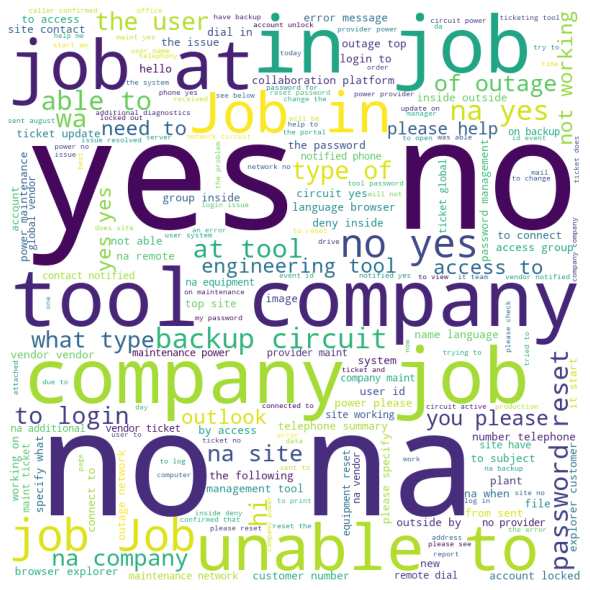

In [34]:
# Using wordcloud to find the most common words in the corpus. Could give an idea of the most common subject
from random import random
from wordcloud import WordCloud,STOPWORDS
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = STOPWORDS,#stopwords, 
            min_font_size = 10).generate(corpus) #generate(' '.join(inputdata['Description']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

## Observations:
1. Words YES, NA and COMPANY are most common. But they do not point to any specific issue
2. Next most common are PASSWORD RESET and OUTLOOK: Issues related to Outlook access, job scheduler and resetting password seem to be the most common complaints

In [27]:
# Removing English stopwords from the tokens
for i in range(len(intermediate['Description'])):
    intermediate['Description'][i]= [word for word in intermediate['Description'][i] if not word in stopwords.words('english')]
   # print(intermediate['Description'][i])
intermediate

C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Description,Assignment group
0,"[user, employee, manager, name, checked, user,...",0
1,"[hello, team, outlook, calendar, somebody, ple...",0
2,"[hi, cannot, log, best]",0
3,"[unable, access, tool, page]",0
4,[error],0
...,...,...
8495,"[good, afternoon, sent, mail, please, advise]",29
8496,"[telephony, issue]",0
8497,"[password, reset]",0
8498,"[unable, access, machine, finish, drawers, adj...",62


In [28]:
# Removing Spanish and German stopwords
for i in range(len(intermediate['Description'])):
    intermediate['Description'][i]= [word for word in intermediate['Description'][i] if not word in stopwords.words('spanish')]
    intermediate['Description'][i]= [word for word in intermediate['Description'][i] if not word in stopwords.words('german')]
    
    #print(intermediate['Description'][i])
processed=intermediate
processed

C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Public\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Description,Assignment group
0,"[user, employee, manager, name, checked, user,...",0
1,"[hello, team, outlook, calendar, somebody, ple...",0
2,"[hi, cannot, log, best]",0
3,"[unable, access, tool, page]",0
4,[error],0
...,...,...
8495,"[good, afternoon, sent, mail, please, advise]",29
8496,"[telephony, issue]",0
8497,"[password, reset]",0
8498,"[unable, access, machine, finish, drawers, adj...",62


### Checking for Descriptions with less than 2 tokens (any Description with less than 2 words many not make sense)

In [29]:
for i in range(len(processed['Description'])):
    if(len(processed['Description'][i])<2):#==0):
        processed=processed.drop(i,axis=0)
processed

,Description,Assignment group
0,"[user, employee, manager, name, checked, user,...",0
1,"[hello, team, outlook, calendar, somebody, ple...",0
2,"[hi, cannot, log, best]",0
3,"[unable, access, tool, page]",0
5,"[unable, log, engineering, tool]",0
...,...,...
8494,"[tablet, needs, due, multiple]",3
8495,"[good, afternoon, sent, mail, please, advise]",29
8496,"[telephony, issue]",0
8497,"[password, reset]",0


In [30]:
processed.reset_index(inplace=True,drop=True)
processed

,Description,Assignment group
0,"[user, employee, manager, name, checked, user,...",0
1,"[hello, team, outlook, calendar, somebody, ple...",0
2,"[hi, cannot, log, best]",0
3,"[unable, access, tool, page]",0
4,"[unable, log, engineering, tool]",0
...,...,...
7772,"[tablet, needs, due, multiple]",3
7773,"[good, afternoon, sent, mail, please, advise]",29
7774,"[telephony, issue]",0
7775,"[password, reset]",0


Now total number of records is 7777

In [31]:
# Creating Porter Stemmer for stemming the words in Description
p_stemmer = PorterStemmer()
temp=[]
for i in range(len(processed['Description'])):
    #processed.iloc[i]['Description']=[p_stemmer.stem(word) for word in processed.iloc[i]['Description']]
    temp.append([p_stemmer.stem(word) for word in processed.iloc[i]['Description']])
temp

[['user',
  'employe',
  'manag',
  'name',
  'check',
  'user',
  'name',
  'ad',
  'reset',
  'password',
  'advis',
  'user',
  'login',
  'check',
  'caller',
  'confirm',
  'abl',
  'login',
  'issu',
  'resolv'],
 ['hello',
  'team',
  'outlook',
  'calendar',
  'somebodi',
  'pleas',
  'advis',
  'correct',
  'kind'],
 ['hi', 'cannot', 'log', 'best'],
 ['unabl', 'access', 'tool', 'page'],
 ['unabl', 'log', 'engin', 'tool'],
 ['event', 'critic', 'compani', 'valu', 'threshold', 'oracl', 'data'],
 ['ticket',
  'employ',
  'statu',
  'new',
  'non',
  'employe',
  'enter',
  'user',
  'name'],
 ['unabl', 'disabl', 'add', 'outlook'],
 ['ticket', 'updat'],
 ['engin', 'tool', 'connect', 'unabl', 'submit'],
 ['tool', 'site', 'load', 'page', 'correctli'],
 ['unabl', 'login', 'tool'],
 ['user', 'reset', 'password'],
 ['unabl', 'open'],
 ['ticket', 'updat'],
 ['compani',
  'hi',
  'unabl',
  'login',
  'compani',
  'tri',
  'open',
  'new',
  'session',
  'link',
  'abl',
  'get',
  'help'

In [32]:
processed['Description']=temp
processed

,Description,Assignment group
0,"[user, employe, manag, name, check, user, name...",0
1,"[hello, team, outlook, calendar, somebodi, ple...",0
2,"[hi, cannot, log, best]",0
3,"[unabl, access, tool, page]",0
4,"[unabl, log, engin, tool]",0
...,...,...
7772,"[tablet, need, due, multipl]",3
7773,"[good, afternoon, sent, mail, pleas, advis]",29
7774,"[telephoni, issu]",0
7775,"[password, reset]",0


In [33]:
# Observed tokens of length 1 and 2, removing them 
temp=[]
for i in range(len(processed['Description'])):
    temp.append([x for x in processed.iloc[i]['Description'] if len(x)>2])  
temp

[['user',
  'employe',
  'manag',
  'name',
  'check',
  'user',
  'name',
  'reset',
  'password',
  'advis',
  'user',
  'login',
  'check',
  'caller',
  'confirm',
  'abl',
  'login',
  'issu',
  'resolv'],
 ['hello',
  'team',
  'outlook',
  'calendar',
  'somebodi',
  'pleas',
  'advis',
  'correct',
  'kind'],
 ['cannot', 'log', 'best'],
 ['unabl', 'access', 'tool', 'page'],
 ['unabl', 'log', 'engin', 'tool'],
 ['event', 'critic', 'compani', 'valu', 'threshold', 'oracl', 'data'],
 ['ticket',
  'employ',
  'statu',
  'new',
  'non',
  'employe',
  'enter',
  'user',
  'name'],
 ['unabl', 'disabl', 'add', 'outlook'],
 ['ticket', 'updat'],
 ['engin', 'tool', 'connect', 'unabl', 'submit'],
 ['tool', 'site', 'load', 'page', 'correctli'],
 ['unabl', 'login', 'tool'],
 ['user', 'reset', 'password'],
 ['unabl', 'open'],
 ['ticket', 'updat'],
 ['compani',
  'unabl',
  'login',
  'compani',
  'tri',
  'open',
  'new',
  'session',
  'link',
  'abl',
  'get',
  'help',
  'urgent',
  'work'

## Final cleaned and processed text

In [35]:
processed['Description']=temp
processed

,Description,Assignment group
0,"[user, employe, manag, name, check, user, name...",0
1,"[hello, team, outlook, calendar, somebodi, ple...",0
2,"[cannot, log, best]",0
3,"[unabl, access, tool, page]",0
4,"[unabl, log, engin, tool]",0
...,...,...
7772,"[tablet, need, due, multipl]",3
7773,"[good, afternoon, sent, mail, pleas, advis]",29
7774,"[telephoni, issu]",0
7775,"[password, reset]",0


# Building the Classification Model
## Importing relevant libraries

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

2. Creating Word Embeddings

In [37]:
lengths=[]
for i in range(len(processed['Description'])):
    lengths.append(len(processed['Description'][i]))
lengths

[19,
 9,
 3,
 4,
 4,
 7,
 9,
 4,
 2,
 5,
 5,
 3,
 3,
 2,
 2,
 19,
 3,
 2,
 2,
 2,
 27,
 2,
 4,
 11,
 2,
 4,
 2,
 3,
 2,
 4,
 4,
 28,
 3,
 4,
 6,
 4,
 2,
 4,
 2,
 3,
 3,
 33,
 3,
 5,
 7,
 5,
 6,
 4,
 4,
 8,
 7,
 11,
 16,
 5,
 4,
 9,
 4,
 5,
 2,
 2,
 6,
 9,
 20,
 8,
 5,
 5,
 5,
 5,
 9,
 3,
 32,
 2,
 5,
 5,
 5,
 52,
 51,
 5,
 2,
 13,
 4,
 32,
 6,
 5,
 4,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 18,
 35,
 19,
 5,
 5,
 5,
 5,
 5,
 22,
 3,
 5,
 8,
 4,
 5,
 2,
 5,
 5,
 20,
 3,
 4,
 2,
 3,
 8,
 2,
 4,
 11,
 3,
 2,
 15,
 4,
 62,
 2,
 3,
 3,
 3,
 14,
 15,
 5,
 5,
 2,
 5,
 12,
 3,
 9,
 22,
 5,
 3,
 12,
 3,
 2,
 5,
 3,
 4,
 32,
 6,
 3,
 17,
 11,
 5,
 8,
 61,
 2,
 11,
 2,
 5,
 19,
 7,
 3,
 21,
 5,
 5,
 3,
 3,
 5,
 11,
 52,
 5,
 2,
 8,
 2,
 5,
 2,
 6,
 5,
 11,
 3,
 4,
 51,
 3,
 4,
 2,
 3,
 3,
 6,
 4,
 2,
 11,
 5,
 8,
 3,
 3,
 6,
 6,
 9,
 2,
 2,
 3,
 2,
 8,
 2,
 5,
 51,
 8,
 2,
 20,
 2,
 1,
 1,
 5,
 5,
 10,
 2,
 5,
 2,
 2,
 25,
 11,
 11,
 4,
 4,
 2,
 108,
 76,
 52,
 13,
 2,
 15,
 21,
 9,
 5,
 11,

In [38]:
max(lengths)

428

In [39]:
lengths.index(max(lengths))

3642

In [40]:
# Joining back cleaned and pre-processed tokens into sentences
temp=[]
for i in range(len(processed['Description'])):
    temp.append(' '.join(processed.iloc[i]['Description']))
processed['Description']=temp
processed

,Description,Assignment group
0,user employe manag name check user name reset ...,0
1,hello team outlook calendar somebodi pleas adv...,0
2,cannot log best,0
3,unabl access tool page,0
4,unabl log engin tool,0
...,...,...
7772,tablet need due multipl,3
7773,good afternoon sent mail pleas advis,29
7774,telephoni issu,0
7775,password reset,0


In [43]:
# Setting embedding parameters (dimensions)
max_features = 2000
maxlen = max(lengths) ## Add your max length here ##
embedding_size = 256

In [44]:
# Initialise Tokenizer
#tokenizer=Tokenizer(num_words=max_features)
X=[]
for i in range(len(processed['Description'])):
    X.append(text_to_word_sequence(processed.iloc[i]['Description']))
X

[['user',
  'employe',
  'manag',
  'name',
  'check',
  'user',
  'name',
  'reset',
  'password',
  'advis',
  'user',
  'login',
  'check',
  'caller',
  'confirm',
  'abl',
  'login',
  'issu',
  'resolv'],
 ['hello',
  'team',
  'outlook',
  'calendar',
  'somebodi',
  'pleas',
  'advis',
  'correct',
  'kind'],
 ['cannot', 'log', 'best'],
 ['unabl', 'access', 'tool', 'page'],
 ['unabl', 'log', 'engin', 'tool'],
 ['event', 'critic', 'compani', 'valu', 'threshold', 'oracl', 'data'],
 ['ticket',
  'employ',
  'statu',
  'new',
  'non',
  'employe',
  'enter',
  'user',
  'name'],
 ['unabl', 'disabl', 'add', 'outlook'],
 ['ticket', 'updat'],
 ['engin', 'tool', 'connect', 'unabl', 'submit'],
 ['tool', 'site', 'load', 'page', 'correctli'],
 ['unabl', 'login', 'tool'],
 ['user', 'reset', 'password'],
 ['unabl', 'open'],
 ['ticket', 'updat'],
 ['compani',
  'unabl',
  'login',
  'compani',
  'tri',
  'open',
  'new',
  'session',
  'link',
  'abl',
  'get',
  'help',
  'urgent',
  'work'

In [45]:
# Get vocabulary
words = set(tuple(row) for row in X)#set(X)
len(words)

5340

In [46]:
vocab=set()
for x in words:
    vocab.update(x)
vocab

{'delay',
 'broadcast',
 'jet',
 'short',
 'automat',
 'navig',
 'sync',
 'file',
 'near',
 'brought',
 'minut',
 'analysi',
 'launch',
 'easiest',
 'ion',
 'och',
 'ting',
 'pay',
 'instantli',
 'amount',
 'grate',
 'window',
 'delet',
 'unread',
 'advis',
 'peer',
 'gecko',
 'allow',
 'last',
 'opu',
 'beacon',
 'forward',
 'continu',
 'fault',
 'five',
 'month',
 'success',
 'sept',
 'wrapper',
 'bash',
 'portion',
 'antiviru',
 'sun',
 'vertic',
 'configur',
 'voucher',
 'dene',
 'formerli',
 'gen',
 'corpor',
 'conveni',
 'yesterday',
 'natur',
 'mayb',
 'cross',
 'ken',
 'speaker',
 'legitim',
 'stolen',
 'trust',
 'separ',
 'header',
 'abb',
 'forth',
 'pop',
 'newli',
 'mere',
 'person',
 'selector',
 'less',
 'orang',
 'perfect',
 'technolog',
 'chanc',
 'hip',
 'outag',
 'densiti',
 'virtual',
 'await',
 'block',
 'phone',
 'speak',
 'target',
 'assur',
 'leakag',
 'side',
 'singl',
 'build',
 'pax',
 'item',
 'fledg',
 'scratch',
 'often',
 'small',
 'timecard',
 'front',
 '

In [47]:
vocab_size = len(vocab)
vocab_size

2494

## Vectorizing the token sequences
*   Choice of vectorizer: Tf-IDF vectorizer
*   Reason: In the data the key words that point to the issue are fairly frequent but the frequent trivial words need to be ignored

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=max_features, ngram_range=(1,3))

In [49]:
processed['Description']

0       user employe manag name check user name reset ...
1       hello team outlook calendar somebodi pleas adv...
2                                         cannot log best
3                                  unabl access tool page
4                                    unabl log engin tool
                              ...                        
7772                              tablet need due multipl
7773                 good afternoon sent mail pleas advis
7774                                       telephoni issu
7775                                       password reset
7776     unabl access machin finish drawer adjust network
Name: Description, Length: 7777, dtype: object

In [50]:
vectorizer.fit(processed['Description'])

TfidfVectorizer(max_features=2000, ngram_range=(1, 3))

In [51]:
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'user': 1867, 'employe': 522, 'manag': 977, 'name': 1029, 'check': 241, 'reset': 1441, 'password': 1168, 'advis': 55, 'login': 934, 'caller': 213, 'confirm': 333, 'abl': 0, 'issu': 833, 'resolv': 1458, 'user employe': 1871, 'employe manag': 523, 'manag name': 978, 'name check': 1030, 'check user': 247, 'user name': 1881, 'reset password': 1448, 'advis user': 56, 'user login': 1878, 'login check': 935, 'check caller': 243, 'caller confirm': 214, 'confirm abl': 334, 'abl login': 4, 'login issu': 941, 'issu resolv': 837, 'user employe manag': 1872, 'employe manag name': 524, 'manag name check': 979, 'name check user': 1031, 'check user name': 248, 'advis user login': 57, 'user login check': 1879, 'login check caller': 936, 'check caller confirm': 244, 'caller confirm abl': 215, 'confirm abl login': 335, 'abl login issu': 5, 'login issu resolv': 942, 'hello': 709, 'team': 1701, 'outlook': 1144, 'calendar': 203, 'pleas': 1229, 'correct': 368, 'kind': 864, 'hello team': 717, 'pleas advis': 

In [52]:
len(vectorizer.vocabulary_)

2000

In [53]:
print(vectorizer.get_feature_names())

['abl', 'abl access', 'abl connect', 'abl log', 'abl login', 'abl login issu', 'abl open', 'abl resolv', 'abl resolv pleas', 'abl see', 'abort', 'abort disk disk', 'abort media', 'accept', 'access', 'access collabor', 'access collabor platform', 'access compani', 'access drive', 'access engin', 'access follow', 'access group', 'access group insid', 'access pleas', 'access user', 'account', 'account advis', 'account advis user', 'account first', 'account first name', 'account get', 'account lock', 'account lockout', 'account unlock', 'account unlock password', 'account user', 'across', 'action', 'action accept', 'action block', 'action block score', 'action block vendor', 'activ', 'activ directori', 'activ site', 'activ site contact', 'actual', 'add', 'addit', 'addit diagnost', 'address', 'address pleas', 'address pleas repli', 'administr', 'adob', 'advis', 'advis user', 'advis user login', 'affect', 'afternoon', 'agent', 'agent event', 'agent event detail', 'agent shortli', 'agent shor

In [54]:
X = vectorizer.transform(processed['Description'])

In [55]:
X1=X.toarray()
X=pd.DataFrame(X1)
X

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.103356,0.0,0.0,0.0,0.134418,0.145945,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7775,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Padding Sequences for LSTM

In [56]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#max_features = 2000
tokenizer = Tokenizer(nb_words=max_features, split=' ')
tokenizer.fit_on_texts(processed['Description'].values)
X1 = tokenizer.texts_to_sequences(processed['Description'].values)
X1 = pad_sequences(X1,maxlen=maxlen)
#Y1 = pd.get_dummies(result['Positivity']).values


C:\Users\Public\Anaconda\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [57]:
#X = pad_sequences(X, maxlen = maxlen, dtype=str, padding='post')
y = np.asarray(processed['Assignment group'])
#y = pd.Series(y)
y

array([ 0,  0,  0, ...,  0,  0, 62])

* No need to do Label Encoding since classes are already denoted by integers
* Going ahead with one hot encoding of 'y'

In [58]:
# One hot encoding of y
from sklearn.preprocessing import OneHotEncoder
enc= OneHotEncoder(sparse=False)

In [59]:
y=enc.fit_transform(y.reshape(len(y), 1))
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
enc.categories_

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73])]

In [61]:
print("Shape of Vector matrix: ", X1.shape)

Shape of Vector matrix:  (7777, 428)


In [62]:
print("Number of Labels: ", y.shape[1])
print("Shape of output label matrix: ", y.shape)

Number of Labels:  74
Shape of output label matrix:  (7777, 74)


## Creating Train and Test set

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=7)

In [64]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6610, 2000) (6610, 74)
(1167, 2000) (1167, 74)


# Building Classification model
*   Using an LSTM model
*   Classification layer is a fully connected softmax layer with 74 nodes (one for each assignment group)



In [ ]:
# max_features = 2000
# maxlen = max(lengths) ## Add your max length here ##
# embedding_size = 256

In [65]:
model = Sequential()
model.add(Embedding(max_features, embedding_size,input_length = x_train.shape[1]))
model.add(LSTM(128))
model.add(Dense(74,activation='softmax'))

In [ ]:
'''
input = Input(shape=(maxlen,))
model = Embedding(vocab_size,embedding_size,weights=[embedding_matrix],input_length=maxlen)(input)
model =  Bidirectional (LSTM (100,return_sequences=True,dropout=0.50),merge_mode='concat')(model)
model = Dense(100,activation='relu')(model)
model = Flatten()(model)
model = Dense(100,activation='relu')(model)
output = Dense(73,activation='softmax')(model)
model = Model(input,output)
'''

### Model summary

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 256)         512000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 74)                9546      
Total params: 718,666
Trainable params: 718,666
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

### Considering a train-validation split of 80-20 (validation split = 0.2)

In [68]:
batch_size = 128
epochs = 5

## Add your code here ##
model.fit(x_train,y_train,validation_split=0.2, batch_size=batch_size, epochs = epochs, verbose = 1)

Train on 5288 samples, validate on 1322 samples
Epoch 1/5
5288/5288 [==============================] - 5168s 977ms/sample - loss: 2.8173 - accuracy: 0.4682 - val_loss: 2.5728 - val_accuracy: 0.4592
Epoch 2/5
5288/5288 [==============================] - 1208s 228ms/sample - loss: 2.4836 - accuracy: 0.4803 - val_loss: 2.5590 - val_accuracy: 0.4592
Epoch 3/5
5288/5288 [==============================] - 39328s 7s/sample - loss: 2.4840 - accuracy: 0.4803 - val_loss: 2.5627 - val_accuracy: 0.4592
Epoch 4/5
5288/5288 [==============================] - 2451s 464ms/sample - loss: 2.4796 - accuracy: 0.4803 - val_loss: 2.5601 - val_accuracy: 0.4592
Epoch 5/5
5288/5288 [==============================] - 3179s 601ms/sample - loss: 2.4822 - accuracy: 0.4803 - val_loss: 2.5580 - val_accuracy: 0.4592


# Prediction and Accuracy on Prediction data

In [69]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [76]:
y_pred = model.predict(x_test)

In [75]:
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [72]:
# Rounding up y_pred to make them binary
for i in range(len(y_pred)):
    y_pred[i]=y_pred[i].round(0)
y_pred=y_pred.astype(np.int32)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Performance metrics

In [73]:
# Overall accuracy
accuracy_score(y_test,y_pred)

0.0

In [74]:
# Precision
precision_score(y_test,y_pred,average=None)

C:\Users\Public\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [ ]:
# Recall
recall_score(y_test,y_pred,average=None)

In [ ]:
# F1 score
f1_score(y_test,y_pred,average=None)

## Visualise confusion matrix

In [77]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.gcf().set_size_inches(25,25)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[565   0   0 ...   0   0   0]
 [  5   0   0 ...   0   0   0]
 [ 34   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


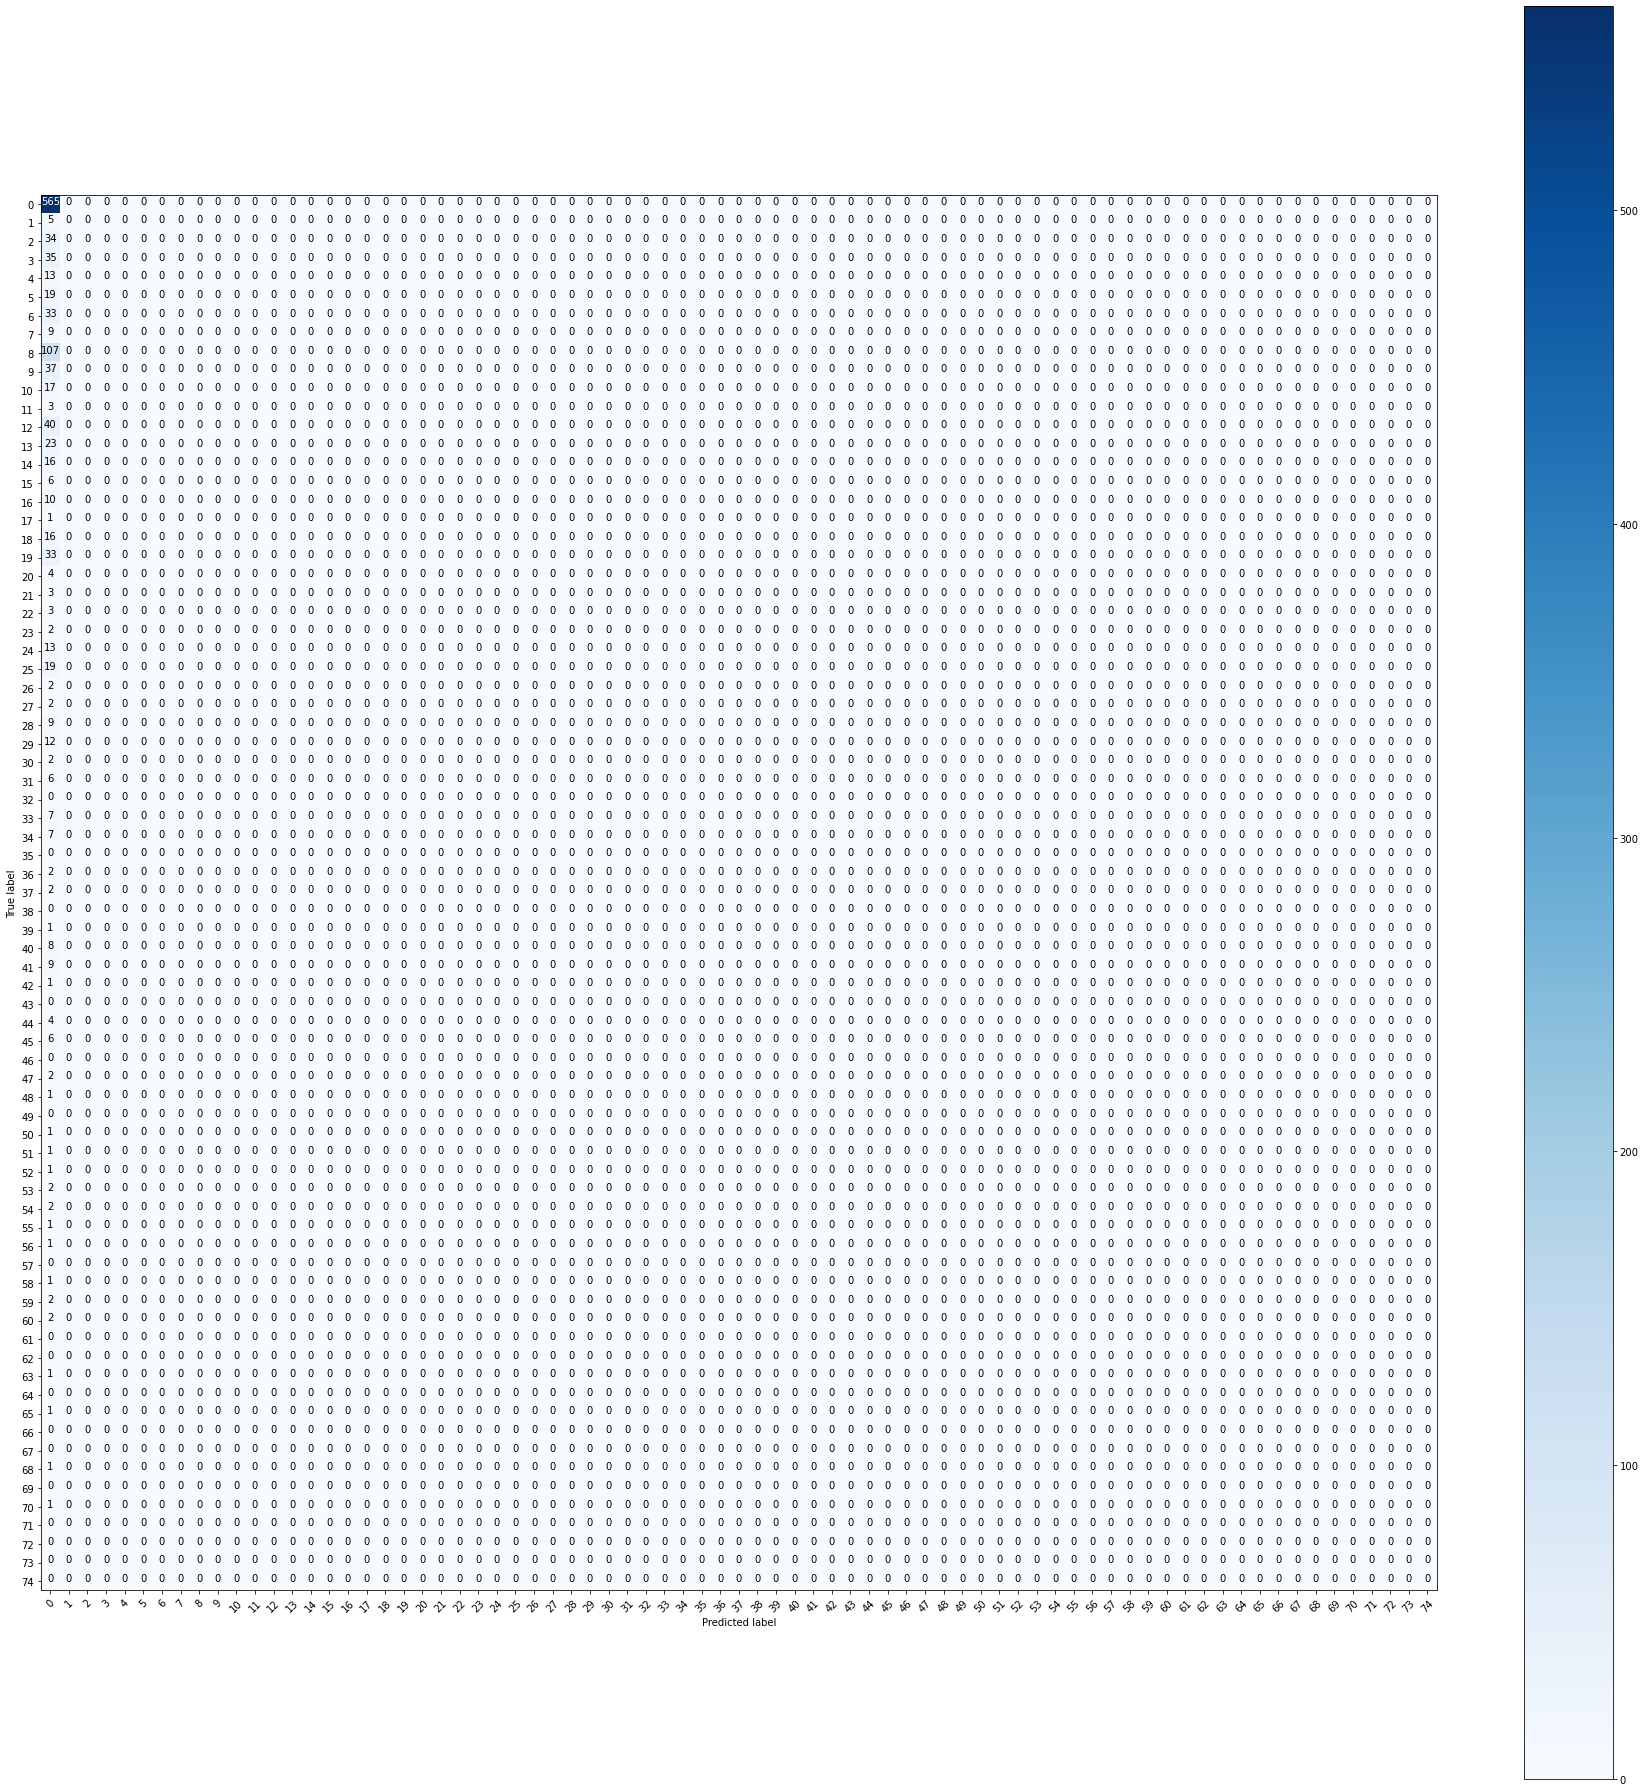

In [78]:
cnf_matrix = confusion_matrix(pd.DataFrame(y_test).values.argmax(axis=1), y_pred.argmax(axis=1),
                              labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                                      31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,
                                      62,63,64,65,66,67,68,69,70,71,72,73,74])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,
                                      31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,
                                      62,63,64,65,66,67,68,69,70,71,72,73,74],
                      title='Confusion matrix, without normalization')

In [ ]:
'''
for i in range(len(y_test)):
    print('Expected:', y_test[i], 'Predicted', y_pred[i].round(0))
'''